In [1]:
import pymaid
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import seaborn as sns
import itertools
import math
import scipy

# Token to get 
"""

CATMAID credentials in the form of pymaid.CatmaidInstance(server, authname, authpassword, authtoken)

"""


pymaid.set_loggers('WARNING')
pymaid.set_pbars(jupyter=False)

INFO  : Global CATMAID instance set. Caching is ON. (pymaid)


# Getting the triples

First, we need to retrieve all triples per target type. Since they were obtained by notebook-1, here we just read the already saved files

In [5]:
triples_ipc = pd.read_csv(r'/home/ben/Downloads/triples_ipc.csv')
triples_dms = pd.read_csv(r'/home/ben/Downloads/triples_dms.csv')
triples_dh = pd.read_csv(r'/home/ben/Downloads/triples_dh44.csv')
triples_se0p = pd.read_csv(r'/home/ben/Downloads/triples_se0ph.csv')
triples_se0ens = pd.read_csv(r'/home/ben/Downloads/triples_se0ens_new3.csv')

In [6]:
triples_ipc

,source,interneuron,target
0,AN-L-Sens-B1-AVa-19,hugin-PC left 4,IPC 2 left
1,AN-L-Sens-B1-ACa-02,AN: DPMlp Lar_right,IPC 7 left
2,AN-L-Sens-B1-ACa-02,hugin-PC left 1,IPC 7 left
3,AN-L-Sens-B1-ACa-02,hugin-PC left 3,IPC 7 left
4,AN-L-Sens-B1-ACa-02,contra-vine 2 left,IPC 3 right
5,AN-L-Sens-B1-ACa-02,SEZ-IN-13-right,IPC 3 right
6,AN-L-Sens-B1-ACa-02,AN: DPMlp Lar_right,IPC 2 left
7,AN-L-Sens-B1-ACa-02,hugin-PC left 1,IPC 2 left
8,AN-L-Sens-B1-ACa-02,AN: DPMlp Lar_right,IPC 4 left
9,AN-L-Sens-B1-ACa-02,hugin-PC left 1,IPC 4 left


In [4]:
all_trips= [triples_ipc,triples_dms,triples_dh,triples_se0p,triples_se0ens]

In [5]:
tars = ['IPC','DMS','DH44','Se0ph','Se0ens']

Next, we need to be able to work with a csv file of triples. The function **extract_csv()** takes a name of a file (.csv) and returns a nested list with two elements:
- list1: a list of targets
- list2: a list with inner lists corresponding to each target with both the sensory input neurons and the interneurons, in the order of appearance, such that for target neuron list1[i], list2[i] is a list of the incoming neurons participating in a parallel pathway to this target neuron. There are no repeated elements.

In [16]:
def extract_csv(fname):
    with open(fname) as csv_file:
        csv_f = csv.reader(csv_file, delimiter=',')
        line_count = 0
        tars = []
        for row in csv_f:
            if line_count == 0:
    #             print(f'Column names are {", ".join(row)}')
                line_count += 1
            else:  
                current = f'{row[2]}'
                if current not in tars:
                    tars.append(current)
    #             print(f'\t{row[0]} works in the {row[1]} department, and was born in {row[2]}.')
                line_count += 1 

    sources = []
    for t in tars:
        with open(fname) as csv_file:
            csv_f = csv.reader(csv_file, delimiter=',')   
            line_=0
            ins = []
            for row in csv_f:
                if line_ ==0:
                    line_ += 1
                elif (f'{row[2]}')==t:
                    first = (f'{row[0]}')
                    second = (f'{row[1]}')
                    if first not in ins:
                        ins.append(first)
                    if second not in ins:
                        ins.append(second)
                    line_+=1
        sources.append(ins)

    both = [tars,sources]
    return both

ipcs = extract_csv('triples_ipc.csv')


In [17]:
dmss = extract_csv('triples_dms.csv')

In [18]:
dhs = extract_csv('triples_dh44.csv')

In [19]:
se0ps = extract_csv('triples_se0ph.csv')

In [20]:
se0enss = extract_csv('triples_se0ens_new3.csv')

Similar to the previous function, **extract_csv_new()** takes a name of a .csv file, and the output is a nested list of two elements:
- list1: list of targets
- list2: nested list such that for list1[i], the list2[i] is another nested list containing pairs of [sens,inter] which are part of the same parallel pathway for the particular target neuron

In [21]:
def extract_csv_new(fname):
    with open(fname) as csv_file:
        csv_f = csv.reader(csv_file, delimiter=',')
        line_count = 0
        tars = []
        for row in csv_f:
            if line_count == 0:
    #             print(f'Column names are {", ".join(row)}')
                line_count += 1
            else:
                current = f'{row[2]}'
                if current not in tars:
                    tars.append(current)
    #             print(f'\t{row[0]} works in the {row[1]} department, and was born in {row[2]}.')
                line_count += 1 
    

    sources = []
    for t in tars:
        with open(fname) as csv_file:
            csv_f = csv.reader(csv_file, delimiter=',')   
            line_=0
            all_ins = []
            for row in csv_f:
                ins=[]
                if line_ ==0:
                    line_ += 1
                elif (f'{row[2]}')==t:
                    first = (f'{row[0]}')
                    second = (f'{row[1]}')
                    ins=[first,second]
                    all_ins.append(ins)
                    line_+=1
                    
        sources.append(all_ins)

    both = [tars,sources]
    return both

# ipc_trips = extract_csv_new('triples_ipc.csv')


In [22]:
ipc_trips = extract_csv_new('triples_ipc.csv')


Function to add a column stating the type of the sensory neuron in this triple (e.g. 'ACa','AVa' etc.)

In [7]:
def df_type(datf,boo = False):
    rlista = []
    newdatf = datf.copy()
    if boo==False:
        for s in datf['source']:
            if 'Sens' in s:
                if 'ACa-02' in s or 'ACa-01' in s:
                    rlista.append('ACa12')
        #             all_dms['type']='ACa12'
                elif 'AVa' in s:
                    rlista.append('AVa')
                else:
                    rlista.append('ACa')
        #             all_dms['type']='ACa'
            else:
                rlista.append('Inter')
    else:
        for s in datf['source']:
            if 'Sens' in s:
                if 'ACa-02' in s or 'ACa-01' in s:
                    rlista.append('ACa12')
                elif 'AVa' in s:
                    rlista.append('AVa')
                elif 'AVp' in s:
                    if 'MN' in s:
                        if 'B3' in s:
                            rlista.append('MN B3')
                        elif 'B2' in s:
                            rlista.append("MN B2")
                    else:
                        rlista.append('AN AVp')
                else:
                    rlista.append('ACa')
            else:
                rlista.append('Inter')
    pandaslist = pd.Series(rlista,index = datf.index)

    newdatf['type']=pandaslist
    return newdatf

# Dispersion calculations

The next function takes a list of sources in the form of the extract_new_csv output and a single target neuron, and returns a dataframe containing the ARBOR DISPERSION of the sensory and the interneurons on this target. 

In [8]:
def triple_dispersion(sources,target,boo = False):
    n = pymaid.get_neuron(target)
#     n.reroot(n.soma, inplace=True)

    n_len = 1000*pymaid.calc_cable(n)
    m = pymaid.geodesic_matrix(n)
    
      
    data = []
    total_lista = []
    new_lista=[]

    for s in sources:
    
        cn_s = pymaid.get_connectors_between(s[0],n,directional=True)
        cn_i = pymaid.get_connectors_between(s[1],n,directional=True)
        
        cn_s_nodes = cn_s.treenode2_id.values.tolist()
        cn_i_nodes = cn_i.treenode2_id.values.tolist()
#         print(cn_s_nodes)
        n1 = len(cn_s_nodes)
        n2 = len(cn_i_nodes)
        
        lista_s = []
        for j in range(0,len(cn_s_nodes)):
            dist1 = m.loc[cn_s_nodes, cn_s_nodes[j]].values
            reldist1 = [round(d/n_len,7) for d in dist1]
            lista_s.append([d for d in reldist1 if d!=0.0])
        total_lista.append(list(itertools.chain.from_iterable(lista_s)))
        
        # Taking the set of the list so that there is no repetition of distances a to b as b to a
        per_sens = list(set(list(itertools.chain.from_iterable(lista_s))))
        
        # Dividing the sum with the number of edges which is 2*n*(n-1) BUT the way i made per_sens to be a set,
        # it's the same as dividing by len(per_sens)
#         avg_sens=0
#         if len(per_sens)!=0:
        avg_sens = round(2*sum(per_sens)/(n1*(n1-1)),7)
        
        lista_i = []
        for k in range(0,len(cn_i_nodes)):
            dist2 = m.loc[cn_i_nodes, cn_i_nodes[k]].values
            reldist2 = [round(d/n_len,7) for d in dist2]
            lista_i.append([d for d in reldist2 if d!=0.0])
        
        per_inter = list(set(list(itertools.chain.from_iterable(lista_i))))
#         print(per_inter)
#         avg_int = 0
#         if len(per_inter)!=0:
        avg_int = round(2*sum(per_inter)/(n2*(n2-1)),7)

        dif = round(avg_int - avg_sens,8)
        
        data += [[s[0]+' ('+str(n1)+')', s[1] +' ('+str(n2)+')',target,per_sens,per_inter,avg_sens,avg_int,dif]]

        
    data = pd.DataFrame(data, columns=['source','interneuron','target','all_disp_source', 'all_disp_inter','avg_disp_source','avg_disp_inter','diff (int-sens)'])

    return data

#

In [49]:
sou = [['AN-L-Sens-B1-AVa-19', 'hugin-PC left 4'],
   ['AN-L-Sens-B1-ACa-02', 'AN: DPMlp Lar_right'],
   ['AN-L-Sens-B1-ACa-02', 'hugin-PC left 1']]

tar = 'IPC 2 left'
triple_dispersion(sou,tar)

,source,interneuron,target,all_disp_source,all_disp_inter,avg_disp_source,avg_disp_inter,diff (int-sens)
0,AN-L-Sens-B1-AVa-19 (2),hugin-PC left 4 (3),IPC 2 left,[0.00144],"[0.030435, 0.0059607, 0.0244744]",0.001440,0.020290,0.018850
1,AN-L-Sens-B1-ACa-02 (3),AN: DPMlp Lar_right (9),IPC 2 left,"[0.1391572, 0.0101452, 0.1351355]","[0.0426879, 0.0815147, 0.0944371, 0.0045075, 0...",0.094813,0.051145,-0.043668
2,AN-L-Sens-B1-ACa-02 (3),hugin-PC left 1 (2),IPC 2 left,"[0.1391572, 0.0101452, 0.1351355]",[0.0159893],0.094813,0.015989,-0.078823


The next function takes a file name of the type triples_x and an export file name, and returns a dataframe for all triples in the file, containing the dispersion values. It also has an additional column for the type of the sensory input (a result of df_type).

In [9]:
def dispersion_rel(fname,exp):
    novo = extract_csv_new(fname)
    motors = novo[0]
    inputs = novo[1]
    dflist = []
    for i in range(0,len(motors)):
        dflist.append(triple_dispersion(inputs[i],motors[i]))
#         print(d)
    dataf = pd.concat(dflist,ignore_index=True)
    
    if 'se0' in fname:
        new_df = df_type(dataf,True)
    else:
        new_df = df_type(dataf)
    export_csv = new_df.to_csv (r'/home/ben/'+exp)

    return dataf



In [51]:
disp_ipc= dispersion_rel('triples_ipc.csv','real_disp_ipc_triple2.csv')
disp_dms= dispersion_rel('triples_dms.csv','real_disp_dms_triple2.csv')
disp_dh= dispersion_rel('triples_dh44.csv','real_disp_dh44_triple2.csv')
disp_se0p = dispersion_rel('triples_se0ph.csv','real_disp_se0p_triple2.csv')


In [52]:
disp_new_ens = dispersion_rel('triples_se0ens_new3.csv','real_disp_se0ens_triple2.csv')

In [10]:
csv_dms = pd.read_csv(r'/home/ben/all-csvs/real_disp_dms_triple2.csv')
csv_dh = pd.read_csv(r'/home/ben/all-csvs/real_disp_dh44_triple2.csv')
csv_ipc = pd.read_csv(r'/home/ben/all-csvs/real_disp_ipc_triple2.csv')
csv_se0p = pd.read_csv(r'/home/ben/all-csvs/real_disp_se0p_triple2.csv')
csv_se0ens3 = pd.read_csv(r'/home/ben/all-csvs/real_disp_se0ens_triple2.csv')


This function returns the average difference of dispersion sensory-interneuron

In [54]:
def avg_all(disp_df):
    
    vals = disp_df['diff (sens-int)'].values.tolist()
    avg = sum(vals)/len(vals)
    return avg

Similar function in order to calculate the EUCLIDEAN dispersion 

In [11]:
def eu_triple_dispersion(sources,target,boo = False):
    n = pymaid.get_neuron(target)

    n_len = 1000*pymaid.calc_cable(n)
    m = pymaid.geodesic_matrix(n)
    con = pymaid.get_connectors(n, relation_type="postsynaptic_to")

    data = []
    total_lista = []
    eu_total = []

    new_lista=[]
    d_sen = {}
    
    for s in sources:
    
        cn_s = pymaid.get_connectors_between(s[0],n,directional=True)
        cn_i = pymaid.get_connectors_between(s[1],n,directional=True)
        
        cn_s_nodes = cn_s.treenode2_id.values.tolist()
        cn_i_nodes = cn_i.treenode2_id.values.tolist()
#         print(cn_s_nodes)
        n1 = len(cn_s_nodes)
        n2 = len(cn_i_nodes)
        
        lista_s = []
        eu_lista = []
        eu_ilist = []
        cs_ids = cn_s.connector_id.values.tolist()
        cin_ids = cn_i.connector_id.values.tolist()

        
        for j in range(0,len(cn_s_nodes)):
            # All the distances for this node (cn_nodes[j]) to the other nodes 
            dist1 = m.loc[cn_s_nodes, cn_s_nodes[j]].values
#             reldist1 = [round(d/n_len,7) for d in dist1]
            lista_s.append([round(d,7) for d in dist1 if d!=0.0])
            cs_j = list(itertools.chain.from_iterable(con.loc[con['connector_id']==cs_ids[j]][['x','y','z']].values.tolist()))
            xj = cs_j[0]
            yj = cs_j[1]
            zj = cs_j[2]
            for i in range(0,len(cn_s_nodes)):
                if i!=j:
                    cs_i = list(itertools.chain.from_iterable(con.loc[con['connector_id']==cs_ids[i]][['x','y','z']].values.tolist()))
                    xi = cs_i[0]
                    yi = cs_i[1]
                    zi = cs_i[2]
                    sqr = math.pow((xj-xi),2) + math.pow((yj-yi),2) + math.pow((zj-zi),2)
                    eu_dist = math.sqrt(sqr)
                    if eu_dist not in eu_lista:
                        eu_lista.append(eu_dist)
#         eu_total.append(eu_lista)
#         total_lista.append(list(itertools.chain.from_iterable(lista_s)))
#         print(eu_total)
#         print(total_lista)
        # Taking the set of the list so that there is no repetition of distances a to b as b to a
        per_sens = list(set(list(itertools.chain.from_iterable(lista_s))))
        eu_sens = [round(el,5) for el in eu_lista]
#         print(per_sens)
        # Dividing the sum with the number of edges which is 2*n*(n-1) BUT the way i made per_sens to be a set,
        # it's the same as dividing by len(per_sens)
#         avg_sens=0
#         if len(per_sens)!=0:
        avg_sens = round(sum(per_sens)/len(per_sens),5)
        avg_eu_sen = round(sum(eu_lista)/len(eu_lista),5)

        
        lista_i = []
        for k in range(0,len(cn_i_nodes)):
            eu_ilist = []
            dist2 = m.loc[cn_i_nodes, cn_i_nodes[k]].values
#             reldist2 = [round(d/n_len,7) for d in dist2]
            lista_i.append([round(d,7) for d in dist2 if d!=0.0])
            cin_k = list(itertools.chain.from_iterable(con.loc[con['connector_id']==cin_ids[k]][['x','y','z']].values.tolist()))
            x1 = cin_k[0]
            y1 = cin_k[1]
            z1 = cin_k[2]
            for i in range(0,len(cn_i_nodes)):
                if i!=k:
                    cin_i = list(itertools.chain.from_iterable(con.loc[con['connector_id']==cin_ids[i]][['x','y','z']].values.tolist()))
                    x2 = cin_i[0]
                    y2 = cin_i[1]
                    z2 = cin_i[2]
                    sqr2 = math.pow((x1-x2),2) + math.pow((y1-y2),2) + math.pow((z1-z2),2)
                    eu_idist = math.sqrt(sqr2)
                    if eu_idist not in eu_ilist:
                        eu_ilist.append(eu_idist)

        per_inter = list(set(list(itertools.chain.from_iterable(lista_i))))
        eu_inter = [round(el,5) for el in eu_ilist]
#         print(per_inter)
#         avg_int = 0
#         if len(per_inter)!=0:
        avg_int = round(2*sum(per_inter)/(n2*(n2-1)),5)
        
        avg_eu_int = round(sum(eu_inter)/len(eu_inter),5)
    
        dif = round(avg_int - avg_sens,5)
        eu_dif = round (avg_eu_int - avg_eu_sen,5)
        
        data += [[s[0]+' ('+str(n1)+')', s[1] +' ('+str(n2)+')',target,per_sens,eu_sens,per_inter,eu_inter,avg_sens,avg_eu_sen,
                  avg_int,avg_eu_int,dif,eu_dif]]

        
    data = pd.DataFrame(data, columns=['source','interneuron','target','all_disp_source','eu_disp_source', 'all_disp_inter',
                                       'eu_disp_inter','avg_disp_source','eu_avg_source','avg_disp_inter', 'eu_avg_inter',
                                       'diff (int-sens)','eu_diff (int-sens)'])

    return data

#

In [14]:
def eu_dispersion_rel(fname,exp):
    novo = extract_csv_new(fname)
    motors = novo[0]
    inputs = novo[1]
    dflist = []
    for i in range(0,len(motors)):
        dflist.append(eu_triple_dispersion(inputs[i],motors[i]))
#         print(d)
    dataf = pd.concat(dflist,ignore_index=True)
    
    if 'se0' in fname:
        new_df = df_type(dataf,True)
    else:
        new_df = df_type(dataf)
    export_csv = new_df.to_csv (r'/home/ben/'+exp)

    return dataf



In [23]:
eu_dms = eu_dispersion_rel('triples_dms.csv','eu_disp_dms_triple.csv')
eu_ipc = eu_dispersion_rel('triples_ipc.csv','eu_disp_ipc_triple.csv')
eu_dh = eu_dispersion_rel('triples_dh44.csv','eu_disp_dh44_triple.csv')
eu_se0p = eu_dispersion_rel('triples_se0ph.csv','eu_disp_se0p_triple.csv')
eu_se0ens = eu_dispersion_rel('triples_se0ens_new3.csv','eu_disp_se0ens_triple.csv')

Calculating the relative euclidean dispersion (divided by the length of the neuron)

In [25]:
def rel_eu_triple_dispersion(sources,target,boo = False):
    n = pymaid.get_neuron(target)

    n_len = 1000*pymaid.calc_cable(n)
    m = pymaid.geodesic_matrix(n)
    con = pymaid.get_connectors(n, relation_type="postsynaptic_to")

    data = []
    total_lista = []
    eu_total = []

    new_lista=[]
    d_sen = {}
    
    for s in sources:
    
        cn_s = pymaid.get_connectors_between(s[0],n,directional=True)
        cn_i = pymaid.get_connectors_between(s[1],n,directional=True)
        
        cn_s_nodes = cn_s.treenode2_id.values.tolist()
        cn_i_nodes = cn_i.treenode2_id.values.tolist()
#         print(cn_s_nodes)
        n1 = len(cn_s_nodes)
        n2 = len(cn_i_nodes)
        
        lista_s = []
        lista_origs = []
        eu_lista = []
        eu_ilist = []
        cs_ids = cn_s.connector_id.values.tolist()
        cin_ids = cn_i.connector_id.values.tolist()

        
        for j in range(0,len(cn_s_nodes)):
            # All the distances for this node (cn_nodes[j]) to the other nodes 
            dist1 = m.loc[cn_s_nodes, cn_s_nodes[j]].values
            reldist1 = [round(d/n_len,7) for d in dist1]
            lista_origs.append(round(d,7) for d in dist1 if d!=0.0)
            lista_s.append([round(d,7) for d in reldist1 if d!=0.0])
            cs_j = list(itertools.chain.from_iterable(con.loc[con['connector_id']==cs_ids[j]][['x','y','z']].values.tolist()))
            xj = cs_j[0]
            yj = cs_j[1]
            zj = cs_j[2]
            for i in range(0,len(cn_s_nodes)):
                if i!=j:
                    cs_i = list(itertools.chain.from_iterable(con.loc[con['connector_id']==cs_ids[i]][['x','y','z']].values.tolist()))
                    xi = cs_i[0]
                    yi = cs_i[1]
                    zi = cs_i[2]
                    sqr = math.pow((xj-xi),2) + math.pow((yj-yi),2) + math.pow((zj-zi),2)
                    eu_dist = math.sqrt(sqr)
                    if eu_dist not in eu_lista:
                        eu_lista.append(eu_dist)

        # Taking the set of the list so that there is no repetition of distances a to b as b to a
        orig_sens = list(set(list(itertools.chain.from_iterable(lista_origs))))
        per_sens = list(set(list(itertools.chain.from_iterable(lista_s))))
        eu_sens = [round(el,5) for el in eu_lista]
#         print(per_sens)
        # Dividing the sum with the number of edges which is 2*n*(n-1) BUT the way i made per_sens to be a set,
        # it's the same as dividing by len(per_sens)
#         avg_sens=0
#         if len(per_sens)!=0:
        avg_sens = round(sum(per_sens)/len(per_sens),5)
        avg_origs = round(sum(orig_sens)/len(orig_sens),5)
        avg_eu_sen = round(sum(eu_lista)/len(eu_lista),5)

        
        lista_i = []
        orig_i = []
        for k in range(0,len(cn_i_nodes)):
            eu_ilist = []
            dist2 = m.loc[cn_i_nodes, cn_i_nodes[k]].values
            reldist2 = [round(d/n_len,7) for d in dist2]
            lista_i.append([round(d,7) for d in reldist2 if d!=0.0])
            orig_i.append([round(d,7) for d in dist2 if d!=0.0])
            cin_k = list(itertools.chain.from_iterable(con.loc[con['connector_id']==cin_ids[k]][['x','y','z']].values.tolist()))
            x1 = cin_k[0]
            y1 = cin_k[1]
            z1 = cin_k[2]
            for i in range(0,len(cn_i_nodes)):
                if i!=k:
                    cin_i = list(itertools.chain.from_iterable(con.loc[con['connector_id']==cin_ids[i]][['x','y','z']].values.tolist()))
                    x2 = cin_i[0]
                    y2 = cin_i[1]
                    z2 = cin_i[2]
                    sqr2 = math.pow((x1-x2),2) + math.pow((y1-y2),2) + math.pow((z1-z2),2)
                    eu_idist = math.sqrt(sqr2)
                    if eu_idist not in eu_ilist:
                        eu_ilist.append(eu_idist)

        per_inter = list(set(list(itertools.chain.from_iterable(lista_i))))
        orig_inter = list(set(list(itertools.chain.from_iterable(orig_i))))
        eu_inter = [round(el,5) for el in eu_ilist]
#         print(per_inter)
#         avg_int = 0
#         if len(per_inter)!=0:
        avg_int = round(2*sum(per_inter)/(n2*(n2-1)),5)
        avg_ior = round(sum(orig_inter)/len(orig_inter),5)
        avg_eu_int = round(sum(eu_inter)/len(eu_inter),5)
    
        dif = round(avg_int - avg_sens,5)
        eu_dif = round (avg_eu_int - avg_eu_sen,5)
        
        data += [[s[0]+' ('+str(n1)+')', s[1] +' ('+str(n2)+')',target,per_sens,orig_sens,eu_sens,per_inter,orig_inter,
                  eu_inter,avg_sens,avg_origs, avg_eu_sen, avg_int,avg_ior,avg_eu_int,dif,eu_dif]]

        
    data = pd.DataFrame(data, columns=['source','interneuron','target','all_disp_source','all_orig_source',
                                       'eu_disp_source', 'all_disp_inter', 'all_orig_inter','eu_disp_inter',
                                       'avg_disp_source','avg_orig_source','eu_avg_source','avg_disp_inter', 
                                       'avg_orig_inter','eu_avg_inter','diff (int-sens)','eu_diff (int-sens)'])
#     new_lista =list(itertools.chain.from_iterable(total_lista))
#     bla = list(set(tuple(i) for i in new_lista))
    # ret = list(set(new_lista))
#     print(new_lista)
    return data

#

In [26]:
def rel_eu_dispersion(fname,exp):
    novo = extract_csv_new(fname)
    motors = novo[0]
    inputs = novo[1]
    dflist = []
    for i in range(0,len(motors)):
        dflist.append(rel_eu_triple_dispersion(inputs[i],motors[i]))
#         print(d)
    dataf = pd.concat(dflist,ignore_index=True)
    
    if 'se0' in fname:
        new_df = df_type(dataf,True)
    else:
        new_df = df_type(dataf)
    export_csv = new_df.to_csv (r'/home/ben/'+exp)

    return new_df



In [31]:
# rel_eu_dms = rel_eu_dispersion('triples_dms.csv','rel_eu_disp_dms_triple.csv')
# rel_eu_ipc = rel_eu_dispersion('triples_ipc.csv','rel_eu_disp_ipc_triple.csv')
# rel_eu_dh = rel_eu_dispersion('triples_dh44.csv','rel_eu_disp_dh44_triple.csv')
# rel_eu_se0p = rel_eu_dispersion('triples_se0ph.csv','rel_eu_disp_se0p_triple.csv')
# rel_eu_se0ens = rel_eu_dispersion('triples_se0ens_new3.csv','rel_eu_disp_se0ens_triple.csv')

In [33]:
csv_reldms = pd.read_csv(r'/home/ben/all-csvs/eu_disp_dms_triple.csv')
csv_relipc = pd.read_csv(r'/home/ben/all-csvs/eu_disp_ipc_triple.csv')
csv_reldh = pd.read_csv(r'/home/ben/all-csvs/eu_disp_dh44_triple.csv')
csv_relse0p = pd.read_csv(r'/home/ben/all-csvs/eu_disp_se0p_triple.csv')
csv_relse0ens = pd.read_csv(r'/home/ben/all-csvs/eu_disp_se0ens_triple.csv')


In [34]:
csv_edms = pd.read_csv(r'/home/ben/all-csvs/eu_disp_dms_triple.csv')
csv_eipc = pd.read_csv(r'/home/ben/all-csvs/eu_disp_ipc_triple.csv')
csv_edh = pd.read_csv(r'/home/ben/all-csvs/eu_disp_dh44_triple.csv')
csv_ese0p = pd.read_csv(r'/home/ben/all-csvs/eu_disp_se0p_triple.csv')
csv_ese0ens = pd.read_csv(r'/home/ben/all-csvs/eu_disp_se0ens_triple.csv')

This function takes a csv_x type dataframe and a filename for export and calculates the percentiles for each sensory and interneuron, both for the arbor dispersion and eucledian distance dispersion. It returns a dataframe with the information from the csv_x (apart from all the individual dispersion values and the sensory type), and with 4 additional columns showing the percentiles for each sens/interneuron. This dataframe is saved as the filename provided with the second input argument.

In [64]:
def avg_disp_stats(tripdf,stype,tr):  
    
    dh_df= tripdf.loc[tripdf['type']==stype].loc[tripdf['target']==tr]
    if dh_df.empty==False:
        
        # The literal_eval is needed to convert the cells with the distance lists into actual lists (from str)
        dh_df.all_disp_inter = dh_df.all_disp_inter.apply(literal_eval)
#         print(dh_df)
        a = dh_df.all_disp_inter.values.tolist()
        # We need to make a new list consisting of nonrepeating values; this is done for the inters names and distances
        new_a= list(set(tuple(i) for i in a))
        interlist = list(itertools.chain.from_iterable(new_a))    
#         new_is = list(set(tripdf['interneuron'].values.tolist()))

        dh_df.all_disp_source = dh_df.all_disp_source.apply(literal_eval)
        s = dh_df.all_disp_source.values.tolist()
        new_s = list(set(tuple(i) for i in s))
        slist = list(itertools.chain.from_iterable(new_s))

        df_a=pd.DataFrame([slist,interlist], index = [stype,'Interneuron'])
        avg_sen = sum(slist)/len(slist)
        avg_inter = sum(interlist)/len(interlist)
        diff = avg_inter - avg_sen
        
        
        return df_a
#         print(df_a)



The next functions are used to get the average difference in dispersion (inter-sens) per sensory type. The final dataframes has the difference for each target of that type (DMS, DH44 etc.), as well as the average.

In [66]:
def avg_disp_trip(tripdf,senlist,tr,dif=False):  
    all_vals = []
    for el in senlist:
        avg_dif = 0
        dh_df= tripdf.loc[tripdf['type']==el].loc[tripdf['target']==tr]
        if dh_df.empty==False:
            if dif==True:
                vals = dh_df['diff (sens-int)'].values.tolist()
            else:
                dh_df.all_disp_source = dh_df.all_disp_source.apply(literal_eval)
                s = dh_df.all_disp_source.values.tolist()
                new_s = list(set(tuple(i) for i in s))
                vals = list(itertools.chain.from_iterable(new_s))
                
            avg_dif = sum(vals)/len(vals)
        all_vals.append(avg_dif)
        
   
    df_a=pd.DataFrame(all_vals, index = [senlist],columns = [tr])


        
    return df_a
#         print(df_a)



In [67]:
senlist1 = ['ACa12','ACa','AVa']
senlist2 = ['ACa12','ACa','AVa','AN AVp', 'MN B2','MN B3']

In [68]:
avg_disp_trip(csv_dms,senlist1,'DMS 1 right')

,DMS 1 right
ACa12,0.04861
ACa,0.00000
AVa,0.00000


In [69]:
def avg_trip_difs(tripdf,senlist,trlist,expname,dif=False):
    dflist = []
    avgs = []
    for tar in trlist:
        dflist.append(avg_disp_trip(tripdf,senlist,tar,dif))
    dataf = pd.concat(dflist,axis=1)
    for s in senlist:
        per_s = list(itertools.chain.from_iterable(dataf.transpose()[s].values.tolist()))
        avgs.append(sum(per_s)/len(per_s))
    if dif==True:
        dataf['avg_dif']=avgs
    else:
        dataf['avg_val'] =avgs
#     print(avgs)
    export_csv = dataf.to_csv (r'/home/ben/'+expname)
    return dataf

In [70]:
# dms_sentype = avg_trip_difs(csv_dms,senlist1,dmss[0],'disp_sentype_dms.csv')
# ipc_sentype = avg_trip_difs(csv_ipc,senlist1,ipcs[0],'disp_sentype_ipc.csv')
# dh_sentype = avg_trip_difs(csv_dh,senlist1,dhs[0],'disp_sentype_dh44.csv')


In [71]:
# se0p_sentype = avg_trip_difs(csv_se0p,senlist2,se0ps[0],'disp_sentype_se0p.csv')
# se0e_sentype = avg_trip_difs(csv_se0ens2,senlist2,se0enss_new[0],'disp_sentype_se0ens_new.csv')

# Pie charts

Function to put the sensory neurons into 4 categories depending on their dispersion value compared to the interneuron; nothing to do with significance btw!

In [102]:
from fractions import Fraction
def sen_ratio(tripdf,tp):
    
    dh_df = tripdf.loc[tripdf['type']==tp]
    if dh_df.empty==True:
        print('No input of this type')
        n_all = 0
        return [n_all]
    else:
    
        sources = list(set([n[0:19] for n in dh_df.source.values.tolist()]))
        n_all = len(sources)
        cat_d = {1:[],2:[],3:[],4:[]}
        for s in sources:
            sub = dh_df.loc[dh_df['source'].str.contains(s)]
            difs = [-n for n in sub['diff (int-sens)'].values.tolist()]

            pos = [n for n in difs if n>0]

            if len(pos)==0:
                cat_d[4].append(s)
            elif len(pos) == len(difs):
                cat_d[1].append(s)
                
            elif len(pos) >= len(difs)/2:
                cat_d[2].append(s)
            elif len(pos) < len(difs)/2:
                cat_d[3].append(s)


        newcat_d = {key:round(len(cat_d[key])/n_all*100,2) for key in cat_d.keys()}
        finlist = list(newcat_d.values())+[n_all]
        return finlist

With the pie charts

In [131]:
from fractions import Fraction
import matplotlib.ticker as ticker

def sen_ratio(tripdf,tp):
    
    dh_df = tripdf.loc[tripdf['type']==tp]
    
    if dh_df.empty==True:
        print('No input of this type')
        n_all = 0
        return [n_all]
    else:
        tar = dh_df['target'].values.tolist()[0][:6]
        sources = list(set([n[0:19] for n in dh_df.source.values.tolist()]))
        n_all = len(sources)

        if n_all <=1:
            fig, axs = plt.subplots(2,9, figsize=(10, 3))
        elif n_all<=9:
            fig, axs = plt.subplots(2,9, figsize=(10, 3))
        else:
            fig, axs = plt.subplots(4,9, figsize=(10, 6))


        axs = axs.ravel()

        cat_d = {1:[],2:[],3:[],4:[]}
        d = {}
        for s in sources:
            sub = dh_df.loc[dh_df['source'].str.contains(s)]
            difs = [-n for n in sub['diff (int-sens)'].values.tolist()]
#             sigs = sub['significant'].values.tolist()
#             zipped = [el for el in zip(difs,sigs)]
            pos = [n for n in difs if n>0]
            d[s]=len(pos)/len(difs)
            
        sorted_x = sorted(d.items(), key=lambda kv: kv[1])
        sorted_dict = collections.OrderedDict(sorted_x)
#         print(sorted_dict.keys())
#         print(sources)
        news = list(sorted_dict.keys())
    
#         print (news)
        if len(news)>9:
            mynews = list()
            for col in range(len(news)//9):
                for rws in range(col,len(news)+col,len(news)//9):
                    mynews.append(news[rws])          
            del(news)
            news = mynews
            
        for s in news:
            
            sub = dh_df.loc[dh_df['source'].str.contains(s)]
            difs = [-n for n in sub['diff (int-sens)'].values.tolist()]
#             sigs = sub['significant'].values.tolist()
#             zipped = [el for el in zip(difs,sigs)]
            pos = [n for n in difs if n>0]
#             print(str(len(sig_true))+', '+str(len(sigs)))
#             if False not in sigs:
#                 print(s+'-all true')
            pielist = []
            if len(pos)==0:
                pielist = [0,100]
                cat_d[4].append(s)
            elif len(pos) == len(difs):
                pielist = [100,0]
                cat_d[1].append(s)
                
            elif len(pos) >= len(difs)/2:
                senl = len(pos)/len(difs)*100
                pielist = [senl,100 - senl]
                cat_d[2].append(s)
            elif len(pos) < len(difs)/2:
                senl = len(pos)/len(difs)*100
                pielist = [senl,100 - senl]
                cat_d[3].append(s)

            axs[news.index(s)].pie(pielist,labels = [str(round(pielist[0],1))+'%',' '],colors = ['tab:blue','tab:orange'],
            shadow=False, startangle = 90,textprops={'position':(-0.5,1.05),'fontsize': 8},radius = 0.9)

            axs[news.index(s)].axis('off')


        
        left = 0 
        catlist = [len(cat_d[k]) for k in reversed(list(cat_d.keys()))]
        colors = ['whitesmoke','gainsboro','lightsteelblue','tab:blue']
        text = ['0%','<50%','>=50%','100%']

        if n_all > 9:
            
            gs = axs[35].get_gridspec()
            patches = []
            # remove the underlying axes
            for ax in axs[27:36]:
                ax.remove()
            axbig = fig.add_subplot(gs[27:36])
            for i, d in enumerate(catlist):
                patches.append(axbig.barh(0, d, color=colors[i%len(colors)], left=left))
                left += d
                
            axbig.set_xlabel('nr. of sensories')
            axbig.set_xlim(0,n_all)

            axbig.get_yaxis().set_visible(False)
            axbig.set_xticks(range(0,n_all+1,3))

            for j in range(len(patches)):
                for i, patch in enumerate(patches[j].get_children()):
                    bl = patch.get_xy()
                    x = 0.5*patch.get_width() + bl[0]
                    y = 0.5*patch.get_height() + bl[1]
                    if patch.get_width()!=0:
                        axbig.text(x,y, text[j], ha='center')
 
            print(n_all)
            gs.set_height_ratios([1,1,1,0.3])
            gs.update(hspace=0.1)
#             plt.show()
        else:
            
            gs = axs[9+n_all-1].get_gridspec()

            # remove the underlying axes                
            for ax in axs[9:9+n_all]:
                ax.remove()
            axbig = fig.add_subplot(gs[9:9+n_all])
            
            patches = []
            left = 0
            for i, d in enumerate(catlist):
                patches.append(axbig.barh(0, d, color=colors[i%len(colors)], left=left))
                left += d
            for j in range(len(patches)):
                for i, patch in enumerate(patches[j].get_children()):
                    bl = patch.get_xy()
                    x = 0.5*patch.get_width() + bl[0]
                    y = 0.5*patch.get_height() + bl[1]
                    if patch.get_width()!=0:
                        axbig.text(x,y, text[j], ha='center')
            axbig.set_xlabel('nr. of sensories')
            axbig.set_xlim(0,n_all)
            axbig.get_yaxis().set_visible(False)
            axbig.set_xticks(range(n_all+1,3))
            axbig.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
            gs.set_height_ratios([1.3,0.2])
            gs.update(hspace=-0.5)

#             axbig.set_yticks('off')
        fig.suptitle(tp)
        
        
        if n_all > 9:
            for n in range(n_all,36):
                axs[n].axis('off')
        else:
             for n in range(n_all,18):
                axs[n].axis('off')
#         axs.axis('off')
        plt.savefig('disp-new-name-full-'+tar+'-'+tp+'.png',bbox_inches='tight',dpi=1000)
# 
        newcat_d = {key:round(len(cat_d[key])/n_all*100,2) for key in cat_d.keys()}
#         newcat_d = {key:len(cat_d[key]) for key in cat_d.keys()}
        finlist = list(newcat_d.values())+[n_all]
        return finlist

In [112]:
newcsv_dms= pd.read_csv(r'/home/ben/all-csvs/new_dms_triple_dif_elena.csv')
newcsv_ipc= pd.read_csv(r'/home/ben/all-csvs/new_ipc_triple_dif_elena.csv')
newcsv_dh= pd.read_csv(r'/home/ben/all-csvs/new_dh44_triple_dif_elena.csv')
newcsv_se0p= pd.read_csv(r'/home/ben/all-csvs/new_se0ph_triple_dif_elena.csv')
newcsv_se0e= pd.read_csv(r'/home/ben/all-csvs/new_se0ens_triple3_dif.csv')

In [114]:
newcsv_dms

,Unnamed: 0,source,interneuron,target,all_dist_source,all_dist_inter,avg_dist_source,avg_dist_inter
0,0,AN-L-Sens-B1-ACa-02 (2),Sweetness Right 130521_Cand1_OSN2_IN5 Bilatera...,DMS 1 left,"[0.2578712581127639, 0.3866077954251611]","[0.4062843119902539, 0.40443023017435875, 0.44...",0.322240,0.432357
1,1,AN-L-Sens-B1-ACa-02 (2),AN: DPMlp Lar_right (4),DMS 1 left,"[0.2578712581127639, 0.3866077954251611]","[0.2733114193533179, 0.3523163896639422, 0.341...",0.322240,0.309586
2,2,AN-L-Sens-B1-ACa-02 (2),Pre PMN R right (5),DMS 1 left,"[0.2578712581127639, 0.3866077954251611]","[0.37159320061917706, 0.3767265323916003, 0.39...",0.322240,0.383508
3,3,AN-L-Sens-B1-ACa-01 (5),Sweetness Right 130521_Cand1_OSN2_IN5 Bilatera...,DMS 1 left,"[0.2846128112036076, 0.38948501089718846, 0.36...","[0.4062843119902539, 0.40443023017435875, 0.44...",0.323191,0.432357
4,4,AN-L-Sens-B1-ACa-01 (5),SOG into brain contralaterally right - paired ...,DMS 1 left,"[0.2846128112036076, 0.38948501089718846, 0.36...","[0.2697636511240148, 0.37532594066052366, 0.33...",0.323191,0.325910
5,5,AN-L-Sens-B1-ACa-01 (5),Pre PMN R right (5),DMS 1 left,"[0.2846128112036076, 0.38948501089718846, 0.36...","[0.37159320061917706, 0.3767265323916003, 0.39...",0.323191,0.383508
6,6,AN-L-Sens-B1-ACa-01 (5),hugin-PC left 4 (3),DMS 1 left,"[0.2846128112036076, 0.38948501089718846, 0.36...","[0.36636640377381696, 0.34367266887463643, 0.3...",0.323191,0.352147
7,7,AN-L-Sens-B1-ACa-10 (4),Pre PMN R right (5),DMS 1 left,"[0.38575505475785304, 0.38665552193222996, 0.3...","[0.37159320061917706, 0.3767265323916003, 0.39...",0.402159,0.383508
8,8,AN-L-Sens-B1-ACa-10 (4),hugin-PC left 2 (3),DMS 1 left,"[0.38575505475785304, 0.38665552193222996, 0.3...","[0.26878889080706136, 0.39843319506476904, 0.4...",0.402159,0.365086
9,9,AN-R-Sens-B1-ACa-01 (6),Pre PMN R right (5),DMS 1 left,"[0.26315520613052257, 0.26344884105267846, 0.2...","[0.37159320061917706, 0.3767265323916003, 0.39...",0.319833,0.383508


Adding the sensory type to the csvs

In [113]:
dhtrip1 = df_type(newcsv_dh)
dmstrip1 = df_type(newcsv_dms)
ipctrip1= df_type(newcsv_ipc)
se0ptrip1 = df_type(newcsv_se0p,True)
se0enstrip1 = df_type(newcsv_se0e,True)

In [116]:
mns = [csv_ipc,csv_dms,csv_dh]
seos = [csv_se0p, csv_se0ens3]

In [117]:
def pie_bars(datf,slist):
    for s in slist:
        sen_ratio(datf,s)

No input of this type
No input of this type
No input of this type


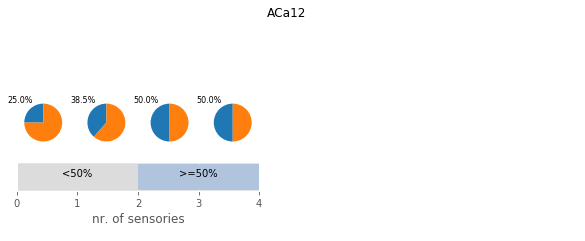

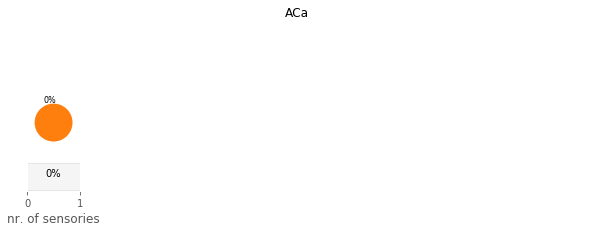

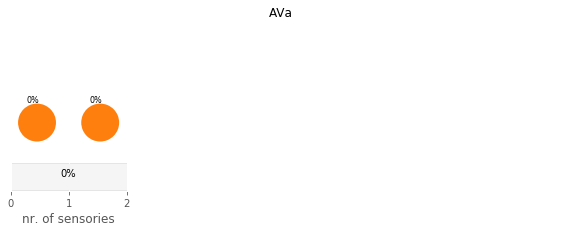

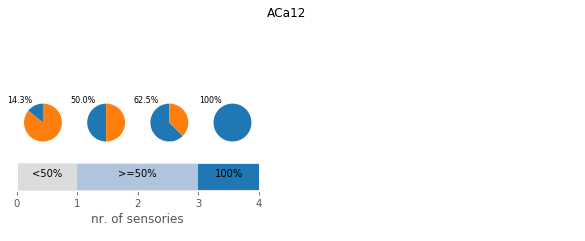

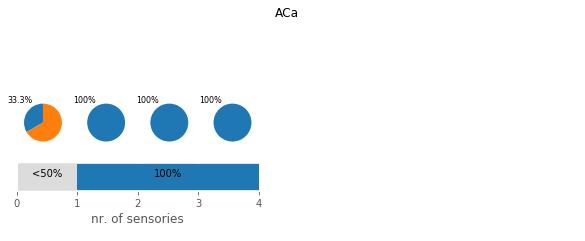

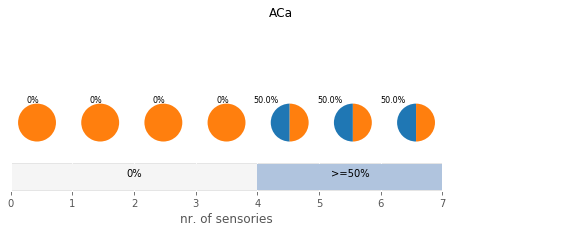

In [132]:
for mn in mns:
    pie_bars(mn,senlist1)

No input of this type
No input of this type
27
No input of this type
No input of this type


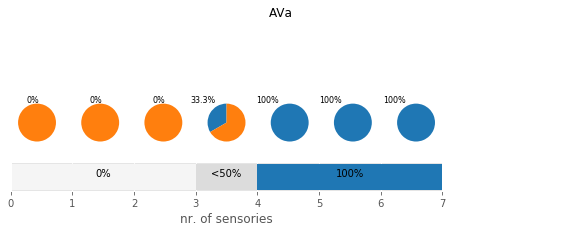

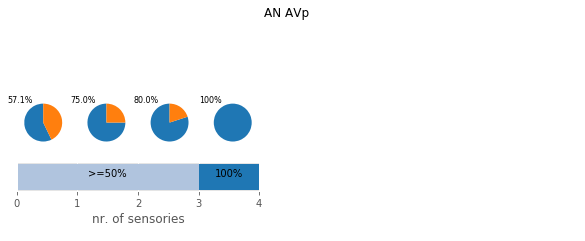

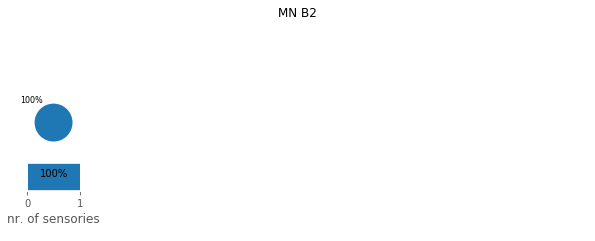

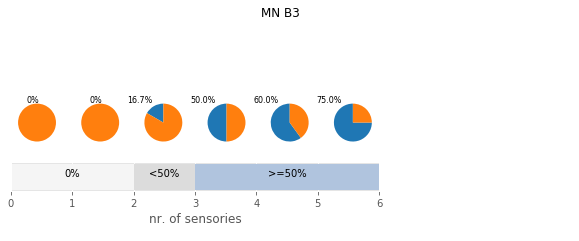

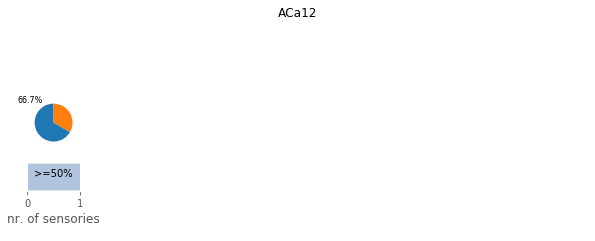

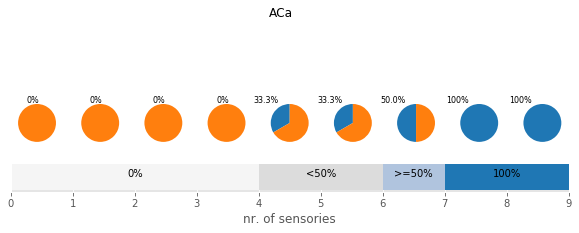

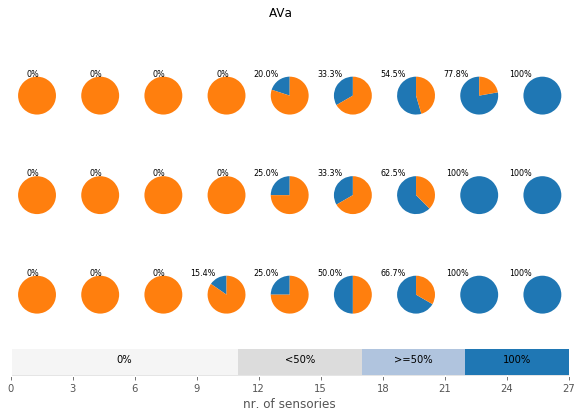

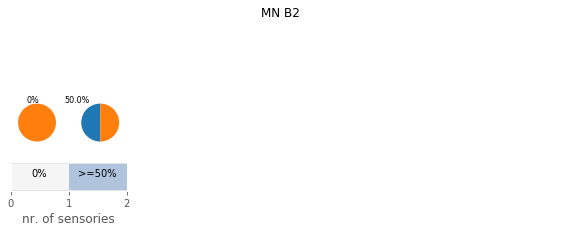

In [133]:
for s in seos:
    pie_bars(s,senlist2)

No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type


[[4, 4, 0], [1, 4, 7], [2, 0, 0]]

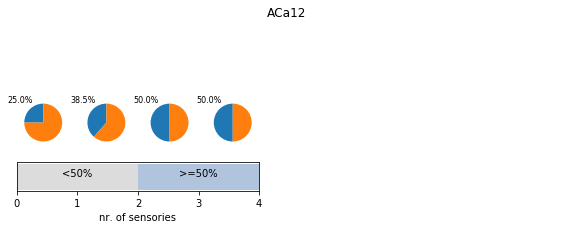

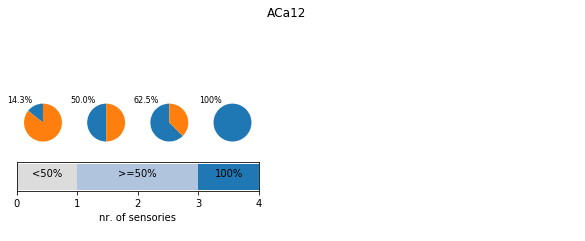

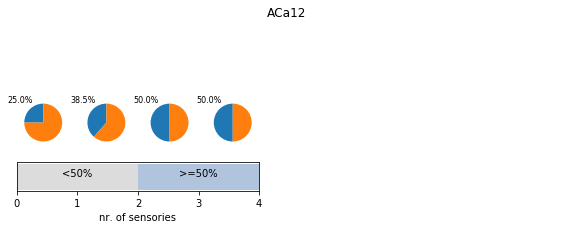

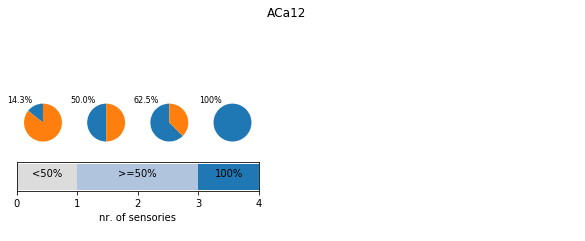

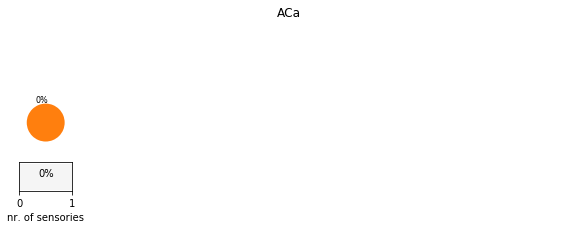

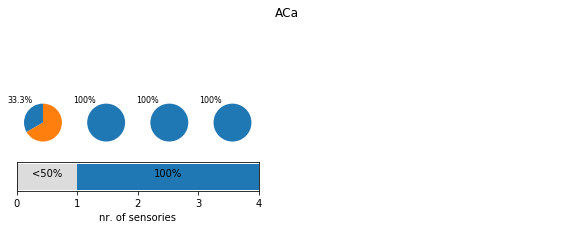

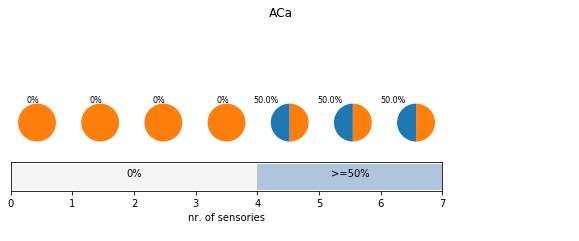

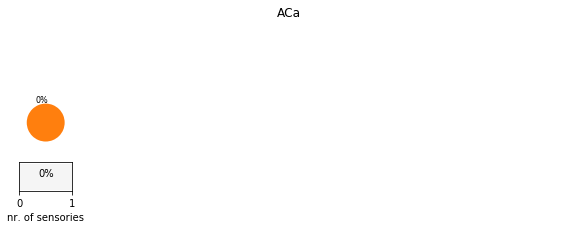

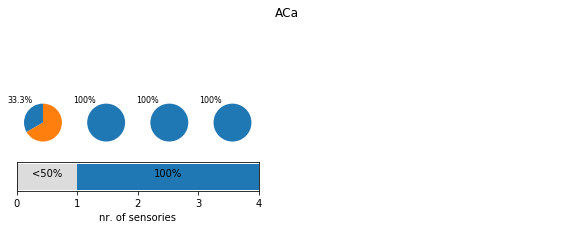

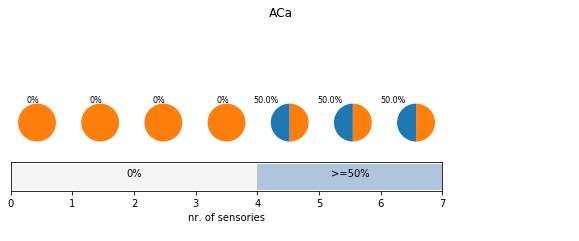

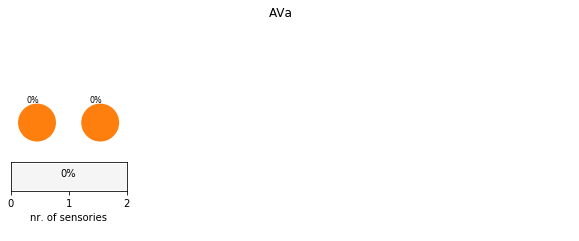

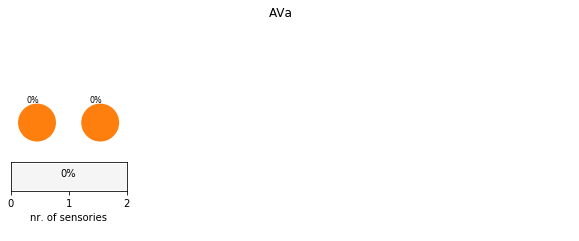

In [119]:
mns_all = []
nrs = []
for s in senlist1:
    data = [sen_ratio(mn,s)[:-1] for mn in mns]
    tots = [sen_ratio(mn,s)[-1:] for mn in mns]
    mns_all.append(pd.DataFrame(data,index = ['IPC','DMS','DH44'],columns = [1,2,3,4]))
    nrs.append(list(itertools.chain.from_iterable(tots)))
nrs

In [120]:
from matplotlib import colors as mcolors

cols = dict(mcolors.TABLEAU_COLORS)

cat_cols = ['tab:blue', 'tab:orange','tab:purple','tab:brown']

No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type


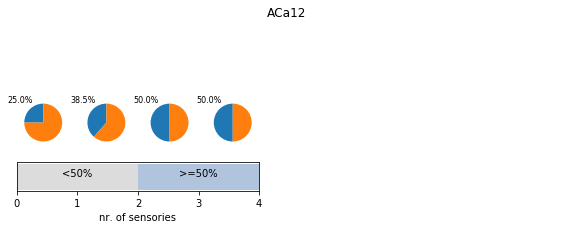

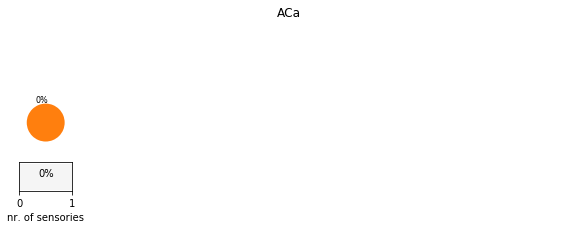

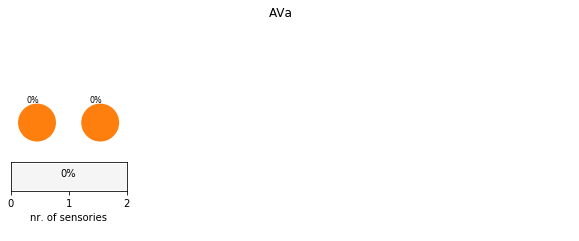

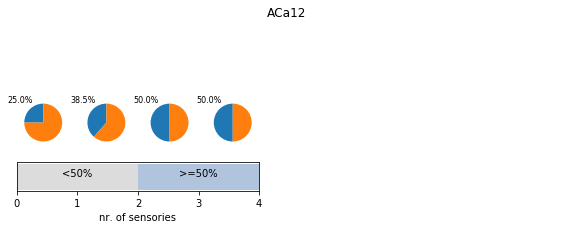

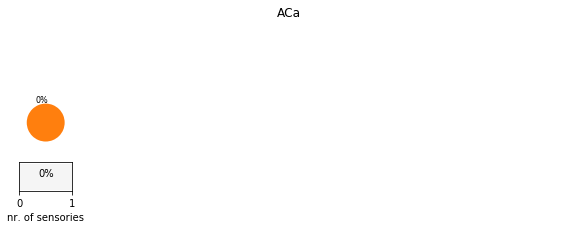

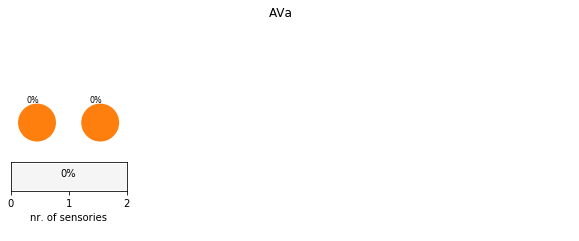

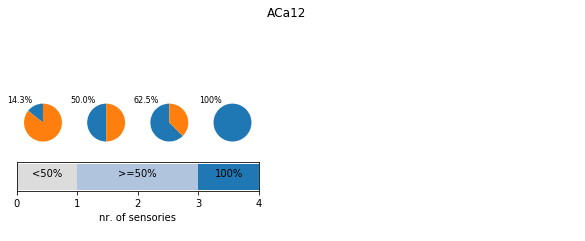

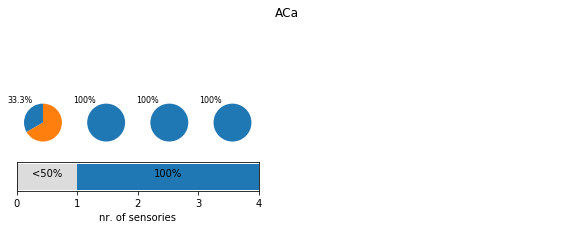

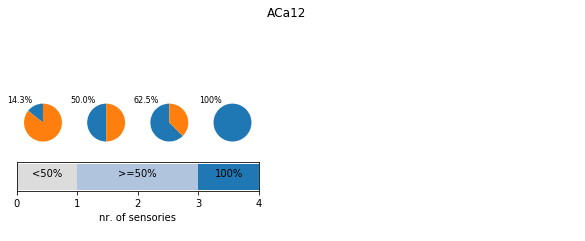

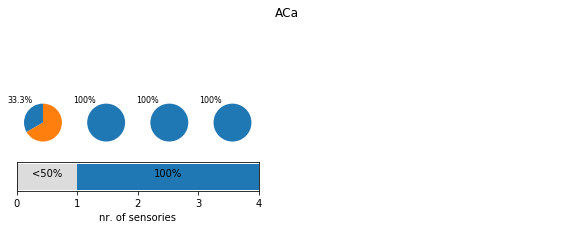

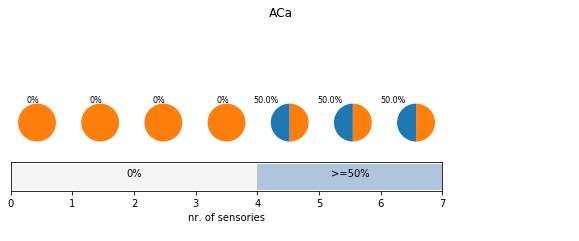

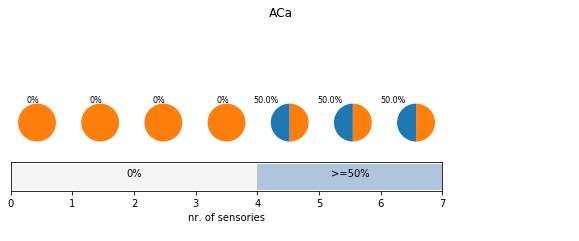

In [121]:
sen_all = []
nrs1 = []
cols_orig = [1,2,3,4]
tars = ['IPC','DMS','DH44']
cols_exp = ['1: sens>inter',
    '2: sens>inter for >=50% triples','3: sens>inter for <50% triples','4: inter>sens']
count = 0
for mn in mns:
    data = [sen_ratio(mn,s)[:-1] for s in senlist1]
    tots = [sen_ratio(mn,s)[-1:] for s in senlist1]
    
    # The first one is for when you need the tables that are easier to read- I saved those in barplot-tables-only
#     sen_all.append(pd.DataFrame(data,index = [n+'-'+tars[count] for n in senlist1],columns = cols_orig))
    sen_all.append(pd.DataFrame(data,index = senlist1,columns = cols_exp))

    nrs1.append(list(itertools.chain.from_iterable(tots)))
    count+=1
#The lists of numbers in nrs refer to IPC,DMS,DH44
for i in range(0,len(sen_all)):
    sen_all[i].to_csv(r'/home/ben/all-csvs/disp_barplots'+tars[i]+'.csv')


In [124]:
seos = [csv_se0p, csv_se0ens3]

No input of this type
No input of this type
No input of this type
No input of this type
[[0], [0], [7], [4], [1], [6]]
27
No input of this type
No input of this type
27
No input of this type
No input of this type
[[1], [9], [27], [0], [2], [0]]


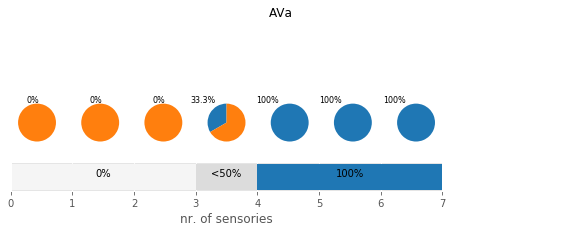

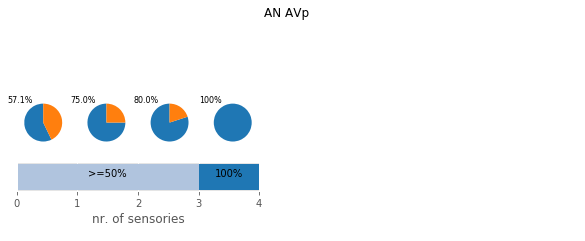

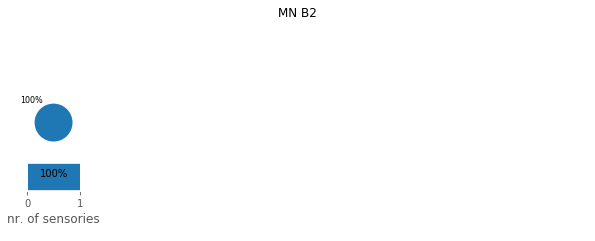

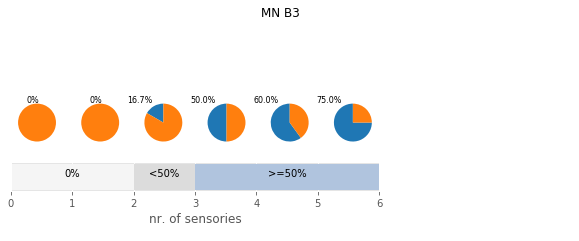

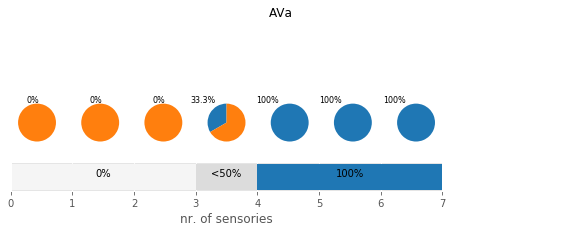

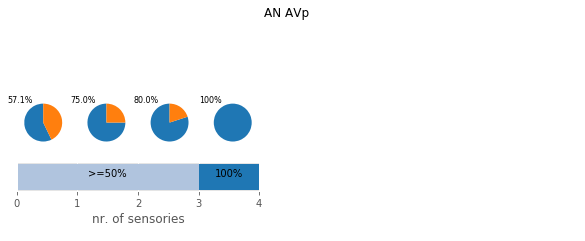

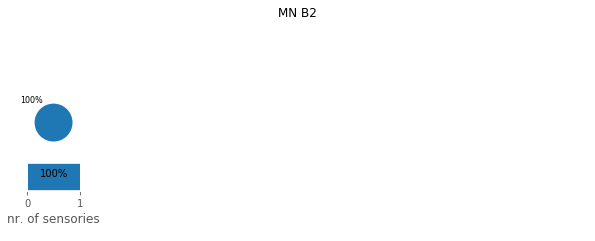

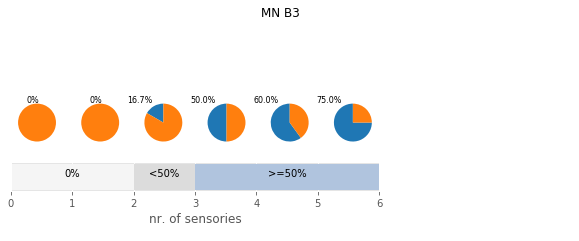

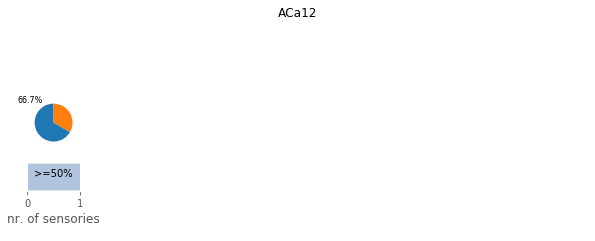

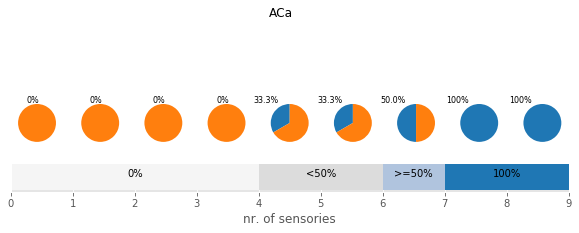

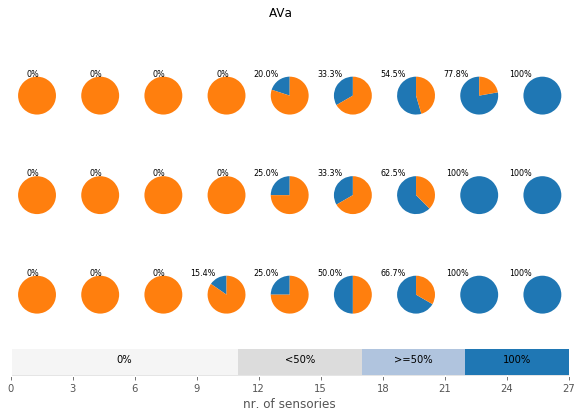

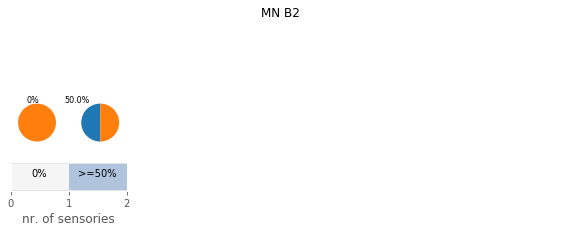

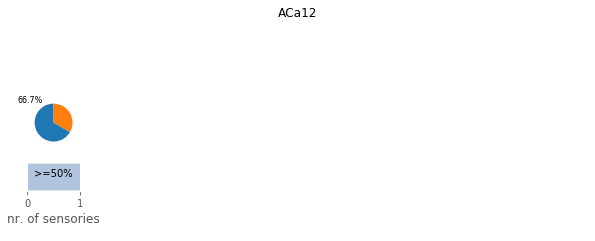

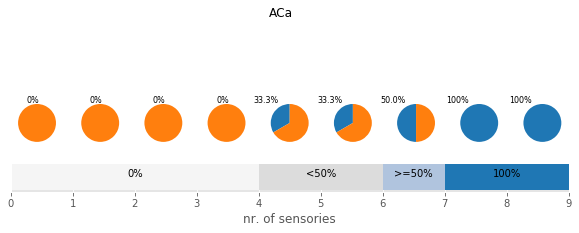

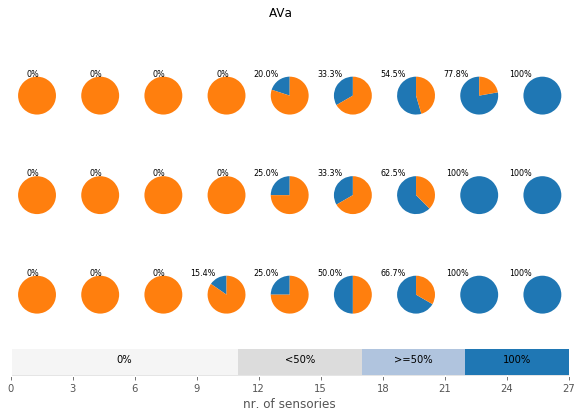

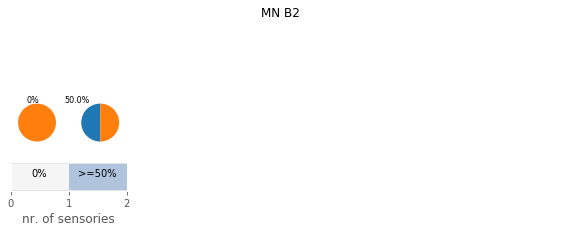

In [125]:
sen_seos = []
nrs2= []
cols_orig = [1,2,3,4]
cols_exp = ['1: sens>inter',
    '2: sens>inter for >=50% triples','3: sens>inter for <50% triples','4: inter>sens']
tars_seo = ['Se0ph','Se0en']
count = 0
for mn in seos:
    data = [sen_ratio(mn,s)[:-1] for s in senlist2]
    tots = [sen_ratio(mn,s)[-1:] for s in senlist2]
    
#     sen_seos.append(pd.DataFrame(data,index = [n+'-'+tars_seo[count] for n in senlist2],columns = cols_orig))
    sen_seos.append(pd.DataFrame(data,index = senlist2,columns = cols_orig))
    nrs2.append(list(itertools.chain.from_iterable(tots)))
    print(tots)
    count+=1
for i in range(0,len(sen_seos)):
    sen_seos[i].to_csv(r'/home/ben/all-csvs/disp_barplots'+tars_seo[i]+'.csv')

Similar representation with barplots (not used in the final version of the thesis)

9
[-0.08399999999999999, 0.9159999999999999, 1.9160000000000001, -0.08399999999999999, 0.9159999999999999, 1.9160000000000001, -0.08399999999999999, 0.9159999999999999, 1.9160000000000001, -0.08399999999999999, 0.9159999999999999, 1.9160000000000001, 0.06, 1.06, 2.06, 0.06, 1.06, 2.06, 0.06, 1.06, 2.06, 0.06, 1.06, 2.06, 0.204, 1.204, 2.204, 0.204, 1.204, 2.204, 0.204, 1.204, 2.204, 0.204, 1.204, 2.204]


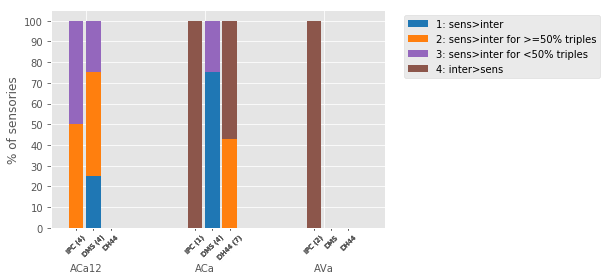

In [123]:
from collections import OrderedDict

plt.style.use('ggplot')
fig, ax = plt.subplots()

sen_all[0].plot.bar(stacked=True,width = 0.12,position = 1.2,color = cat_cols,left= 2,ax=ax)
sen_all[1].plot.bar(stacked=True,width = 0.12,position = 0,color = cat_cols,left = 2,ax=ax)
sen_all[2].plot.bar(stacked=True,width = 0.12,position = -1.2,color = cat_cols,left = 2, ax=ax)

# ax.minorticks_on()
# ax = plt.gca()
pos = []
lab = []
for bar in ax.patches:
    pos.append(bar.get_x()+bar.get_width()/2.)
ax.set_xticks(pos,minor=True)

print(len(set(pos)))
print(pos)

lab_ipc = ['IPC '+'('+str(n)+')' if n!=0 else 'IPC' for n in nrs1[0]]*4
lab_dm = ['DMS '+'('+str(n)+')' if n!=0 else 'DMS' for n in nrs1[1]]*4
lab_dh = ['DH44 '+'('+str(n)+')' if n!=0 else 'DH44' for n in nrs1[2]]*4


lab = lab_ipc+lab_dm+lab_dh
ax.set_xticklabels(lab,minor=True,fontsize = 7,rotation=45)
ax.tick_params(axis='x', which='major', pad=35, size=0,width=40)
plt.setp(ax.get_xticklabels(), rotation=0)

left, right = plt.xlim() 
bott, top = plt.ylim()
plt.xlim(-0.3, right)
plt.ylabel('% of sensories')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.04,1), loc="upper left")
# ax.get_legend().remove()
ax.tick_params(axis='y',length=4)
plt.yticks(np.arange(0,110,10))
plt.savefig('new-disp-barplots-mNSCs-long-leg.png',bbox_inches='tight',dpi=1000)


[[0, 0, 7, 4, 1, 6], [1, 9, 27, 0, 2, 0]]


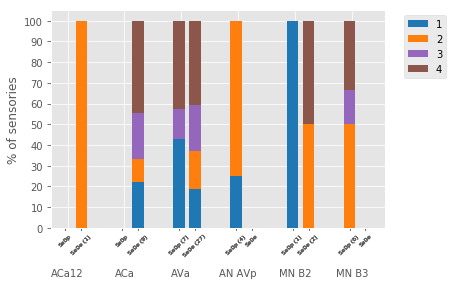

In [126]:

plt.style.use('ggplot')
fig, ax = plt.subplots()

sen_seos[0].plot.bar(stacked=True,width = 0.2,position = 0.7,color = cat_cols,left= 2,ax=ax)
sen_seos[1].plot.bar(stacked=True,width = 0.2,position = -0.7,color = cat_cols,left = 2,ax=ax)

pos = []
lab = []
for bar in ax.patches:
    pos.append(bar.get_x()+bar.get_width()/2.)
ax.set_xticks(pos,minor=True)

print (nrs2)
lab_ph = ['Se0p '+'('+str(n)+')' if n!=0 else 'Se0p' for n in nrs2[0]]*4
lab_ens = ['Se0e '+'('+str(n)+')' if n!=0 else 'Se0e' for n in nrs2[1]]*4

lab = lab_ph + lab_ens
ax.set_xticklabels(lab,minor=True,fontsize = 6,rotation=45)
ax.tick_params(axis='x', which='major', pad=40, size=0,width=40)
plt.setp(ax.get_xticklabels(), rotation=0)

left, right = plt.xlim() 
bott, top = plt.ylim()
plt.xlim(-0.3, right)
plt.ylabel('% of sensories')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.04,1), loc="upper left")

# ax.get_legend().remove()
ax.tick_params(axis='y',length=4)
plt.yticks(np.arange(0,110,10))
# plt.show()
plt.savefig('new-disp-barplots-se0s-short-leg.png',bbox_inches='tight',dpi=1000)
# 

Significance tests per triple where you just input a tripdf and it adds a significance value column + a pvalue column; used later 

In [127]:
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats import bartlett

from ast import literal_eval
import math
import itertools

def sig_triple_test(tripdf):
    
    targets = list(set(tripdf['target'].values.tolist()))
    dh_df = tripdf.copy()
    dh_df.all_disp_inter = dh_df.all_disp_inter.apply(literal_eval)
    dh_df.all_disp_source = dh_df.all_disp_source.apply(literal_eval)
    interlist = dh_df.all_disp_inter.values.tolist()
    slist = dh_df.all_disp_source.values.tolist()
#         diflist = dh_df['diff (sens-inter)'].values.tolist()

    pairs = [n for n in zip(slist,interlist)]
    
    # Initializing the column
    siglist = []
    plist = []
    tlist = []
    statlist = []
#     dval = {}
    alpha = 0.05
#     print(len(pairs))
    for pair in pairs:
#         print(pairs)

        avg1 = round(sum(pair[0])/len(pair[0]),7)
        avg2 = round(sum(pair[1])/len(pair[1]),7)
        dif = round(avg2-avg1,7)

        if len(pair[0])>=3 and len(pair[1])>=3:
            shap1, t1 = shapiro(pair[0])
            shap2, t2 = shapiro(pair[1])
            if t1 > alpha and t2 > alpha:
                lev_, lp = bartlett(pair[0], pair[1])
                if lp > alpha:
                    stat, p = ttest_ind(pair[0], pair[1])
                    tlist.append('T')
                else:
                    stat , p = mannwhitneyu(pair[0], pair[1])
                    tlist.append('MW')
            else:
                stat , p = mannwhitneyu(pair[0], pair[1])
                tlist.append('MW')

        else:
            alpha = 0.05
            stat, p = mannwhitneyu(pair[0],pair[1])
            tlist.append('MW')


        sig = False
        if p > alpha:
            pass
#                 print('Same distribution (fail to reject H0)')
        else:
            sig = True
#                 print('Different distribution (reject H0)')
        siglist.append(sig)
        plist.append(p)
        statlist.append(stat)
#     print(len(siglist))
    dh_df['significant'] = siglist
    dh_df['p_val'] = plist
    dh_df['test'] = tlist
    dh_df['stat'] = statlist
    
    dh_df.to_csv(r'/home/ben/all-csvs/disp-sig-triple-'+targets[0]+'.csv')

    return dh_df


In [132]:
pse0e_disp = sig_triple_test(csv_se0ens3)

In [134]:
pse0p_disp = sig_triple_test(csv_se0p)

In [135]:
pipc_disp = sig_triple_test(csv_ipc)

In [138]:
pdms_disp = sig_triple_test(csv_dms)

In [137]:
pdh_disp = sig_triple_test(csv_dh)

# Boxplots for total dispersion

This one plots the total distribution considering the AVERAGE dispersion values per neuron (instead of the values between each pair of synapses). If eu == True, it plots for the euclidean dispersion instead of the arbor dispersion

In [177]:
import scipy.stats as ss
import seaborn as sns
from collections import OrderedDict
cmaps = OrderedDict()
from matplotlib import colors as mcolors
import math
import itertools
from ast import literal_eval

# In boi2 there are 34 colors
colors = dict(mcolors.TABLEAU_COLORS)


sencols1 = ['tab:blue','tab:red','tab:pink','tab:orange']
sencols2 = sencols1[0:3]+['tab:brown','tab:purple','tab:cyan']+[sencols1[3]]

def total_boxplot(tripdf,senlist,eu = False):  
    
    dh_df = tripdf.copy()
    # The literal_eval is needed to convert the cells with the distance lists into actual lists (from str)
#     dh_df.all_disp_inter = dh_df.all_disp_inter.apply(literal_eval)
    if eu == False:
        a = dh_df.avg_disp_inter.values.tolist()
    else:
        a = dh_df.eu_avg_inter.values.tolist()
    interlist = list(set(a))
    # We need to make a new list consisting of nonrepeating values; this is done for the inters names and distances
#     new_a= list(set(tuple(i) for i in a))
#     new_is = list(set(tripdf['interneuron'].values.tolist()))
    # Taking out the nr. of connectors; this is needed for the same neuron to have the same color everywhere
#     new2_is = list(set([n[:-4] for n in new_is]))
#     interlist = list(itertools.chain.from_iterable(new_a))    
    dflist = []
    for s in senlist:
        dh_df1 = dh_df.loc[dh_df['type']==s]
        if dh_df.empty==False:  
            
            if eu == False:
                s = dh_df1.avg_disp_source.values.tolist()
            else:
                s = dh_df1.eu_avg_source.values.tolist()
            slist = list(set(s))
            dflist.append(slist)

        else:
            print(tr+' has no sensory input of the type '+stype)
    
    newl = dflist +[interlist]
   
    df_a = pd.DataFrame(newl,index = senlist+['Interneuron'])

    if 'AN AVp' in senlist:
        ax = sns.boxplot(data = df_a.transpose(),orient='h',palette = sencols2)
    else:
        ax = sns.boxplot(data = df_a.transpose(),orient='h',palette = sencols1)


    first = dh_df.target.values.tolist()[0]
    ax.set_xlabel('dispersion', fontsize=14)
    sns.set()
    if 'SE' not in first:
        name = first[:3]
        ax.set_title(first[:4])
    else:
        if '4' in first:
            name = 'SE0-ph'
            ax.set_title(name)
        else:
            name = 'SE0-ens'
            ax.set_title(name)
    
    if eu == False:
        plt.savefig('new-disp-total-avg-'+name+'.png',bbox_inches='tight',dpi=1000)
    else:
        plt.savefig('new-eu-disp-total-avg-'+name+'.png',bbox_inches='tight',dpi=1000)

senlist1 =['ACa12', 'ACa','AVa']
senlist2 = ['ACa12', 'ACa', 'AVa', 'AN AVp', 'MN B2', 'MN B3']

# for d in dmss[0]:
#     for el in senlist1[1:]:
#         plt.figure()
#         avg_trip_boxplot(dmstrip1,el,d)

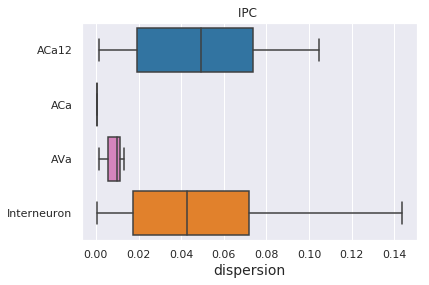

In [183]:
total_boxplot(csv_ipc,senlist1)

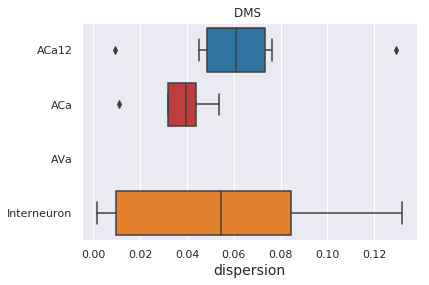

In [179]:
total_boxplot(csv_dms,senlist1)

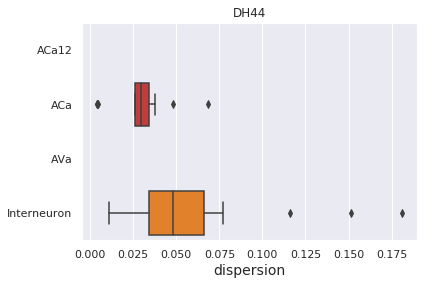

In [180]:
total_boxplot(csv_dh,senlist1)

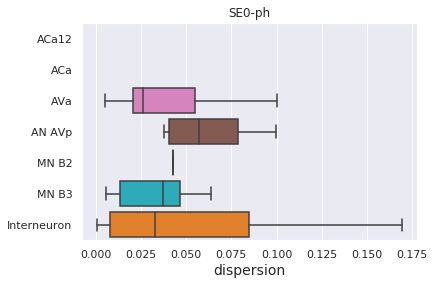

In [181]:
total_boxplot(csv_se0p,senlist2)

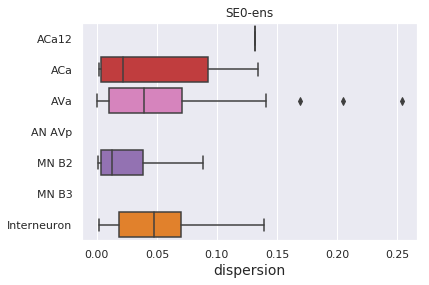

In [182]:
total_boxplot(csv_se0ens3,senlist2)

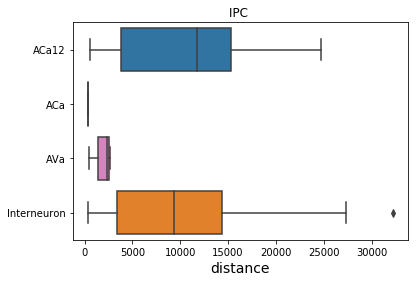

In [86]:
total_boxplot(csv_eipc,senlist1,True)

In [ ]:
total_boxplot(csv_edms,senlist1,True)

In [ ]:
total_boxplot(csv_edh,senlist1,True)

In [ ]:
total_boxplot(csv_ese0p,senlist2,True)

In [ ]:
total_boxplot(csv_ese0ens,senlist2,True)

Similar function considering ALL connections

In [ ]:
import scipy.stats as ss
import seaborn as sns
from collections import OrderedDict
cmaps = OrderedDict()
from matplotlib import colors as mcolors
import math
import itertools
from ast import literal_eval

# In boi2 there are 34 colors
colors = dict(mcolors.TABLEAU_COLORS)
mycols = ['darkorange','limegreen','gold','darkorchid','indigo','orangered','tomato','springgreen',
              'hotpink','darkturquoise','crimson','firebrick','deepskyblue','maroon','darkolivegreen','silver',
             'aqua','orchid','royalblue','darkred','thistle','mediumvioletred','chocolate','violet','darksalmon']
boi2 = [p for p in list(colors.keys()) if 'blue' not in p] +mycols


def avg_disp_boxplot(tripdf,stype,tr):  
    ax=None
    dh_df= tripdf.loc[tripdf['type']==stype].loc[tripdf['target']==tr]
    if dh_df.empty==False:
        
        # The literal_eval is needed to convert the cells with the distance lists into actual lists (from str)
        dh_df.all_disp_inter = dh_df.all_disp_inter.apply(literal_eval)
#         print(dh_df)
        a = dh_df.all_disp_inter.values.tolist()
        # We need to make a new list consisting of nonrepeating values; this is done for the inters names and distances
        new_a= list(set(tuple(i) for i in a))
        interlist = list(itertools.chain.from_iterable(new_a))    
        new_is = list(set(tripdf['interneuron'].values.tolist()))
        # Taking out the nr. of connectors; this is needed for the same neuron to have the same color everywhere
        new2_is = list(set([n[:-4] for n in new_is]))
        col_dict = dict(zip(new2_is, boi2))
        

        dh_df.all_disp_source = dh_df.all_disp_source.apply(literal_eval)
        s = dh_df.all_disp_source.values.tolist()
        new_s = list(set(tuple(i) for i in s))
        slist = list(itertools.chain.from_iterable(new_s))

        df_a=pd.DataFrame([slist,interlist], index = [stype,'Interneuron'])
        ax = sns.boxplot(data=df_a.transpose(),orient='h')


        ax.set_xlabel('distance', fontsize=14)
        ax.set_title(stype+' to '+tr)
        plt.savefig('avg-dispersion-triples-'+stype+'-'+tr+'.pdf',bbox_inches='tight',dpi=1000)
    else:
        print(tr+' has no sensory input of the type '+stype)

senlist1 =['ACa12', 'ACa','AVa']
senlist2 = ['ACa12', 'ACa', 'AN AVp','AVa', 'MN B2', 'MN B3']

Generating average boxplots showing all the values for the distances between each two connectors per sensory group and interneurons for a specific target

In [ ]:
# for d in dmss[0]:
#     for el in senlist1:
#         plt.figure()
#         avg_disp_boxplot(csv_dms,el,d)

In [ ]:
# for d in dhs[0]:
#     for el in senlist1:
#         plt.figure()
#         avg_disp_boxplot(csv_dh,el,d)

In [ ]:
# for d in ipcs[0]:
#     for el in senlist1:
#         plt.figure()
#         avg_disp_boxplot(csv_ipc,el,d)

In [ ]:
# for d in se0ps[0]:
#     for el in senlist2:
#         plt.figure()
#         avg_disp_boxplot(csv_se0p,el,d)

In [ ]:
# for d in se0enss_new[0]:
#     for el in senlist2:
#         plt.figure()
#         avg_disp_boxplot(csv_se0ens2,el,d)

# Frequency plots

Plots the dispersion values for either the sensory or interneurons for a list of target types in a frequency/shade plot

In [83]:
cols= [p for p in list(colors.keys())]+mycols
csvs = [csv_ipc,csv_dms,csv_dh,csv_se0p,csv_se0ens3]

def all_freq_plt(df_list,inter_ = False):
    ax=None
    count = 0
    for csv_df in df_list:
        dh_df = csv_df.copy()
        s = dh_df.avg_disp_source.values.tolist()
        sen = list(set(s))
        ints = dh_df.avg_disp_inter.values.tolist()
        inter = list(set(ints))
        tar = dh_df.target.values.tolist()[0]
        n_name = tar[:4].replace(' ','')
        if tar[-1]=='4':
            n_name='SE0ph'
        if inter_ ==True:
            ax = sns.distplot(inter,hist=False,kde=True,rug=True,rug_kws={'linewidth':1, "height":0.07 },
                              color = cols[count],label=n_name)
        else:
            ax = sns.distplot(sen,hist=False,kde=True,rug=True,rug_kws={'linewidth':1, "height":0.07 },
                              color = cols[count],label=n_name)

        l1 = ax.lines[count]
    # Get the xy data from the lines so that we can shade
        x1 = l1.get_xydata()[:,0]
        y1 = l1.get_xydata()[:,1]

        ax.fill_between(x1,y1, color = cols[count], alpha=0.3)
        count+=1
    ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    ax.set_xlabel('average dispersion', fontsize=14)
    ax.set_ylabel('frequency', fontsize=14)

    if inter_==True:
        plt.savefig('all-dispersion-shade-inter.png',bbox_inches='tight',dpi=1000)
    else:
        plt.savefig('all-dispersion-shade-sen.png',bbox_inches='tight',dpi=1000)

    plt.figure()

    return None

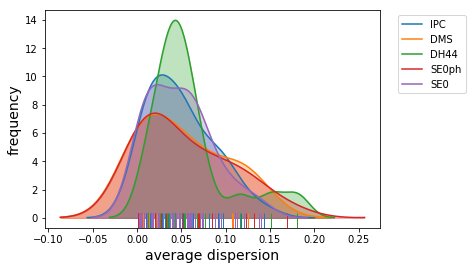

<Figure size 432x288 with 0 Axes>

In [84]:
all_freq_plt(csvs,True)

Now we will plot the frequency distribution in the form of shades for the sensory dispersion (blue) and the interneuron dispersion (orange), per single target neuron. Each sensory type is considered separately ('ACa', AVa' etc)

The next function plots the frequency plots per type, per single target; without an extra argument it prints the AVERAGES, otherwise with tot == True it prints for ALL

Also originally it prints from 0, but if you comment out the xlim part you can print it how it was (with negative values, already did it, saved in a special folder as neg)

In [156]:
import scipy.stats as ss
import seaborn as sns
from collections import OrderedDict
cmaps = OrderedDict()
from matplotlib import colors as mcolors
from sklearn.model_selection import GridSearchCV

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
boi = list(colors.keys())
boi2= [b for b in boi if 'orange' in b  or 'red' in b or 'blue' in b or 'green' in b if b!='aliceblue' and b!='darkblue' and b!='orangered' and b!='dodgerblue']
# print(boi2)

def tar_freq_plot(datf,s_type,tar,tot = False):  
   
    ax=None
    count = 0

    dh_df = datf.loc[datf['target']==tar].loc[datf['type']==s_type]
    if dh_df.empty==False:
        # The literal_eval is needed to convert the cells with the distance lists into actual lists (from str)
   
        if tot == False:
            slist = list(set(dh_df.avg_disp_source.values.tolist()))
            interlist = list(set(dh_df.avg_disp_inter.values.tolist()))
#             grid = GridSearchCV(KernelDensity(),
#             {'bandwidth': np.linspace(0.1, 1.0, 30)},
#             cv=20) # 20-fold cross-validation
#             grid.fit(slist[:, None])
#             print (grid.best_params_)
        else:
            dh_df.all_disp_inter = dh_df.all_disp_inter.apply(literal_eval)
            a = dh_df.all_disp_inter.values.tolist()
            # We need to make an new list consisting of nonrepeating values; this is done for the inters names and distances
            new_a= list(set(tuple(i) for i in a))
            interlist = list(itertools.chain.from_iterable(new_a))    

            dh_df.all_disp_source = dh_df.all_disp_source.apply(literal_eval)
            s = dh_df.all_disp_source.values.tolist()
            new_s = list(set(tuple(i) for i in s))
            slist = list(itertools.chain.from_iterable(new_s))
#             print(slist)
            

                
                
        ax = sns.distplot(slist,hist=False,kde=True,rug=False,kde_kws={"bw":0.02},
                              color = 'darkblue',label=s_type)
        sns.distplot(interlist,hist=False,kde=True,rug=False,kde_kws={"bw":0.02},
                              color = 'orangered',label='Interneuron')

        
        l1 = ax.lines[0]
        l2 = ax.lines[1]

        # Get the xy data from the lines so that we can shade
        x1 = l1.get_xydata()[:,0]
        y1 = l1.get_xydata()[:,1]
        x2 = l2.get_xydata()[:,0]
        y2 = l2.get_xydata()[:,1]
        ax.fill_between(x1,y1, color="darkblue", alpha=0.3)
        ax.fill_between(x2,y2, color="orangered", alpha=0.3)
        
        ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
        ax.set_xlabel('dispersion', fontsize=14)
        ax.set_ylabel('frequency', fontsize=14)
        left, right = plt.xlim() 
        ax.set(xlim=(0,right))

        plt.title(tar)
        if tot == False:
            plt.savefig('disp-tar-shade-'+tar+'-'+s_type+'.png',bbox_inches='tight',dpi=1000)
        else:
            plt.savefig('disp-all-tar-shade-'+tar+'-'+s_type+'.png',bbox_inches='tight',dpi=1000)



        return plt
    else:
        print('No input of this sensory type')


No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type


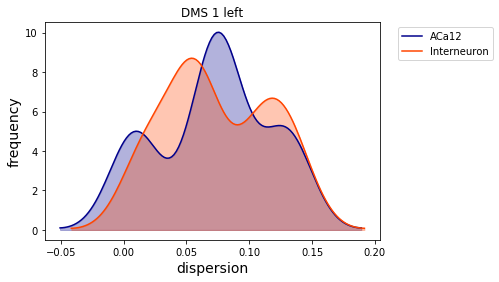

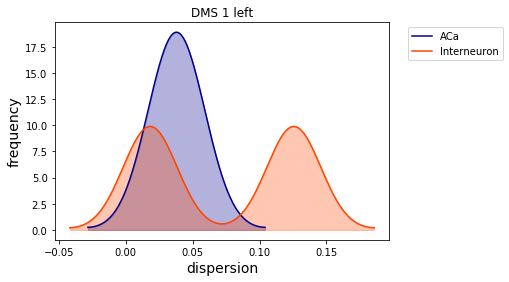

<Figure size 432x288 with 0 Axes>

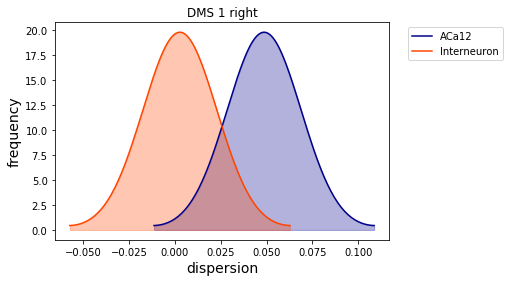

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

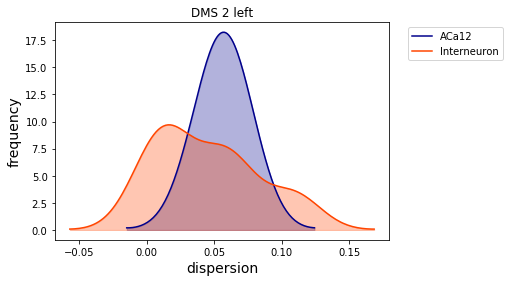

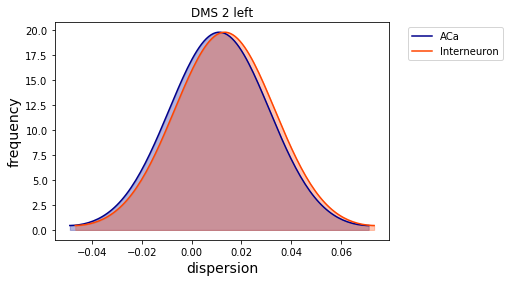

<Figure size 432x288 with 0 Axes>

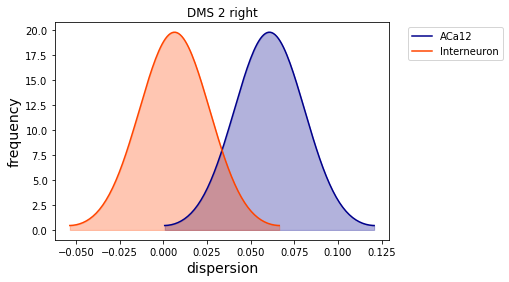

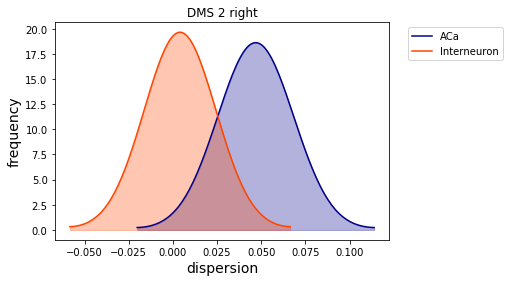

<Figure size 432x288 with 0 Axes>

In [139]:
for neur in dmss[0]:
    for st in senlist1:
#         print (neur)
        plt.figure()

        tar_freq_plot(csv_dms,st,neur)

No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type


<Figure size 432x288 with 0 Axes>

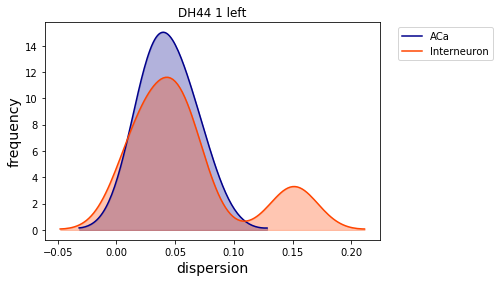

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

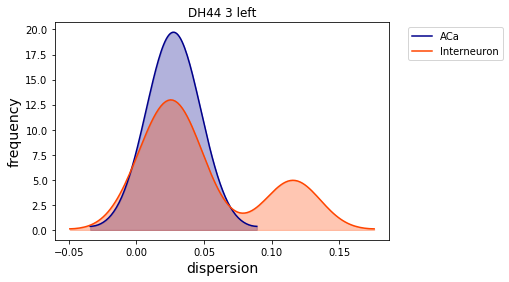

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

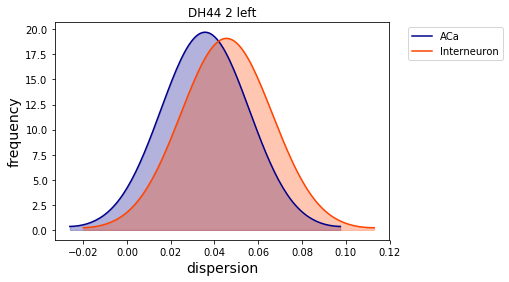

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

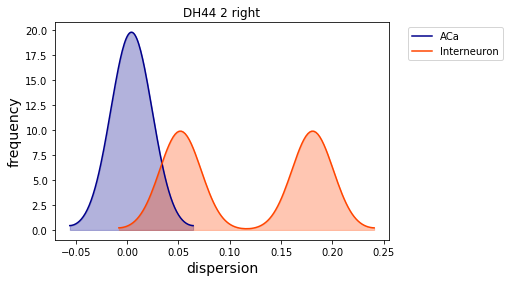

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

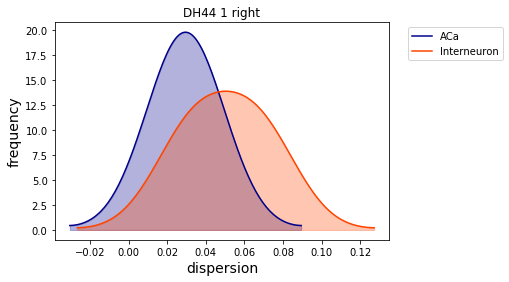

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

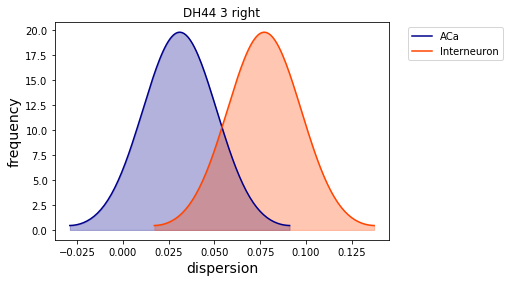

<Figure size 432x288 with 0 Axes>

In [140]:
for neur in dhs[0]:
    for st in senlist1:
#         print (neur)
        plt.figure()

        tar_freq_plot(csv_dh,st,neur)

No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

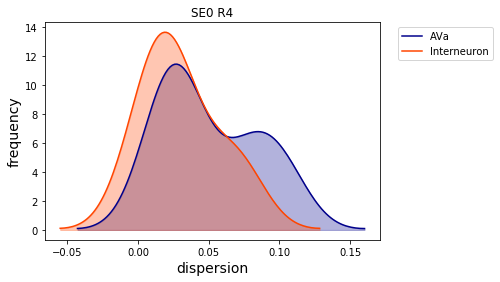

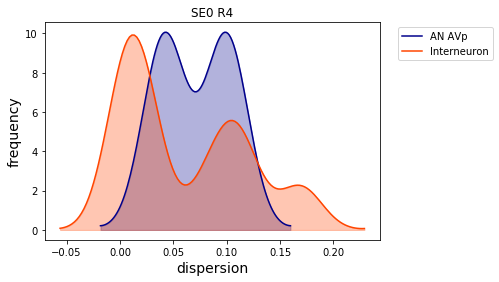

<Figure size 432x288 with 0 Axes>

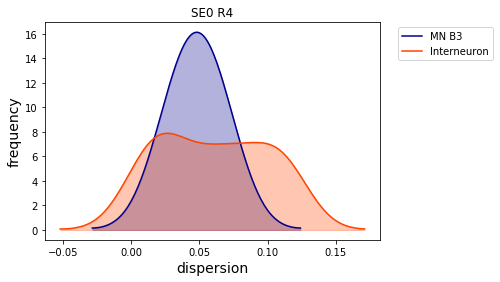

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

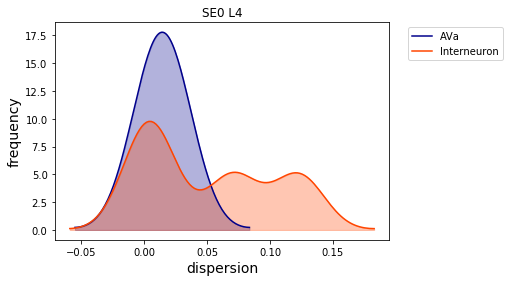

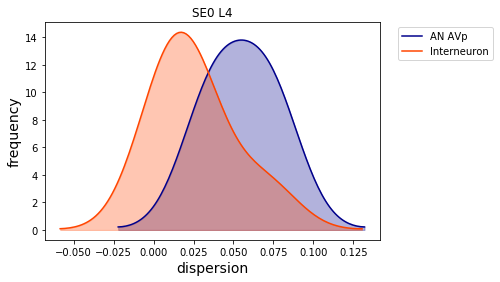

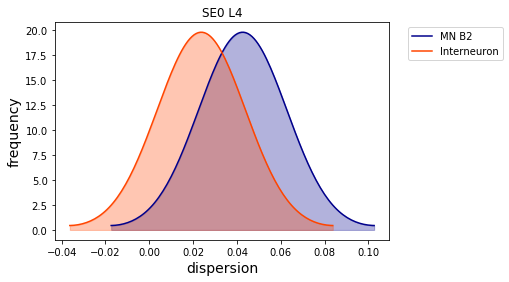

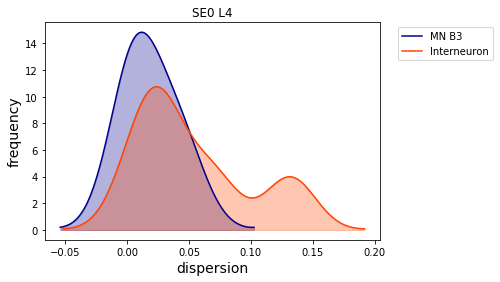

In [141]:
for neur in se0ps[0]:
    for st in senlist2:
#         print (neur)
        plt.figure()

        tar_freq_plot(csv_se0p,st,neur)

No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type
No input of this sensory type


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

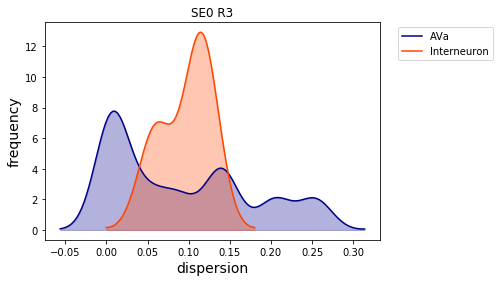

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

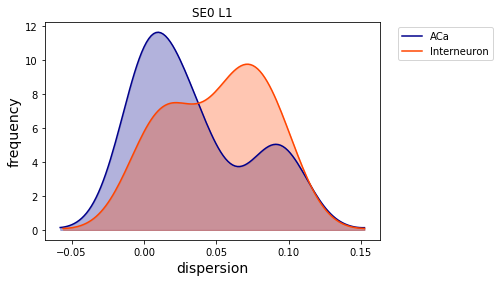

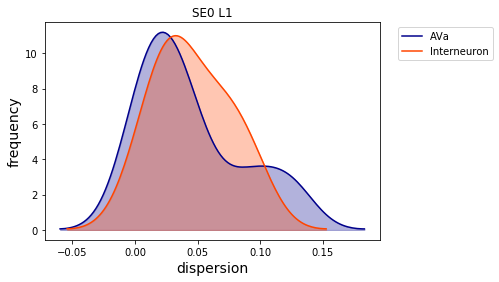

<Figure size 432x288 with 0 Axes>

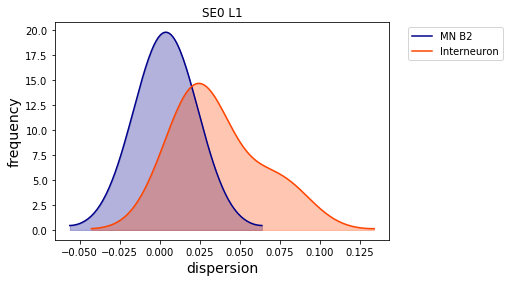

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

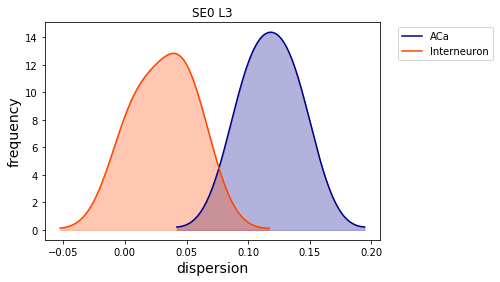

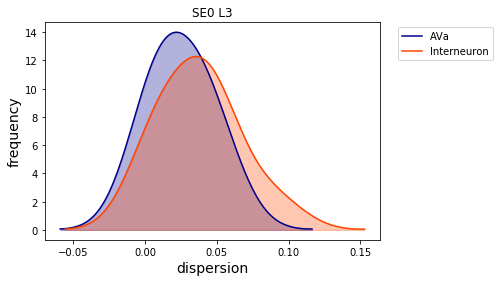

<Figure size 432x288 with 0 Axes>

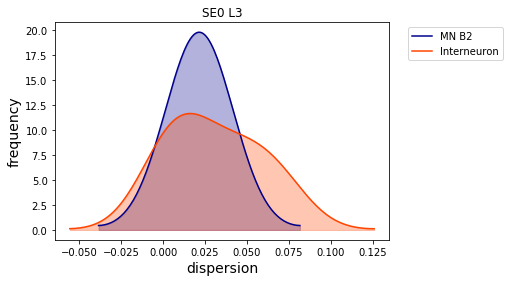

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

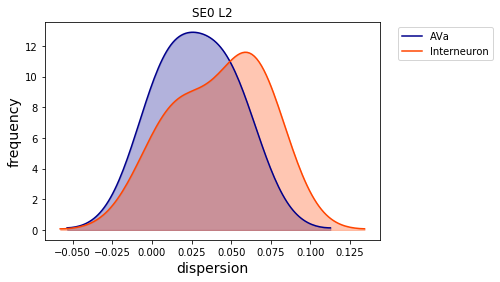

<Figure size 432x288 with 0 Axes>

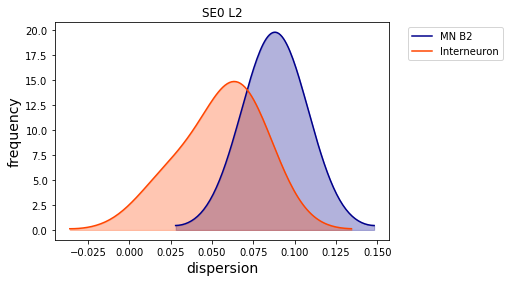

<Figure size 432x288 with 0 Axes>

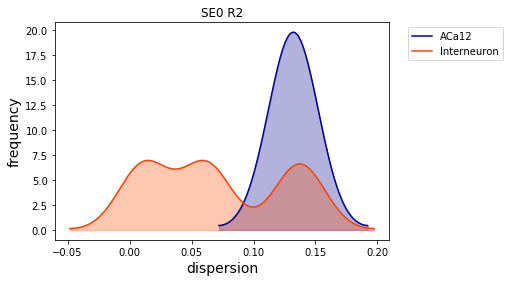

<Figure size 432x288 with 0 Axes>

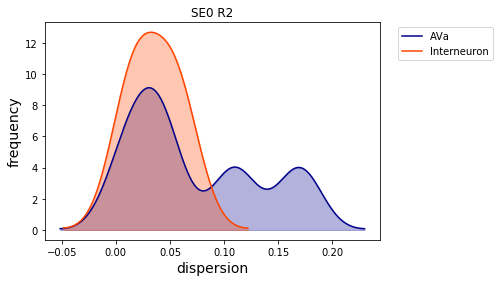

<Figure size 432x288 with 0 Axes>

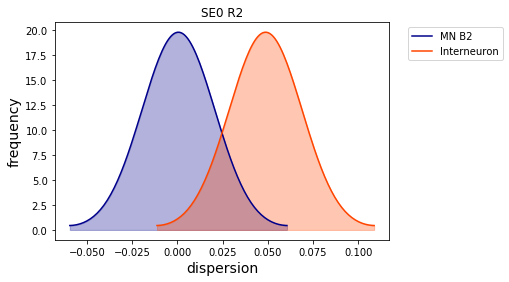

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

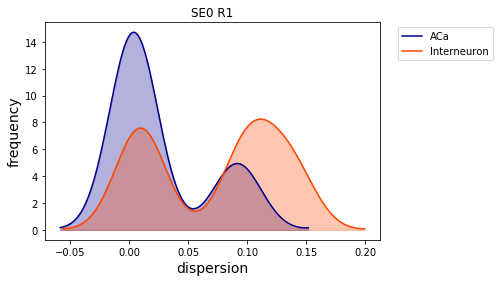

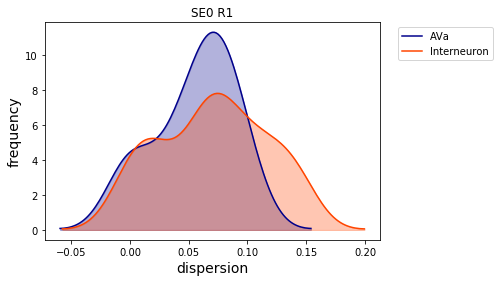

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [142]:
for neur in se0enss[0]:
    for st in senlist2:
#         print (neur)
        plt.figure()

        tar_freq_plot(csv_se0ens3,st,neur)

The next function is similar, only it plots for ALL target neurons (e.g. all IPCs)

Also it is made to start from 0 because negative dispersion doesn't make sense

In [169]:
import scipy.stats as ss
import seaborn as sns
from collections import OrderedDict
cmaps = OrderedDict()
from matplotlib import colors as mcolors


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
boi = list(colors.keys())
boi2= [b for b in boi if 'orange' in b  or 'red' in b or 'blue' in b or 'green' in b if b!='aliceblue' and b!='darkblue' and b!='orangered' and b!='dodgerblue']
# print(boi2)

def freq_plot(datf,s_type):  
   
    ax=None
    count = 0
    dh_df = datf.loc[datf['type']==s_type]
    if dh_df.empty==False:
        s = dh_df.avg_disp_source.values.tolist()
        sen = list(set(s))
        intern = dh_df.avg_disp_inter.values.tolist()
        interlist = list(set(intern))
        tar = dh_df.target.values.tolist()[0]
        n_name = tar[:4].replace(' ','')
        if tar[-1]=='4':
            n_name='SE0ph'

        ax = sns.distplot(sen,hist=False,kde=True,rug=False,kde_kws={"bw":0.02},
                              color = 'darkblue',label=s_type)
        sns.distplot(interlist,hist=False,kde=True,rug=False,kde_kws={"bw":0.02},
                              color = 'orangered',label='Interneuron')

   
    
#         sns.distplot(list12[0], hist=True,color = 'darkblue',kde_kws={"bw":0.02},label=cols[m],kde=True)
#         sns.distplot(list12[0], ax=ax, rug=False, kde=False, hist=True, norm_hist=False,color = 'darkblue', bins=10)
        
        l1 = ax.lines[0]
        l2 = ax.lines[1]

        # Get the xy data from the lines so that we can shade
        x1 = l1.get_xydata()[:,0]
        y1 = l1.get_xydata()[:,1]
        x2 = l2.get_xydata()[:,0]
        y2 = l2.get_xydata()[:,1]
        ax.fill_between(x1,y1, color="darkblue", alpha=0.3)
        ax.fill_between(x2,y2, color="orangered", alpha=0.3)
        
        ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
        ax.set_xlabel('dispersion', fontsize=14)
        ax.set_ylabel('frequency', fontsize=14)
        plt.title(n_name+'-'+s_type)
        left, right = plt.xlim() 
        ax.set(xlim=(0,right))
#     #     ax.set_title(cols[m])

        plt.savefig('sentype-shade-'+n_name+s_type+'.png',bbox_inches='tight',dpi=1000)

        plt.figure()

        return None
# #     plt.show(block=False)
    #     x = list12[0]
#     sns.kdeplot(x)
#     sns.kdeplot(x, bw=.1, label="bw: 0.2")
#     sns.kdeplot(x, bw=1, label="bw: 1")
#     plt.legend();
#     figure(num=None, figsize=(50, 46), dpi=80, facecolor='w', edgecolor='k')   


In [170]:
csv_ipc

,Unnamed: 0,source,interneuron,target,all_disp_source,all_disp_inter,avg_disp_source,avg_disp_inter,diff (sens-int),type
0,0,AN-L-Sens-B1-AVa-19 (2),hugin-PC left 4 (3),IPC 2 left,[0.00144],"[0.030435, 0.0059607, 0.0244744]",0.001440,0.020290,0.018850,AVa
1,1,AN-L-Sens-B1-ACa-02 (3),AN: DPMlp Lar_right (9),IPC 2 left,"[0.1391572, 0.0101452, 0.1351355]","[0.0426879, 0.0815147, 0.0944371, 0.0045075, 0...",0.094813,0.051145,-0.043668,ACa12
2,2,AN-L-Sens-B1-ACa-02 (3),hugin-PC left 1 (2),IPC 2 left,"[0.1391572, 0.0101452, 0.1351355]",[0.0159893],0.094813,0.015989,-0.078823,ACa12
3,3,AN-R-Sens-B1-ACa-01 (2),hugin-PC left 4 (3),IPC 2 left,[0.1045136],"[0.030435, 0.0059607, 0.0244744]",0.104514,0.020290,-0.084224,ACa12
4,4,AN-R-Sens-B1-ACa-02 (5),AN: DPMlp Lar_right (9),IPC 2 left,"[0.0355799, 0.0886616, 0.0680333, 0.0783827, 0...","[0.0426879, 0.0815147, 0.0944371, 0.0045075, 0...",0.049071,0.051145,0.002073,ACa12
5,5,AN-R-Sens-B1-ACa-02 (5),SOG into brain contralaterally right - paired ...,IPC 2 left,"[0.0355799, 0.0886616, 0.0680333, 0.0783827, 0...",[0.0516443],0.049071,0.051644,0.002573,ACa12
6,6,AN-L-Sens-B1-ACa-02 (4),AN: DPMlp Lar_right (7),IPC 7 left,"[0.0085649, 0.0166839, 0.0250907, 0.0084068, 0...","[0.0316148, 0.0797407, 0.0006428, 0.0322576, 0...",0.013554,0.056513,0.042959,ACa12
7,7,AN-L-Sens-B1-ACa-02 (4),hugin-PC left 1 (2),IPC 7 left,"[0.0085649, 0.0166839, 0.0250907, 0.0084068, 0...",[0.0609993],0.013554,0.060999,0.047445,ACa12
8,8,AN-L-Sens-B1-ACa-02 (4),hugin-PC left 3 (2),IPC 7 left,"[0.0085649, 0.0166839, 0.0250907, 0.0084068, 0...",[0.0287182],0.013554,0.028718,0.015164,ACa12
9,9,AN-L-Sens-B1-ACa-02 (6),contra-vine 2 left (2),IPC 3 right,"[0.076012, 0.075013, 0.0859593, 0.0874183, 0.0...",[0.0095758],0.043725,0.009576,-0.034149,ACa12


In [171]:
senlist1

['ACa12', 'ACa', 'AVa']

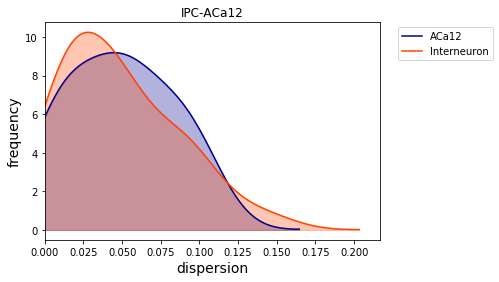

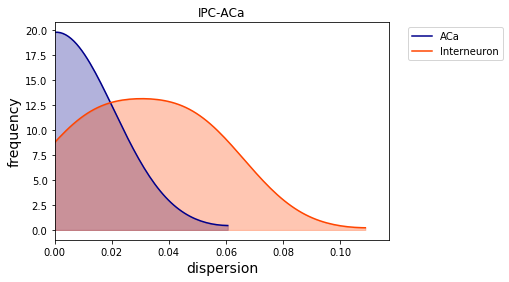

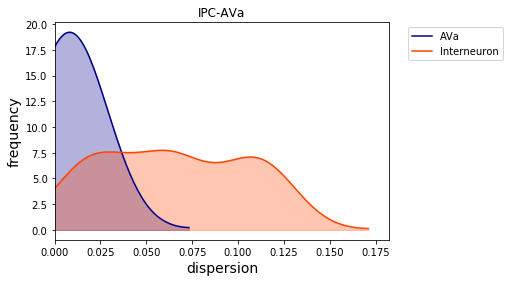

<Figure size 432x288 with 0 Axes>

In [172]:
for s in senlist1:
    freq_plot(csv_ipc,s)

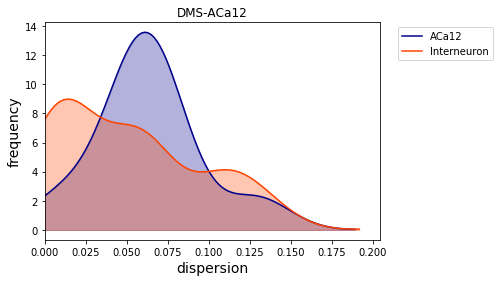

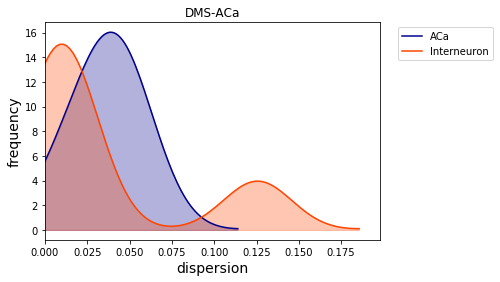

<Figure size 432x288 with 0 Axes>

In [173]:
for s in senlist1[:-1]:
    freq_plot(csv_dms,s)

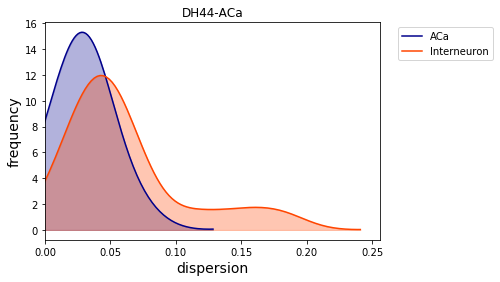

<Figure size 432x288 with 0 Axes>

In [174]:
for s in senlist1[:-1]:
    freq_plot(csv_dh,s)

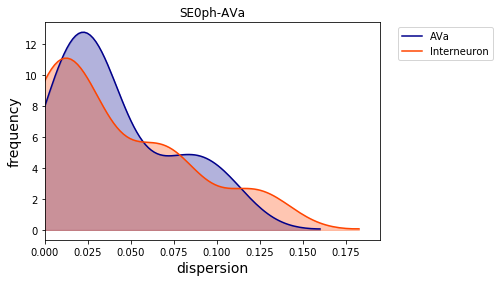

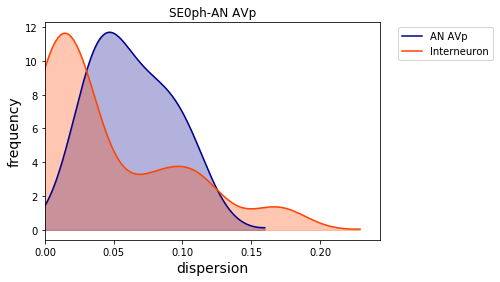

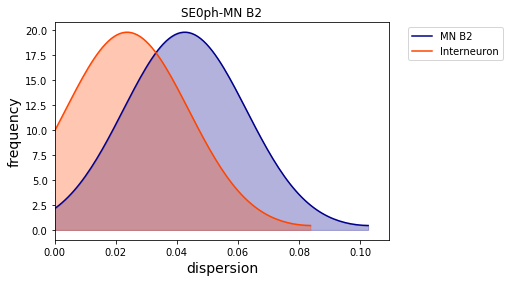

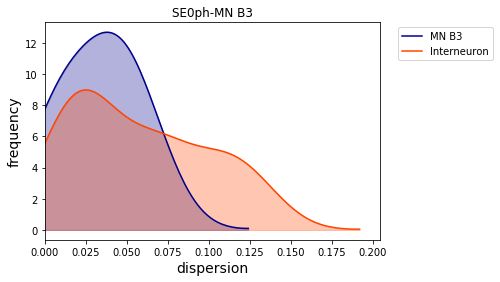

<Figure size 432x288 with 0 Axes>

In [175]:
for s in senlist2:
    freq_plot(csv_se0p,s)

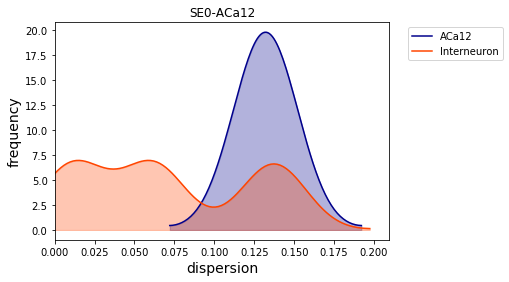

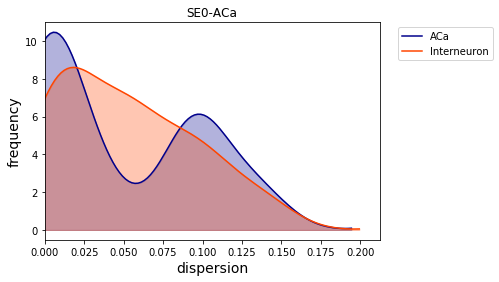

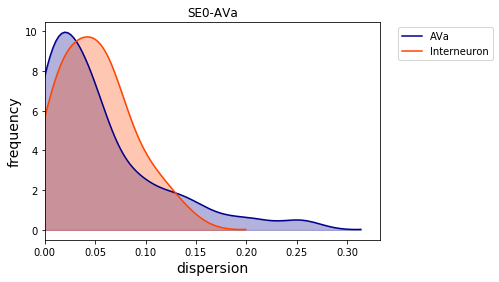

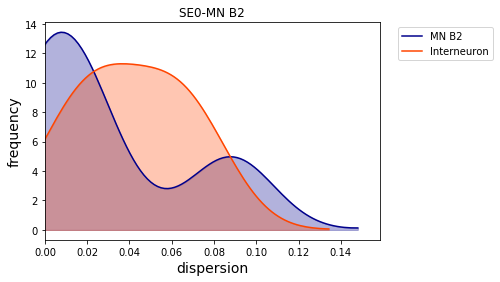

<Figure size 432x288 with 0 Axes>

In [176]:
for s in senlist2:
    freq_plot(csv_se0ens3,s)

This function plots the distribution of a specified sensory type within a target type

In [89]:
cols= [p for p in list(colors.keys())]+mycols
csvs = [csv_ipc,csv_dms,csv_dh,csv_se0p,csv_se0ens3]

def single_sen_freq(df_list,s_type):
    ax=None
    count = 0
    for csv_df in df_list:
        dh_df = csv_df.loc[csv_df['type']==s_type]
        if dh_df.empty==False:
            s = dh_df.avg_disp_source.values.tolist()
            sen = list(set(s))
            tar = dh_df.target.values.tolist()[0]
            n_name = tar[:4].replace(' ','')
            if tar[-1]=='4':
                n_name='SE0ph'

            ax = sns.distplot(sen,hist=False,kde=True,rug=True,rug_kws={'linewidth':1, "height":0.09 },
                                  color = cols[count],label=s_type+'-'+n_name)

            l1 = ax.lines[count]
        # Get the xy data from the lines so that we can shade
            x1 = l1.get_xydata()[:,0]
            y1 = l1.get_xydata()[:,1]

            ax.fill_between(x1,y1, color = cols[count], alpha=0.3)
            count+=1
            ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
            ax.set_xlabel('average dispersion', fontsize=14)
            ax.set_ylabel('frequency', fontsize=14)


    plt.savefig('single-sentype-shade-'+s_type+'.png',bbox_inches='tight',dpi=1000)

    plt.figure()

    return None

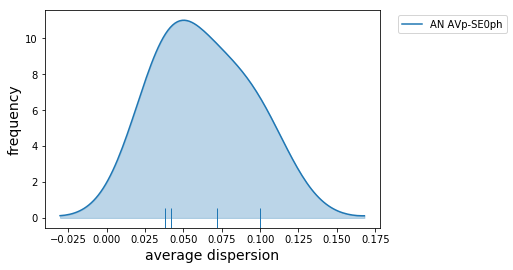

<Figure size 432x288 with 0 Axes>

In [90]:
single_sen_freq(csvs,'AN AVp')

The next function plots the frequency distribution within a target type for EACH target neuron, either for the sensory, or interneuron dispersion

In [85]:
cols= [p for p in list(colors.keys())]+mycols

def freq_plt(tripdf,list_s,inter_ = False):
    ax=None
    count = 0
    for tar in list_s[0]:
        print(tar)
        dh_df = tripdf.loc[tripdf['target']==tar]
        s = dh_df.avg_disp_source.values.tolist()
        sen = list(set(s))
        ints = dh_df.avg_disp_inter.values.tolist()
        inter = list(set(ints))
        
        if inter_ ==True:
            ax = sns.distplot(inter,hist=False,kde=True,rug=True,rug_kws={'linewidth':1.5, "height":0.07 },color = cols[list_s[0].index(tar)],label=tar)
        else:
            ax = sns.distplot(sen,hist=False,kde=True,rug=True,rug_kws={'linewidth':1.5, "height":0.07 },color = cols[list_s[0].index(tar)],label=tar)

        l1 = ax.lines[count]
    # Get the xy data from the lines so that we can shade
        x1 = l1.get_xydata()[:,0]
        y1 = l1.get_xydata()[:,1]

        ax.fill_between(x1,y1, color = cols[count], alpha=0.3)
        count+=1
    ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    ax.set_xlabel('average dispersion', fontsize=14)
    ax.set_ylabel('frequency', fontsize=14)
    name = list_s[0][0][:4]
    n_name = name.replace(' ','')
    if list_s[0][0][-1]=='4':
        n_name='SE0ph'
    
    if inter_==True:
        plt.savefig('dispersion-shade-inter-'+n_name+'.png',bbox_inches='tight',dpi=1000)
    else:
        plt.savefig('dispersion-shade-sen-'+n_name+'.png',bbox_inches='tight',dpi=1000)

    plt.figure()

    return None

DMS 1 left
DMS 1 right
DMS 2 left
DMS 2 right


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:140: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning:

invalid value encountered in double_scalars



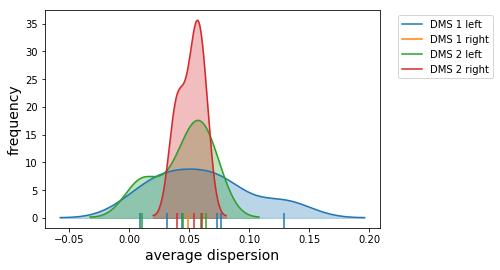

<Figure size 432x288 with 0 Axes>

In [87]:
f1=freq_plt(csv_dms,dmss)

In [ ]:
# f2 = freq_plt(csv_ipc,ipcs)
# f3 = freq_plt(csv_dh,dhs)
# f4 = freq_plt(csv_se0p,se0ps)
# f5 = freq_plt(csv_se0ens2,se0enss_new)

In [ ]:
# fi1 = freq_plt(csv_dms,dmss,True)
# fi2 = freq_plt(csv_ipc,ipcs,True)
# fi3 = freq_plt(csv_dh,dhs,True)
# fi4 = freq_plt(csv_se0p,se0ps,True)
# fi5 = freq_plt(csv_se0ens2,se0enss_new,True)

# Statistical tests- Descriptive

The next functions were used to see if there is a difference between the distance values among various pairs of neurons (left and right targets, among interneurons themselves etc). 

Most of them were not reported in the final version of the thesis, but they were used just as an indication for how to interpret the results from the interneuron/sensory comparison later

Code to see if there is a difference of the distance of the SAME interneuron ACROSS targets; using t test

In [61]:
import itertools
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

def inter_comp(tripdf,sp_in):
    
    dh_df = tripdf.loc[tripdf['interneuron'].str.contains(sp_in)]
    dh_df.all_disp_inter = dh_df.all_disp_inter.apply(literal_eval)
    tarset = list(set(dh_df.target.values.tolist()))
    tarpairs = [list(n) for n in itertools.combinations(tarset,2)]

    all_ints = [dh_df['all_disp_inter'].loc[dh_df['target']==tar].values.tolist()[0] 
                for tar in tarset]
  
    pairs = [list(n) for n in itertools.combinations(all_ints,2)]        
#     count = 0
    for pair in pairs:
        avg1 = sum(pair[0])/len(pair[0])
        avg2 = sum(pair[1])/len(pair[1])

#         stat, p = mannwhitneyu(pair[0],pair[1])
        stat, p = ttest_ind(pair[0], pair[1])
#         count+=1
        print(tarpairs[pairs.index(pair)])
        print('Mean 1: '+str(avg1))
        print('Mean 2: '+str(avg2))
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Same distribution (fail to reject H0)')
        else:
            print('Different distribution (reject H0)')
        print()
#     print(count)

The next cells contain all the input interneurons per target type (with no repetition).

In [86]:
ipc_ins = [n for n in list(set(list(itertools.chain.from_iterable(ipcs[1])))) if 'Sens' not in n]

In [77]:
dms_ins = [n for n in list(set(list(itertools.chain.from_iterable(dmss[1])))) if 'Sens' not in n]

In [78]:
dh_ins = [n for n in list(set(list(itertools.chain.from_iterable(dhs[1])))) if 'Sens' not in n]

In [79]:
se0p_ins = [n for n in list(set(list(itertools.chain.from_iterable(se0ps[1])))) if 'Sens' not in n]

In [80]:
se0ens_ins = [n for n in list(set(list(itertools.chain.from_iterable(se0enss[1])))) if 'Sens' not in n]

Did it for all in the next cell- see newlog August 14 for the results

In [94]:
for neur in se0ens_ins:
    print(neur)
    print()
    inter_comp(csv_se0ens2,neur)
    print()

Bashful_left

1

Bashful_right

1

Pre PMN R right

2
['SE0 L1', 'SE0 L3']
Mean 1: 0.058676500000000006
Mean 2: 0.05691025272727272
Statistics=0.306, p=0.760
Same distribution (fail to reject H0)


SOG into brain contralaterally right - paired with #3622234

1

SEZ-IN-A05-right - paired with #6885133



/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



3
['SE0 L1', 'SE0 L3']
Mean 1: 0.07403662833333333
Mean 2: 0.04033546666666667
Statistics=3.064, p=0.003
Different distribution (reject H0)

['SE0 L1', 'SE0 L2']
Mean 1: 0.07403662833333333
Mean 2: 0.06256006764705878
Statistics=2.152, p=0.032
Different distribution (reject H0)

['SE0 L3', 'SE0 L2']
Mean 1: 0.04033546666666667
Mean 2: 0.06256006764705878
Statistics=-1.938, p=0.054
Same distribution (fail to reject H0)


SEZ-IN-A05-left - paired with #18354200

1

SEZ-IN-03-left

3
['SE0 L1', 'SE0 L3']
Mean 1: 0.017345786666666665
Mean 2: 0.06575321
Statistics=-4.393, p=0.000
Different distribution (reject H0)

['SE0 L1', 'SE0 L2']
Mean 1: 0.017345786666666665
Mean 2: 0.07433870833333332
Statistics=-4.611, p=0.000
Different distribution (reject H0)

['SE0 L3', 'SE0 L2']
Mean 1: 0.06575321
Mean 2: 0.07433870833333332
Statistics=-0.552, p=0.582
Same distribution (fail to reject H0)


SEZ-IN-06-right

3
['SE0 L1', 'SE0 L3']
Mean 1: 0.02879118333333333
Mean 2: 0.0043623
Statistics=nan, p=na

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning:

invalid value encountered in double_scalars




Mean 1: 0.015628466666666667
Mean 2: 0.0250205
Statistics=nan, p=nan
Different distribution (reject H0)

['SE0 R1', 'SE0 L3']
Mean 1: 0.015628466666666667
Mean 2: 0.0075214
Statistics=nan, p=nan
Different distribution (reject H0)

['SE0 L1', 'SE0 L3']
Mean 1: 0.0250205
Mean 2: 0.0075214
Statistics=nan, p=nan
Different distribution (reject H0)


hugin-PC right 1

1

SEZ-X-right

3
['SE0 R1', 'SE0 R3']
Mean 1: 0.06001991428571429
Mean 2: 0.12026298611111111
Statistics=-2.908, p=0.005
Different distribution (reject H0)

['SE0 R1', 'SE0 R2']
Mean 1: 0.06001991428571429
Mean 2: 0.06184151666666667
Statistics=-0.089, p=0.930
Same distribution (fail to reject H0)

['SE0 R3', 'SE0 R2']
Mean 1: 0.12026298611111111
Mean 2: 0.06184151666666667
Statistics=1.403, p=0.168
Same distribution (fail to reject H0)


SEZ-X-left

3
['SE0 L1', 'SE0 L3']
Mean 1: 0.058040166666666664
Mean 2: 0.04381835087719296
Statistics=1.648, p=0.101
Same distribution (fail to reject H0)

['SE0 L1', 'SE0 L2']
Mean 1: 0.05

In [80]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

cols= [p for p in list(colors.keys())]+mycols
csvs = [csv_ipc,csv_dms,csv_dh,csv_se0p,csv_se0ens2]

def single_sen_stats(df_list,s_type):
    ax=None
    count = 0
    vals_ = []
    for csv_df in df_list:
        dh_df = csv_df.loc[csv_df['type']==s_type]
        if dh_df.empty==False:
            s = dh_df.avg_disp_source.values.tolist()
            sen = list(set(s))
            vals_.append(sen)
            tar = dh_df.target.values.tolist()[0]
            n_name = tar[:4].replace(' ','')
            if tar[-1]=='4':
                n_name='SE0ph'
    
    final = list(itertools.chain.from_iterable(vals_))
    stat, p = shapiro(final)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
            

    return len(final)

In [81]:
senlist2

['ACa12', 'ACa', 'AN AVp', 'AVa', 'MN B2', 'MN B3']

In [237]:
single_sen_stats(csvs,'AN AVp')

Statistics=0.900, p=0.431
Sample looks Gaussian (fail to reject H0)


4

In [238]:
for sen in senlist2:
    print(sen)
    print(single_sen_stats(csvs,sen))
    print()


ACa12
Statistics=0.963, p=0.314
Sample looks Gaussian (fail to reject H0)
33

ACa
Statistics=0.853, p=0.001
Sample does not look Gaussian (reject H0)
29

AN AVp
Statistics=0.900, p=0.431
Sample looks Gaussian (fail to reject H0)
4

AVa
Statistics=0.798, p=0.000
Sample does not look Gaussian (reject H0)
52

MN B2
Statistics=0.886, p=0.336
Sample looks Gaussian (fail to reject H0)
5

MN B3
Statistics=0.929, p=0.571
Sample looks Gaussian (fail to reject H0)
6



In [112]:
def single_sen(csv_df,s_type):
    ax = None
    count = 0
    vals_ = []
    dh_df = csv_df.loc[csv_df['type']==s_type]
    if dh_df.empty==True:
        return 'No type'
    else:
        s = dh_df.eu_avg_source.values.tolist()
        slist = list(set([round(el,5) for el in s]))
        vals_.append(sen)
        intern = dh_df.eu_avg_inter.values.tolist()
        interlist = list(set([round(el,5) for el in intern]))
        tar = dh_df.target.values.tolist()[0]
        n_name = tar[:4].replace(' ','')
        if tar[-1]=='4':
            n_name='SE0ph'
        avg1 = round(sum(slist)/len(slist),5)
        avg2 = round(sum(interlist)/len(interlist),5)
    
        stat, p = mannwhitneyu(slist, interlist)
#         stat, p = ttest_ind(slist, interlist)
        print('Sens mean: '+str(avg1))
        print('Inter mean: '+str(avg2))
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Same distribution (fail to reject H0)')
        else:
            print('Different distribution (reject H0)')
    

In [114]:
ecsvs = [csv_eipc,csv_edms,csv_edh,csv_ese0p,csv_ese0ens]

In [115]:
for cs in ecsvs[0:3]:
    for sen in senlist1:
        print(sen)
        print(single_sen(cs,sen))
        print()


ACa12
Left mean: 10704.97975
Right mean: 9902.69402
Statistics=320.000, p=0.264
Same distribution (fail to reject H0)
None

ACa
Left mean: 378.92268
Right mean: 5825.87637
Statistics=0.000, p=0.270
Same distribution (fail to reject H0)
None

AVa
Left mean: 1825.60359
Right mean: 11665.93216
Statistics=0.000, p=0.040
Different distribution (reject H0)
None

ACa12
Left mean: 14460.11224
Right mean: 7176.65157
Statistics=25.000, p=0.014
Different distribution (reject H0)
None

ACa
Left mean: 6908.38292
Right mean: 5562.42076
Statistics=7.000, p=0.148
Same distribution (fail to reject H0)
None

AVa
No type

ACa12
No type

ACa
Left mean: 5740.33012
Right mean: 12997.34586
Statistics=52.000, p=0.005
Different distribution (reject H0)
None

AVa
No type



In [116]:
for cs in ecsvs[3:]:
    for sen in senlist2:
        print(sen)
        print(single_sen(cs,sen))
        print()


ACa12
No type

ACa
No type

AN AVp
Left mean: 5097.41592
Right mean: 3240.18874
Statistics=18.000, p=0.125
Same distribution (fail to reject H0)
None

AVa
Left mean: 4438.52535
Right mean: 3736.44336
Statistics=19.000, p=0.163
Same distribution (fail to reject H0)
None

MN B2
Left mean: 4136.95541
Right mean: 3324.42007
Statistics=0.000, p=0.500
Same distribution (fail to reject H0)
None

MN B3
Left mean: 3347.20941
Right mean: 5536.44133
Statistics=25.000, p=0.118
Same distribution (fail to reject H0)
None

ACa12
Left mean: 3185.6752
Right mean: 3344.86449
Statistics=1.000, p=0.500
Same distribution (fail to reject H0)
None

ACa
Left mean: 5265.20488
Right mean: 5117.66638
Statistics=62.000, p=0.244
Same distribution (fail to reject H0)
None

AN AVp
No type

AVa
Left mean: 3362.62948
Right mean: 4289.09288
Statistics=617.000, p=0.028
Different distribution (reject H0)
None

MN B2
Left mean: 1919.999
Right mean: 3488.82098
Statistics=15.000, p=0.117
Same distribution (fail to reject H0

In [63]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

cols= [p for p in list(colors.keys())]+mycols
csvs = [csv_ipc,csv_dms,csv_dh,csv_se0p,csv_se0ens2]

def tar_stats(tripdf,sp_tar,sn = True):
    ax = None
    dh_df = tripdf.loc[tripdf['target'].str.contains(sp_tar)]
    if sn ==True:
        s = dh_df.avg_disp_source.values.tolist()
        fin = list(set(s))
        tar = dh_df.target.values.tolist()[0]
        n_name = tar[:4].replace(' ','')
        if tar[-1]=='4':
            n_name='SE0ph'
    else:
        s = dh_df.avg_disp_inter.values.tolist()
        fin = list(set(s))
        tar = dh_df.target.values.tolist()[0]
        n_name = tar[:4].replace(' ','')
        if tar[-1]=='4':
            n_name='SE0ph'
    q = pd.Series(fin).quantile([0.25,0.5,0.75])
    print(q[0.25])
    stat, p = shapiro(fin)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print(n_name+'-'+sp_tar+' '+'Sample looks Gaussian (fail to reject H0)')
    else:
        print(n_name+'-'+sp_tar+' '+'Sample does not look Gaussian (reject H0)')
            

    return len(fin)

NameError: name 'colors' is not defined

In [99]:
tar_stats(csv_dh,'right')

0.0041205
Statistics=0.708, p=0.012
DH44-right Sample does not look Gaussian (reject H0)


5

In [106]:
for i in range(0,len(csvs[0:3])):
    print(tars[i])
    tar_stats(csvs[i],'right',False)
    print()

IPC
0.0152553
Statistics=0.908, p=0.303
IPC-right Sample looks Gaussian (fail to reject H0)

DMS
0.0021832
Statistics=0.903, p=0.396
DMS-right Sample looks Gaussian (fail to reject H0)

DH44
0.05184069999999999
Statistics=0.817, p=0.110
DH44-right Sample looks Gaussian (fail to reject H0)



In [104]:
for i in range(len(csvs[3:])+1,len(csvs)):
    print(tars[i])
    tar_stats(csvs[i],'R',False)
    print()

Se0ph
0.014052849999999999
Statistics=0.905, p=0.213
SE0ph-R Sample looks Gaussian (fail to reject H0)

Se0ens
0.022858
Statistics=0.937, p=0.233
SE0-R Sample looks Gaussian (fail to reject H0)



In [127]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

cols= [p for p in list(colors.keys())]+mycols
csvs = [csv_ipc,csv_dms,csv_dh,csv_se0p,csv_se0ens2]

def single_tar_stats(tripdf,sp_tar,sn = True):
    ax = None
    dh_df = tripdf.loc[tripdf['target']==sp_tar]
    if sn ==True:
        s = dh_df.avg_disp_source.values.tolist()
        fin = list(set(s))
        tar = dh_df.target.values.tolist()[0]
        n_name = tar[:4].replace(' ','')
        if tar[-1]=='4':
            n_name='SE0ph'
    else:
        s = dh_df.avg_disp_inter.values.tolist()
        fin = list(set(s))
        tar = dh_df.target.values.tolist()[0]
        n_name = tar[:4].replace(' ','')
        if tar[-1]=='4':
            n_name='SE0ph'
    q = pd.Series(fin).quantile([0.25,0.5,0.75])
    if len(fin)<3:
        print('Not enough data')
        pass
    else:
        stat, p = shapiro(fin)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print(n_name+'-'+sp_tar+' '+'Sample looks Gaussian (fail to reject H0)')
        else:
            print(n_name+'-'+sp_tar+' '+'Sample does not look Gaussian (reject H0)')
            

        return len(fin)

Comparison between left and right within one csv_x; The other arguments should be: the second argument sn = True for sensory results and sn = False for interneurons; the third argument mns = True for mNSCs and mns = False for the se0s

In [86]:
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
def mann_test(tripdf,sn=True, mns = True):
    
    targets = list(set(tripdf['target'].values.tolist()))
    if mns ==True:
        dh_df1 = tripdf.loc[tripdf['target'].str.contains('left')]
        dh_df2 = tripdf.loc[tripdf['target'].str.contains('right')]
    else:
        dh_df1 = tripdf.loc[tripdf['target'].str.contains('L')]
        dh_df2 = tripdf.loc[tripdf['target'].str.contains('R')]
    if sn == True:
        s1 = dh_df1.avg_disp_source.values.tolist()
        fin1 = list(set(s1))
        avg1 = round(sum(fin1)/len(fin1),5)
        s2 = dh_df2.avg_disp_source.values.tolist()
        fin2 = list(set(s2))
        avg2 = round(sum(fin2)/len(fin2),5)
        tar = [dh_df1.target.values.tolist()[0],dh_df2.target.values.tolist()[0]]
    else:
        s1 = dh_df1.avg_disp_inter.values.tolist()
        fin1 = list(set(s1))
        avg1 = round(sum(fin1)/len(fin1),5)

        s2 = dh_df2.avg_disp_inter.values.tolist()
        fin2 = list(set(s2))
        avg2 = round(sum(fin2)/len(fin2),5)

        tar = [dh_df1.target.values.tolist()[0],dh_df2.target.values.tolist()[0]]
        # compare samples
#     stat, p = mannwhitneyu(fin1, fin2)
    stat, p = ttest_ind(fin1, fin2)
    print('Left mean: '+str(avg1))
    print('Right mean: '+str(avg2))
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

In [294]:
mann_test(csv_se0p,True,False)

Left mean: 0.02966
Right mean: 0.05386
Statistics=-1.871, p=0.080
Same distribution (fail to reject H0)


In [220]:
lista = [1,2,3,4,5]
[n for n in zip(lista[::1], lista[1::1])]

[(1, 2), (2, 3), (3, 4), (4, 5)]

In [87]:
def mann_all_dif(tripdf):
    
#     targets = list(set(tripdf['target'].values.tolist()))
    dh_df = tripdf.copy()
    a = dh_df.avg_disp_inter.values.tolist()
    interlist = list(set([round(el,5) for el in a]))
#     interlist = list(itertools.chain.from_iterable(new_a))
    
    b = dh_df.avg_disp_source.values.tolist()
    slist = list(set([round(el,5) for el in b]))

    avg1 = round(sum(slist)/len(slist),5)
    avg2 = round(sum(interlist)/len(interlist),5)
#     tar = [dh_df1.target.values.tolist()[0],dh_df2.target.values.tolist()[0]]

        # compare samples
    stat, p = mannwhitneyu(slist, interlist)
#     stat, p = ttest_ind(slist, interlist)
    print('Sens mean: '+str(avg1))
    print('Inter mean: '+str(avg2))
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

In [88]:
mann_all_dif(csv_ipc)

Sens mean: 0.04251
Inter mean: 0.04935
Statistics=419.000, p=0.226
Same distribution (fail to reject H0)


In [89]:
mann_all_dif(csv_dms)

Sens mean: 0.05341
Inter mean: 0.05169
Statistics=93.000, p=0.308
Same distribution (fail to reject H0)


In [90]:
mann_all_dif(csv_dh)

Sens mean: 0.02882
Inter mean: 0.06027
Statistics=57.000, p=0.009
Different distribution (reject H0)


In [91]:
mann_all_dif(csv_se0p)

Sens mean: 0.04311
Inter mean: 0.05424
Statistics=184.000, p=0.450
Same distribution (fail to reject H0)


In [92]:
mann_all_dif(csv_se0ens2)

Sens mean: 0.0525
Inter mean: 0.04878
Statistics=1374.000, p=0.208
Same distribution (fail to reject H0)


Significance tests to compare interneurons and sensory neurons for EACH target neuron

In [64]:
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from ast import literal_eval
import math
import itertools

def mann_tar_dif(tripdf,tar):
    
#     targets = list(set(tripdf['target'].values.tolist()))
    dh_df = tripdf.loc[tripdf['target']==tar]
    a = dh_df.avg_disp_inter.values.tolist()
    interlist = list(set([round(el,5) for el in a]))
#     interlist = list(itertools.chain.from_iterable(new_a))
    
    b = dh_df.avg_disp_source.values.tolist()
    slist = list(set([round(el,5) for el in b]))

    avg1 = round(sum(slist)/len(slist),5)
    avg2 = round(sum(interlist)/len(interlist),5)
#     tar = [dh_df1.target.values.tolist()[0],dh_df2.target.values.tolist()[0]]

        # compare samples
#     stat, p = mannwhitneyu(fin1, fin2)
    stat, p = ttest_ind(slist, interlist)
    print('Sens mean: '+str(avg1))
    print('Inter mean: '+str(avg2))
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

In [96]:
for el in ipcs[0]:
    print(el)
    mann_tar_dif(csv_ipc,el)
    print()

IPC 2 left
Sens mean: 0.06246
Inter mean: 0.03476
Statistics=1.084, p=0.320
Same distribution (fail to reject H0)

IPC 7 left
Sens mean: 0.01355
Inter mean: 0.04874
Statistics=nan, p=nan
Different distribution (reject H0)

IPC 3 right
Sens mean: 0.01612
Inter mean: 0.01987
Statistics=-0.207, p=0.844
Same distribution (fail to reject H0)

IPC 4 left
Sens mean: 0.05983
Inter mean: 0.03524
Statistics=0.725, p=0.501
Same distribution (fail to reject H0)

IPC 1 left
Sens mean: 0.04234
Inter mean: 0.06844
Statistics=-1.066, p=0.328
Same distribution (fail to reject H0)

IPC 3 left
Sens mean: 0.08633
Inter mean: 0.0868
Statistics=-0.014, p=0.989
Same distribution (fail to reject H0)

IPC 4 right
Sens mean: 0.01958
Inter mean: 0.04126
Statistics=nan, p=nan
Different distribution (reject H0)

IPC 5 left
Sens mean: 0.04963
Inter mean: 0.03881
Statistics=0.352, p=0.748
Same distribution (fail to reject H0)

IPC 1 right
Sens mean: 0.03757
Inter mean: 0.11694
Statistics=nan, p=nan
Different distrib

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning:

invalid value encountered in double_scalars



In [97]:
for el in dmss[0]:
    print(el)
    mann_tar_dif(csv_dms,el)
    print()

DMS 1 left
Sens mean: 0.06067
Inter mean: 0.08288
Statistics=-0.879, p=0.400
Same distribution (fail to reject H0)

DMS 1 right
Sens mean: 0.04861
Inter mean: 0.0027
Statistics=nan, p=nan
Different distribution (reject H0)

DMS 2 left
Sens mean: 0.04516
Inter mean: 0.04455
Statistics=0.028, p=0.979
Same distribution (fail to reject H0)

DMS 2 right
Sens mean: 0.0515
Inter mean: 0.00404
Statistics=5.812, p=0.010
Different distribution (reject H0)



/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning:

invalid value encountered in double_scalars



In [98]:
for el in dhs[0]:
    print(el)
    mann_tar_dif(csv_dh,el)
    print()

DH44 1 left
Sens mean: 0.04383
Inter mean: 0.05786
Statistics=-0.536, p=0.607
Same distribution (fail to reject H0)

DH44 3 left
Sens mean: 0.02748
Inter mean: 0.04762
Statistics=-0.575, p=0.596
Same distribution (fail to reject H0)

DH44 2 left
Sens mean: 0.03571
Inter mean: 0.04558
Statistics=-1.934, p=0.149
Same distribution (fail to reject H0)

DH44 2 right
Sens mean: 0.00413
Inter mean: 0.11632
Statistics=-2.334, p=0.102
Same distribution (fail to reject H0)

DH44 1 right
Sens mean: 0.02943
Inter mean: 0.05031
Statistics=nan, p=nan
Different distribution (reject H0)

DH44 3 right
Sens mean: 0.03106
Inter mean: 0.07723
Statistics=nan, p=nan
Different distribution (reject H0)



/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning:

invalid value encountered in double_scalars



In [99]:
for el in se0ps[0]:
    print(el)
    mann_tar_dif(csv_se0p,el)
    print()

SE0 R4
Sens mean: 0.05386
Inter mean: 0.06001
Statistics=-0.317, p=0.754
Same distribution (fail to reject H0)

SE0 L4
Sens mean: 0.02966
Inter mean: 0.0479
Statistics=-0.968, p=0.347
Same distribution (fail to reject H0)



In [101]:
for el in se0enss[0]:
    print(el)
    mann_tar_dif(csv_se0ens2,el)
    print()

SE0 R3
Sens mean: 0.09131
Inter mean: 0.09666
Statistics=-0.098, p=0.924
Same distribution (fail to reject H0)

SE0 L1
Sens mean: 0.03795
Inter mean: 0.04163
Statistics=-0.261, p=0.796
Same distribution (fail to reject H0)

SE0 L3
Sens mean: 0.03896
Inter mean: 0.03448
Statistics=0.348, p=0.731
Same distribution (fail to reject H0)

SE0 L2
Sens mean: 0.04034
Inter mean: 0.04658
Statistics=-0.369, p=0.719
Same distribution (fail to reject H0)

SE0 R2
Sens mean: 0.0711
Inter mean: 0.05482
Statistics=0.512, p=0.619
Same distribution (fail to reject H0)

SE0 R1
Sens mean: 0.04221
Inter mean: 0.06113
Statistics=-0.925, p=0.368
Same distribution (fail to reject H0)



In [96]:
for el in ipcs[0]:
    print(el)
    mann_tar_dif(csv_ipc,el)
    print()

IPC 2 left
Sens mean: 0.06246
Inter mean: 0.03476
Statistics=1.084, p=0.320
Same distribution (fail to reject H0)

IPC 7 left
Sens mean: 0.01355
Inter mean: 0.04874
Statistics=nan, p=nan
Different distribution (reject H0)

IPC 3 right
Sens mean: 0.01612
Inter mean: 0.01987
Statistics=-0.207, p=0.844
Same distribution (fail to reject H0)

IPC 4 left
Sens mean: 0.05983
Inter mean: 0.03524
Statistics=0.725, p=0.501
Same distribution (fail to reject H0)

IPC 1 left
Sens mean: 0.04234
Inter mean: 0.06844
Statistics=-1.066, p=0.328
Same distribution (fail to reject H0)

IPC 3 left
Sens mean: 0.08633
Inter mean: 0.0868
Statistics=-0.014, p=0.989
Same distribution (fail to reject H0)

IPC 4 right
Sens mean: 0.01958
Inter mean: 0.04126
Statistics=nan, p=nan
Different distribution (reject H0)

IPC 5 left
Sens mean: 0.04963
Inter mean: 0.03881
Statistics=0.352, p=0.748
Same distribution (fail to reject H0)

IPC 1 right
Sens mean: 0.03757
Inter mean: 0.11694
Statistics=nan, p=nan
Different distrib

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning:

invalid value encountered in double_scalars



In [97]:
for el in dmss[0]:
    print(el)
    mann_tar_dif(csv_dms,el)
    print()

DMS 1 left
Sens mean: 0.06067
Inter mean: 0.08288
Statistics=-0.879, p=0.400
Same distribution (fail to reject H0)

DMS 1 right
Sens mean: 0.04861
Inter mean: 0.0027
Statistics=nan, p=nan
Different distribution (reject H0)

DMS 2 left
Sens mean: 0.04516
Inter mean: 0.04455
Statistics=0.028, p=0.979
Same distribution (fail to reject H0)

DMS 2 right
Sens mean: 0.0515
Inter mean: 0.00404
Statistics=5.812, p=0.010
Different distribution (reject H0)



/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning:

invalid value encountered in double_scalars



In [98]:
for el in dhs[0]:
    print(el)
    mann_tar_dif(csv_dh,el)
    print()

DH44 1 left
Sens mean: 0.04383
Inter mean: 0.05786
Statistics=-0.536, p=0.607
Same distribution (fail to reject H0)

DH44 3 left
Sens mean: 0.02748
Inter mean: 0.04762
Statistics=-0.575, p=0.596
Same distribution (fail to reject H0)

DH44 2 left
Sens mean: 0.03571
Inter mean: 0.04558
Statistics=-1.934, p=0.149
Same distribution (fail to reject H0)

DH44 2 right
Sens mean: 0.00413
Inter mean: 0.11632
Statistics=-2.334, p=0.102
Same distribution (fail to reject H0)

DH44 1 right
Sens mean: 0.02943
Inter mean: 0.05031
Statistics=nan, p=nan
Different distribution (reject H0)

DH44 3 right
Sens mean: 0.03106
Inter mean: 0.07723
Statistics=nan, p=nan
Different distribution (reject H0)



/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning:

invalid value encountered in double_scalars



In [99]:
for el in se0ps[0]:
    print(el)
    mann_tar_dif(csv_se0p,el)
    print()

SE0 R4
Sens mean: 0.05386
Inter mean: 0.06001
Statistics=-0.317, p=0.754
Same distribution (fail to reject H0)

SE0 L4
Sens mean: 0.02966
Inter mean: 0.0479
Statistics=-0.968, p=0.347
Same distribution (fail to reject H0)



In [101]:
for el in se0enss[0]:
    print(el)
    mann_tar_dif(csv_se0ens2,el)
    print()

SE0 R3
Sens mean: 0.09131
Inter mean: 0.09666
Statistics=-0.098, p=0.924
Same distribution (fail to reject H0)

SE0 L1
Sens mean: 0.03795
Inter mean: 0.04163
Statistics=-0.261, p=0.796
Same distribution (fail to reject H0)

SE0 L3
Sens mean: 0.03896
Inter mean: 0.03448
Statistics=0.348, p=0.731
Same distribution (fail to reject H0)

SE0 L2
Sens mean: 0.04034
Inter mean: 0.04658
Statistics=-0.369, p=0.719
Same distribution (fail to reject H0)

SE0 R2
Sens mean: 0.0711
Inter mean: 0.05482
Statistics=0.512, p=0.619
Same distribution (fail to reject H0)

SE0 R1
Sens mean: 0.04221
Inter mean: 0.06113
Statistics=-0.925, p=0.368
Same distribution (fail to reject H0)



Comparison BETWEEN target neurons in terms of the dispersion of their connectors

In [65]:
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

def single_mann_test(tripdf,side, sn=True):
    
    dh_df = tripdf.loc[tripdf['target'].str.contains(side)]
    targets = list(set(dh_df['target'].values.tolist()))
    tarpairs = [list(n) for n in itertools.combinations(targets,2)]
    all_ = []
    for t in targets:

        n_df = dh_df.loc[dh_df['target']==t]
        if sn == True:

            s = n_df.avg_disp_source.values.tolist()
        else:
            s = n_df.avg_disp_inter.values.tolist()
        fin = list(set(s))
        avg = round(sum(fin)/len(fin),5)
        all_.append(fin)
    pairs = [list(n) for n in itertools.combinations(all_,2)]
#     ps = list(itertools.chain.from_iterable(pairs))
        # compare samples
    for pair in pairs:
        avg1 = sum(pair[0])/len(pair[0])
        avg2 = sum(pair[1])/len(pair[1])

        stat, p = mannwhitneyu(pair[0],pair[1])
#         stat, p = ttest_ind(pair[0], pair[1])
        print(tarpairs[pairs.index(pair)])
        print('Left mean: '+str(avg1))
        print('Right mean: '+str(avg2))
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Same distribution (fail to reject H0)')
        else:
            print('Different distribution (reject H0)')
        print()

In [306]:
single_mann_test(csv_ipc,'right')

['IPC 2 right', 'IPC 4 right']
Left mean: 0.0096844
Right mean: 0.0195821
Statistics=nan, p=nan
Different distribution (reject H0)

['IPC 2 right', 'IPC 6 right']
Left mean: 0.0096844
Right mean: 0.03159885
Statistics=nan, p=nan
Different distribution (reject H0)

['IPC 2 right', 'IPC 3 right']
Left mean: 0.0096844
Right mean: 0.0161191
Statistics=nan, p=nan
Different distribution (reject H0)

['IPC 2 right', 'IPC 1 right']
Left mean: 0.0096844
Right mean: 0.0375758
Statistics=nan, p=nan
Different distribution (reject H0)

['IPC 4 right', 'IPC 6 right']
Left mean: 0.0195821
Right mean: 0.03159885
Statistics=-0.514, p=0.658
Same distribution (fail to reject H0)

['IPC 4 right', 'IPC 3 right']
Left mean: 0.0195821
Right mean: 0.0161191
Statistics=0.166, p=0.878
Same distribution (fail to reject H0)

['IPC 4 right', 'IPC 1 right']
Left mean: 0.0195821
Right mean: 0.0375758
Statistics=-0.646, p=0.584
Same distribution (fail to reject H0)

['IPC 6 right', 'IPC 3 right']
Left mean: 0.0315988

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning:

invalid value encountered in double_scalars



In [308]:
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

def eu_single_mann_test(tripdf,side, sn=True):
    
    dh_df = tripdf.loc[tripdf['target'].str.contains(side)]
    targets = list(set(dh_df['target'].values.tolist()))
    tarpairs = [list(n) for n in itertools.combinations(targets,2)]
    all_ = []
    for t in targets:

        n_df = dh_df.loc[dh_df['target']==t]
        if sn == True:

            s = n_df.eu_avg_source.values.tolist()
        else:
            s = n_df.eu_avg_inter.values.tolist()
        fin = list(set(s))
        avg = round(sum(fin)/len(fin),5)
        all_.append(fin)
    pairs = [list(n) for n in itertools.combinations(all_,2)]
#     ps = list(itertools.chain.from_iterable(pairs))
        # compare samples
    for pair in pairs:
        avg1 = sum(pair[0])/len(pair[0])
        avg2 = sum(pair[1])/len(pair[1])

        stat, p = mannwhitneyu(pair[0],pair[1])
#         stat, p = ttest_ind(pair[0], pair[1])
        print(tarpairs[pairs.index(pair)])
        print('Left mean: '+str(avg1))
        print('Right mean: '+str(avg2))
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Same distribution (fail to reject H0)')
        else:
            print('Different distribution (reject H0)')
        print()

In [327]:
single_mann_test(csv_ese0ens,'R',True)

['SE0 R1', 'SE0 R3']
Left mean: 4426.362552222222
Right mean: 3626.31311
Statistics=45.000, p=0.484
Same distribution (fail to reject H0)

['SE0 R1', 'SE0 R2']
Left mean: 4426.362552222222
Right mean: 5388.289452857142
Statistics=31.000, p=0.500
Same distribution (fail to reject H0)

['SE0 R3', 'SE0 R2']
Left mean: 3626.31311
Right mean: 5388.289452857142
Statistics=34.000, p=0.481
Same distribution (fail to reject H0)



In [256]:
tars

['IPC', 'DMS', 'DH44', 'Se0ph', 'Se0ens']

In [268]:
stat_lista = [ipc_stats,dms_stats,dh_stats,se0p_stats,se0ens_stats]
all_stats = pd.concat(stat_lista,axis=1)
all_stats.columns=tars
export_csv = all_stats.to_csv(r'/home/ben/disp_inter_stats.csv')
all_stats

,IPC,DMS,DH44,Se0ph,Se0ens
count,44.000000,33.000000,24.000000,56.000000,133.000000
mean,0.050834,0.044709,0.065128,0.049989,0.052757
std,0.037731,0.043606,0.051709,0.045071,0.036422
min,0.000650,0.001668,0.010814,0.000895,0.002147
25%,0.019844,0.006423,0.031812,0.007960,0.023953
50%,0.042781,0.018319,0.052392,0.030105,0.056540
75%,0.067606,0.059744,0.069764,0.070449,0.073297
max,0.143335,0.131680,0.180804,0.169069,0.139424


The next function plots the frequency distribution of the average dispersion values for all sensory (default) or all interneurons (inter_=True) for each target neuron of the same type (e.g. DMS, SE0 enteric etc.)

In [34]:
csv_dms.describe()

,Unnamed: 0,avg_disp_source,avg_disp_inter,diff (sens-int)
count,33.00000,33.000000,33.000000,33.000000
mean,16.00000,0.056342,0.044709,-0.011632
std,9.66954,0.031331,0.043606,0.052466
min,0.00000,0.009350,0.001668,-0.110911
25%,8.00000,0.039812,0.006423,-0.052245
50%,16.00000,0.060061,0.018319,-0.025766
75%,24.00000,0.073190,0.059744,0.034189
max,32.00000,0.129230,0.131680,0.098030


# Statistical tests- Comparison interneurons vs. sensories

To test the significance of the difference between the dispersion of sensory and interneurons, a t-test was performed, or a Mann-Whitney if the assumptions did not hold.

# 1) Per triple

In [36]:
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats import bartlett

from ast import literal_eval
import math
import itertools

def sin_mann_test(tripdf,tar,tp):
    
#     targets = list(set(tripdf['target'].values.tolist()))
    dh_df0 = tripdf.loc[tripdf['target']==tar]
    dh_df = dh_df0.loc[dh_df0['type']==tp]

    if dh_df.empty==True:
        print('No input of this type')
        return [0]
    else:
        dh_df.all_disp_inter = dh_df.all_disp_inter.apply(literal_eval)
        dh_df.all_disp_source = dh_df.all_disp_source.apply(literal_eval)
        interlist = dh_df.all_disp_inter.values.tolist()
        slist = dh_df.all_disp_source.values.tolist()

#         diflist = dh_df['diff (sens-inter)'].values.tolist()
        
        pairs = [n for n in zip(slist,interlist)]
        dval = {}
        alpha = 0.05
        for pair in pairs:
#         print(pairs)
        
            avg1 = round(sum(pair[0])/len(pair[0]),7)
            avg2 = round(sum(pair[1])/len(pair[1]),7)
            dif = round(avg2-avg1,4)


            if len(pair[0])>=3 and len(pair[1])>=3:
                shap1, t1 = shapiro(pair[0])
                shap2, t2 = shapiro(pair[1])
                if t1 > alpha and t2 > alpha:
                    lev_, lp = bartlett(pair[0], pair[1])
                    if lp > alpha:
                        stat, p = ttest_ind(pair[0], pair[1])
                    else:
                        stat , p = mannwhitneyu(pair[0], pair[1])
                else:
                    stat , p = mannwhitneyu(pair[0], pair[1])

            else:
                alpha = 0.05
                stat, p = mannwhitneyu(pair[0],pair[1])
                
            sig = False
            if p > alpha:
                pass
#                 print('Same distribution (fail to reject H0)')
            else:
                sig = True
#                 print('Different distribution (reject H0)')
            dval[dif] = sig
#             print()

#         # interpret
#         sig = False
#        
#             sig = True
        
#         print(dval)
        return dval

The next function makes a table containing the INTER - SENS difference in dispersion for each target neuron (columns) for each sensory type (rows)

In [37]:
senlist1 =['ACa12', 'ACa','AVa']
senlist2 = ['ACa12', 'ACa', 'AVa', 'AN AVp', 'MN B2', 'MN B3']
def sin_tar_table(tlist,tdf):
    lista = []
    dval = {}
    sum_dval = {}
    nlista = []
    if 'SE' not in tlist[0]:

        for s in senlist1:
            
            lista0 = []
            nlista0 = []
            for el in tlist:
                res = sin_mann_test(tdf,el,s)
                if type(res)!=list:
                    dval.update(res)
                    lista0.append(list(res.keys()))
                    avg_ = sum(list(res.keys()))/len(list(res.keys()))
                    sigs = [dval[k] for k in list(res.keys())]
                    sig = all(sigs)
#                     print(avg_)
                    sum_dval[avg_] = sig
                    nlista0.append(avg_)
                else:
                    nlista0.append(0)
                
                    
            nlista.append(nlista0)

        data = pd.DataFrame(nlista,columns=tlist,index=senlist1)
    else:
       
        for s in senlist2:
            
            lista0 = []
            nlista0 = []
            for el in tlist:
                res = sin_mann_test(tdf,el,s)
                if type(res)!=list:
                    dval.update(res)
                    lista0.append(list(res.keys()))
                    avg_ = sum(list(res.keys()))/len(list(res.keys()))
#                     print(avg)
                    sigs = [dval[k] for k in list(res.keys())]
                    sig = all(sigs)
                    sum_dval[avg_] = sig
                    nlista0.append(avg_)
                else:
                    nlista0.append(0)
                    
                    
            nlista.append(nlista0)
        data = pd.DataFrame(nlista, columns=tlist, index = senlist2 )
    trans = data.transpose()
    
    if 'SE' not in tlist[0]:
        vals = [[n for n in trans[s].values.tolist() if n!=0] for s in senlist1]
    else:
        vals = [[n for n in trans[s].values.tolist() if n!=0] for s in senlist2]
    
    dlist2 = [[sum_dval[v] for v in vals[i]] for i in range(0,len(vals))]
    sigs2 = [all(val) for val in dlist2]
    avgs = []
    for v in vals:
        if len(v)!=0:
            avg = round(sum(v)/len(v),4)
        else:
            avg = 0
        avgs.append(avg)
#     avgs = [sum(v)/len(v) for v in vals if len(v)!=0]
    newd = {key:value for (key,value) in zip(avgs,sigs2)}
#     print(newd)
    sum_dval.update(newd)
    data['avg'] = avgs

    
    return [data,sum_dval]  

The color() function is used to show the significant results in bold

In [38]:
trip_ipc = sin_tar_table(ipcs[0],csv_ipc)
def color(val):
    if val!=0:
        if trip_ipc[1][val]==True:

            return 'font-weight: bold'
        else:
            return ''
    else:
        return ''
# trip_ipc[0].to_csv (r'/home/ben/all-csvs/new-csvs/disp-ipc-new-triple.csv',float_format='%.4f')

trip_ipc[0].style.applymap(color)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type


,IPC 2 left,IPC 7 left,IPC 3 right,IPC 4 left,IPC 1 left,IPC 3 left,IPC 4 right,IPC 5 left,IPC 1 right,IPC 6 right,IPC 2 right,IPC 6 left,avg
ACa12,-0.0404,0.0352,0.00768,-0.01768,0.0200714,0.0164,0.0217,-0.024725,0.07935,-0.0156,0,-0.0037,0.0071
ACa,0,0,0,0,0,0,0,0,0,0,0,0.02995,0.03
AVa,0.0188,0,0,0,0,0,0,0,0,0.0979,0.0535,0,0.0567


In [39]:
trip_dms = sin_tar_table(dmss[0],csv_dms)
def color(val):
    if val!=0:
        if trip_dms[1][val]==True:

            return 'font-weight: bold'
        else:
            return ''
    else:
        return ''
# trip_dms[0].to_csv (r'/home/ben/all-csvs/new-csvs/disp-dms-new-triple.csv',float_format='%.4f')
trip_dms[0].style.applymap(color)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



No input of this type
No input of this type
No input of this type
No input of this type
No input of this type


,DMS 1 left,DMS 1 right,DMS 2 left,DMS 2 right,avg
ACa12,-0.00276923,-0.0459,-0.01332,-0.0544,-0.0291
ACa,0.0181667,0,0.0022,-0.0428,-0.0075
AVa,0,0,0,0,0


In [40]:
trip_dh = sin_tar_table(dhs[0],csv_dh)
def color(val):
    if val!=0:
        if trip_dh[1][val]==True:

            return 'font-weight: bold'
        else:
            return ''
    else:
        return ''
# trip_dh[0].to_csv (r'/home/ben/all-csvs/new-csvs/disp-dh44-new-triple.csv',float_format='%.4f')
trip_dh[0].style.applymap(color)


No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type


,DH44 1 left,DH44 3 left,DH44 2 left,DH44 2 right,DH44 1 right,DH44 3 right,avg
ACa12,0,0,0,0,0,0,0
ACa,0.0203444,0.01638,0.011725,0.1337,0.02085,0.0462,0.0415
AVa,0,0,0,0,0,0,0


In [41]:
trip_se0ph = sin_tar_table(se0ps[0],csv_se0p)
def color(val):
    if val!=0:
        if trip_se0ph[1][val]==True:

            return 'font-weight: bold'
        else:
            return ''
    else:
        return ''
# trip_se0ph[0].to_csv (r'/home/ben/all-csvs/new-csvs/disp-se0ph-new-triple.csv',float_format='%.4f')
trip_se0ph[0].style.applymap(color)


No input of this type
No input of this type
No input of this type
No input of this type


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



No input of this type


,SE0 R4,SE0 L4,avg
ACa12,0,0,0
ACa,0,0,0
AVa,-0.00288571,0.0315,0.0143
AN AVp,-0.005775,-0.0235667,-0.0147
MN B2,0,-0.0189,-0.0189
MN B3,0.0094625,0.0242,0.0168


In [42]:
trip_se0ens = sin_tar_table(se0enss[0],csv_se0ens3)
def color(val):
    if val!=0:
        if trip_se0ens[1][val]==True:

            return 'font-weight: bold'
        else:
            return ''
    else:
        return ''
# trip_se0ens[0].to_csv (r'/home/ben/all-csvs/new-csvs/disp-se0ens-new-triple.csv',float_format='%.4f')
trip_se0ens[0].style.applymap(color)


No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy




No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type


,SE0 R3,SE0 L1,SE0 L2,SE0 L3,SE0 R1,SE0 R2,avg
ACa12,0,0,0,0,0,-0.0618333,-0.0618
ACa,0,0.02643,0,-0.08346,0.04107,0,-0.0053
AVa,0.0356,0.00285,0.00407273,0.00770909,-0.00250667,-0.042725,0.0008
AN AVp,0,0,0,0,0,0,0
MN B2,0,0.03235,-0.032625,0.0091,0,0.0482,0.0143
MN B3,0,0,0,0,0,0,0


# 2) Per target

In [52]:
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from ast import literal_eval
import math
import itertools
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import bartlett



def tar_mann_test(tripdf,tar,tp,eu = False):
    
#     targets = list(set(tripdf['target'].values.tolist()))
    dh_df0 = tripdf.loc[tripdf['target']==tar]
    dh_df = dh_df0.loc[dh_df0['type']==tp]

    if dh_df.empty==True:
        print('No input of this type')
        return [0]
    else:
        if eu == True:
            interlist = list(set(dh_df.eu_avg_inter.values.tolist()))
            slist = list(set(dh_df.eu_avg_source.values.tolist()))
        else:
            interlist = list(set(dh_df.avg_disp_inter.values.tolist()))
            slist = list(set(dh_df.avg_disp_source.values.tolist()))
        avg1 = round(sum(slist)/len(slist),4)
        avg2 = round(sum(interlist)/len(interlist),4)
        alpha = 0.05
        if len(slist)>=3 and len(interlist)>=3:
            
            shap1, t1 = shapiro(slist)
            shap2, t2 = shapiro(interlist)
            if t1 > alpha and t2 > alpha:
                lev_, lp = bartlett(slist,interlist)
                if lp > alpha:
                    stat, p = ttest_ind(slist, interlist)
                else:
                    stat , p = mannwhitneyu(slist,interlist)
            else:
                stat, p = mannwhitneyu(slist, interlist)
        else:
            alpha = 0.05
            stat, p = mannwhitneyu(slist,interlist)

        # interpret
        sig = False
        alpha = 0.05
        if p > alpha:
            pass
#             print('Same distribution (fail to reject H0)')
        else:
#             print('Different distribution (reject H0)')
            sig = True
            print(p)
        
        return [round(avg2-avg1,4),sig]      

In [53]:
def tar_table(tlist,tdf, eu = False):
    lista = []
    dval = {}
    if 'SE' not in tlist[0]:

        for s in senlist1:
            
            lista0 = []

            for el in tlist:
                res = tar_mann_test(tdf,el,s,eu)
                if len(res)>1:
                    dval[res[0]] = res[1]
                lista0.append(res[0])
            lista.append(lista0)
        data = pd.DataFrame(lista,columns=tlist,index=senlist1)
    else:
        for s in senlist2:
            lista0 = []
            for el in tlist:
                res = tar_mann_test(tdf,el,s,eu)
                if len(res)>1:
                    dval[res[0]] = res[1]
                lista0.append(res[0])
            lista.append(lista0)
        data = pd.DataFrame(lista, columns=tlist, index = senlist2 )
    
    trans = data.transpose()
    
    if 'SE' not in tlist[0]:
        vals = [[n for n in trans[s].values.tolist() if n!=0] for s in senlist1]
    else:
        vals = [[n for n in trans[s].values.tolist() if n!=0] for s in senlist2]
    
#     print(vals)
    dlist = [[dval[v] for v in vals[i]] for i in range(0,len(vals))]
    sigs = [all(val) for val in dlist]
    avgs = []
    for v in vals:
        if len(v)!=0:
            avg = round(sum(v)/len(v),4)

        else:
            avg = 0
        avgs.append(avg)
#     avgs = [sum(v)/len(v) for v in vals if len(v)!=0]
    newd = {key:value for (key,value) in zip(avgs,sigs)}
    print(newd)
    dval.update(newd)
    data['avg'] = avgs
    
    return [data,dval]        

In [54]:
tab_ipc = tar_table(ipcs[0],csv_ipc)
def color(val):
    if val!=0:
        if tab_ipc[1][val]==True:

            return 'font-weight: bold'
        else:
            return ''
    else:
        return ''
# tab_ipc[0].to_csv (r'/home/ben/all-csvs/new-csvs/disp-ipc-new-target.csv',float_format='%.4f')
# print(tab_ipc[1])
tab_ipc[0].style.applymap(color)

0.04678412601350908
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
{0.0058: False, 0.0299: False, 0.0568: False}


,IPC 2 left,IPC 7 left,IPC 3 right,IPC 4 left,IPC 1 left,IPC 3 left,IPC 4 right,IPC 5 left,IPC 1 right,IPC 6 right,IPC 2 right,IPC 6 left,avg
ACa12,-0.048,0.0351,0.0038,-0.0246,0.0261,0.0005,0.0217,-0.0108,0.0793,-0.0156,0,-0.0037,0.0058
ACa,0,0,0,0,0,0,0,0,0,0,0,0.0299,0.0299
AVa,0.0189,0,0,0,0,0,0,0,0,0.0979,0.0535,0,0.0568


In [55]:
tab_dms = tar_table(dmss[0],csv_dms)
def color(val):
    if val!=0:
        if tab_dms[1][val]==True:

            return 'font-weight: bold'
        else:
            return ''
    else:
        return ''
# tab_dms[0].to_csv (r'/home/ben/all-csvs/new-csvs/disp-dms-new-target.csv',float_format='%.4f')
tab_dms[0].style.applymap(color)

No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
{-0.0275: False, -0.0022: False, 0: True}


,DMS 1 left,DMS 1 right,DMS 2 left,DMS 2 right,avg
ACa12,0.0023,-0.0459,-0.0119,-0.0544,-0.0275
ACa,0.034,0,0.0022,-0.0429,-0.0022
AVa,0,0,0,0,0


In [56]:
tab_dh = tar_table(dhs[0],csv_dh)
def color(val):
    if val!=0:
        if tab_dh[1][val]==True:

            return 'font-weight: bold'
        else:
            return ''
    else:
        return ''
# tab_dh[0].to_csv (r'/home/ben/all-csvs/new-csvs/disp-dh44-new-target.csv',float_format='%.4f')
tab_dh[0].style.applymap(color)

No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
{0: True, 0.0372: False}


,DH44 1 left,DH44 3 left,DH44 2 left,DH44 2 right,DH44 1 right,DH44 3 right,avg
ACa12,0,0,0,0,0,0,0
ACa,0.0141,0.0201,0.0099,0.1122,0.0209,0.0461,0.0372
AVa,0,0,0,0,0,0,0


In [58]:
tab_se0p = tar_table(se0ps[0],csv_se0p)
def color(val):
    if val!=0:
        if tab_se0p[1][val]==True:

            return 'font-weight: bold'
        else:
            return ''
    else:
        return ''
# tab_se0p[0].to_csv (r'/home/ben/all-csvs/new-csvs/disp-se0ph-new-target.csv',float_format='%.4f')
tab_se0p[0].style.applymap(color)

No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
{0: True, 0.0078: False, -0.02: False, -0.0189: False, 0.0234: False}


,SE0 R4,SE0 L4,avg
ACa12,0,0,0
ACa,0,0,0
AVa,-0.0205,0.0361,0.0078
AN AVp,-0.0108,-0.0293,-0.02
MN B2,0,-0.0189,-0.0189
MN B3,0.0124,0.0344,0.0234


In [59]:
tab_se0ens = tar_table(se0enss[0],csv_se0ens3)
def color(val):
    if val!=0:
        if tab_se0ens[1][val]==True:

            return 'font-weight: bold'
        else:
            return ''
    else:
        return ''
# tab_se0ens[0].to_csv (r'/home/ben/all-csvs/new-csvs/disp-se0ens-new-target.csv',float_format='%.4f')
tab_se0ens[0].style.applymap(color)

No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
0.04068056461703773
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
No input of this type
{-0.0618: False, -0.0075: False, 0.002: False, 0: True, 0.0142: False}


,SE0 R3,SE0 L1,SE0 L2,SE0 L3,SE0 R1,SE0 R2,avg
ACa12,0,0,0,0,0,-0.0618,-0.0618
ACa,0,0.0169,0,-0.0867,0.0473,0,-0.0075
AVa,0.0054,0.0015,0.0142,0.0125,0.0158,-0.0373,0.002
AN AVp,0,0,0,0,0,0,0
MN B2,0,0.0323,-0.0327,0.0091,0,0.0482,0.0142
MN B3,0,0,0,0,0,0,0


# 3) Total average

In [45]:
from ast import literal_eval
from scipy.stats import levene
from scipy.stats import bartlett

from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import shapiro


def total_avg(df,tp):
    dh_df = df.loc[df['type']==tp]
    if dh_df.empty==False:
#         dh_df.all_dist_inter = dh_df.all_dist_inter.apply(literal_eval)
        a = dh_df.avg_disp_inter.values.tolist()
#         new_a= list(set(tuple(i) for i in a))
        interlist = list(set(a))
#         dh_df.all_dist_source = dh_df.all_dist_source.apply(literal_eval)
        b = dh_df.avg_disp_source.values.tolist()
#         new_b = list(set(tuple(i) for i in b))
        slist = list(set(b))
    #     print(slist)
        alpha = 0.05
        avg1 = round(sum(slist)/len(slist),4)
        avg2 = round(sum(interlist)/len(interlist),4)
        dif = round(avg2-avg1,4)
        if len(slist)>=3 and len(interlist)>=3:
            
            shap1, t1 = shapiro(slist)
            shap2, t2 = shapiro(interlist)
            if t1 > alpha and t2 > alpha:
                lev_, lp = bartlett(slist,interlist)
                if lp > alpha:
                    stat, p = ttest_ind(slist, interlist)
                    norm = 'T'

                else:
                    stat , p = mannwhitneyu(slist,interlist)
                    norm = 'MW'

#                 print('aha')
            else:
                stat, p = mannwhitneyu(slist, interlist)
                norm = 'MW'

        else:
            alpha = 0.05
            stat, p = mannwhitneyu(slist, interlist)
            norm = 'MW'

        #             stat, p = ttest_ind(pair[0], pair[1])

        #             print('Sens mean: '+str(avg1))
        #             print('Inter mean: '+str(avg2))
        #             print('Statistics=%.3f, p=%.3f' % (stat, p))
        #             print()
        sig = False
        if p > alpha:
            newp = 'p $>$ 0.05'

            print('Same distribution (fail to reject H0)')
        else:
            sig = True
            print('Different distribution (reject H0)')
            print(p)
            if p < 0.001:
                newp = 'p $<$ 0.001'
            elif p < 0.01:
                newp = 'p $<$ 0.01'
            else:
                newp = 'p $<$ 0.05'

        return [[norm,round(stat,4),avg1,avg2,dif,newp],[False,False,False,False,False,sig]]
    else:
        return [['None','None','None','None','None','None'],[False,False,False,False,False,False]]

Getting the total average ARBOR dispersion

In [46]:
pd_list = []
d_pd = {}
for s in senlist1:
    print(s)
    total = total_avg(csv_ipc,s)
    pd_list.append(total[0])
    
    for n in [0,1,2]:
        d_pd[total[0][n]]=total[1][n]

    print()
tab_ipc = pd.DataFrame(pd_list,columns=['test','stat','avg_sen','avg_inter','diff','p'],index=senlist1)
tab_ipc.to_csv(r'/home/ben/all-csvs/new-csvs/disp-ipc-new-total.csv',float_format='%.4f')
# print(d_pd)
tab_ipc

ACa12
Same distribution (fail to reject H0)

ACa
Same distribution (fail to reject H0)

AVa
Different distribution (reject H0)
0.04042779918502612



,test,stat,avg_sen,avg_inter,diff,p
ACa12,MW,342.0,0.0488,0.0481,-0.0007,p $>$ 0.05
ACa,MW,0.0,0.0006,0.0305,0.0299,p $>$ 0.05
AVa,MW,0.0,0.0081,0.0648,0.0567,p $<$ 0.05


In [47]:
def color(val):
    if val!=0:
        if d_pd[val]==True:

            return 'font-weight: bold'
        else:
            return ''
    else:
        return ''


In [48]:
pd_list = []
d_pd = {}
for s in senlist1:
    print(s)
    total = total_avg(csv_dms,s)
    pd_list.append(total[0])
    
    for n in [0,1,2]:
        d_pd[total[0][n]]=total[1][n]

    print()
    
tab_dms = pd.DataFrame(pd_list,columns=['test','stat','avg_sen','avg_inter','diff','p'],index=senlist1)
tab_dms.to_csv(r'/home/ben/all-csvs/new-csvs/disp-dms-new-total.csv',float_format='%.4f')
# print(d_pd)
tab_dms

ACa12
Same distribution (fail to reject H0)

ACa
Same distribution (fail to reject H0)

AVa



,test,stat,avg_sen,avg_inter,diff,p
ACa12,T,0.767,0.063,0.0499,-0.0131,p $>$ 0.05
ACa,MW,7,0.0362,0.0331,-0.0031,p $>$ 0.05
AVa,None,None,None,None,None,None


In [49]:
pd_list = []
d_pd = {}
for s in senlist1:
    print(s)
    total = total_avg(csv_dh,s)
    pd_list.append(total[0])
    
    for n in [0,1,2]:
        d_pd[total[0][n]]=total[1][n]

    print()
    
tab_dh = pd.DataFrame(pd_list,columns=['test','stat','avg_sen','avg_inter','diff','p'],index=senlist1)
tab_dh.to_csv(r'/home/ben/all-csvs/new-csvs/disp-dh44-new-total.csv',float_format='%.4f')
# print(d_pd)

ACa12

ACa
Different distribution (reject H0)
0.008611639903067785

AVa



In [50]:
pd_list = []
d_pd = {}
for s in senlist2:
    print(s)
    total = total_avg(csv_se0p,s)
    pd_list.append(total[0])
    
    for n in [0,1,2]:
        d_pd[total[0][n]]=total[1][n]

    print()
    
    
tab_se0p = pd.DataFrame(pd_list,columns=['test','stat','avg_sen','avg_inter','diff','p'],index=senlist2)
tab_se0p.to_csv(r'/home/ben/all-csvs/new-csvs/disp-se0ph-new-total.csv',float_format='%.4f')
# print(d_pd)

ACa12

ACa

AVa
Same distribution (fail to reject H0)

AN AVp
Same distribution (fail to reject H0)

MN B2
Same distribution (fail to reject H0)

MN B3
Same distribution (fail to reject H0)



In [51]:
pd_list = []
d_pd = {}
for s in senlist2:
    print(s)
    total = total_avg(csv_se0ens3,s)
    pd_list.append(total[0])
    
    for n in [0,1,2]:
        d_pd[total[0][n]]=total[1][n]

    print()
    
tab_se0e = pd.DataFrame(pd_list,columns=['test','stat','avg_sen','avg_inter','diff','p'],index=senlist2)
tab_se0e.to_csv(r'/home/ben/all-csvs/new-csvs/disp-se0ens-new-total.csv',float_format='%.4f')

ACa12
Same distribution (fail to reject H0)

ACa
Same distribution (fail to reject H0)

AVa
Same distribution (fail to reject H0)

AN AVp

MN B2
Same distribution (fail to reject H0)

MN B3



# Euclidean vs. arbor dispersion

Next, the euclidean and arbor dispersion were compared by performing a linear regression to see their relationship

Getting the csvs that have the original arbor values (not the normalized)

In [74]:
newcsv_dms= pd.read_csv(r'/home/ben/all-csvs/rel_eu_disp_dms_triple.csv')
newcsv_ipc= pd.read_csv(r'/home/ben/all-csvs/rel_eu_disp_ipc_triple.csv')
newcsv_dh= pd.read_csv(r'/home/ben/all-csvs/rel_eu_disp_dh44_triple.csv')
newcsv_se0p= pd.read_csv(r'/home/ben/all-csvs/rel_eu_disp_se0p_triple.csv')
newcsv_se0e= pd.read_csv(r'/home/ben/all-csvs/rel_eu_disp_se0ens_triple.csv')

In [75]:
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import AgglomerativeClustering

In [76]:
mycols = ['darkorange','darkorchid','springgreen','red','blue','green','magenta'
          ,'chocolate','hotpink','darkturquoise','crimson','darkblue','thistle','mediumvioletred',
         'aqua','orchid','dimgray','royalblue','darkred','aquamarine','violet','darksalmon','orangered',
         'teal','palegreen','silver','purple','deepskyblue','darkolivegreen','darkgoldenrod','lightblue','lightpink']*2

In [77]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
# from colorspacious import cspace_converter
from collections import OrderedDict

cmaps = OrderedDict()


In [69]:
from matplotlib import colors as mcolors

colors = dict(mcolors.TABLEAU_COLORS)
more_colors = dict(mcolors.BASE_COLORS)

This function zips the average distance and dispersion and plots them as a 2d point where the x axis is the arbor dispersion and the y axis the euclidean. The second argument specifies a target name or side (e.g. 'left/right' for mNSCs or 'L/R' for se0s, or '' for ALL the targets). The third argument specifies whether to plot both the sensory and interneuron. If True, it plots the sensory in blue and the interneuron values in orange. Otherwise, the points are colored based on which neuron they belong to, such that points with the same color mean values for the same neuron (default is False). There is also a fourth argument, which when True, will only plot the interneuron values (default is False).

The purpose of this function was basically to see how the distribution of this 2 dimensional euclidean_dispersion/arbor_dispersion property is, and also to see how similar or dissimilar the same sensory/interneuron behave across target neurons.

In [78]:
from numpy.polynomial.polynomial import polyfit
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import bartlett
from scipy.stats import levene

# from mlxtend.plotting import plot_linear_regression
tp_cols = list(colors.keys()) + list(more_colors.keys())

def res_plot(df,tar,tp = False, both = False,inter = False):
    
#     df.reset_index(drop=True)
    sns.set(style="whitegrid")
    dh_df = df.loc[df['target'].str.contains(tar)]
    
    tarname = dh_df.target.values.tolist()[0]
    # Getting the sensory type list
    if 'SE' in tarname:
        tplist = senlist2
    else:
        tplist = senlist1
        
    # Needed to get the range of the plot- such that the axis is always the same across different neurons of the same 
    # target type
    old_vals = [list(n) for n in zip(df['avg_orig_source'].values.tolist(),
                               df['eu_avg_source'].values.tolist())]
    
    s_old_vals = list(set(tuple(i) for i in old_vals))
    
    old_xs = np.array([int(s_old_vals[i][0]) for i in range(0,len(s_old_vals))])
    old_ys = np.array([int(s_old_vals[i][1]) for i in range(0,len(s_old_vals))])

    dh_df.reset_index()
    
#     sens = list(set(dh_df.source.values.tolist()))

    vals = [list(n) for n in zip(dh_df['avg_orig_source'].values.tolist(),
                               dh_df['eu_avg_source'].values.tolist())]
    
   
    if both == True:
        int_vals = [list(n) for n in zip(dh_df['avg_orig_inter'].values.tolist(),
                               dh_df['eu_avg_inter'].values.tolist())]
        int_newvals = list(set(tuple(i) for i in int_vals))

        
    newl = dh_df.source.values.tolist()
    s_newl = list(set([n[0:19] for n in newl]))
#     print(s_newl)
    newvals = list(set(tuple(i) for i in vals))
    
    
    xs = np.array([int(newvals[i][0]) for i in range(0,len(newvals))])
    ys = np.array([int(newvals[i][1]) for i in range(0,len(newvals))])
#     normality part
    shap1, t1 = shapiro(xs)
    shap2, t2 = shapiro(ys)
    alpha = 0.05
    if t1 > alpha and t2 > alpha:
        lev_, lp = bartlett(xs,ys)
        print('x and y looks Gaussian (fail to reject H0)')
    else:
        lev_, lp = levene(xs,ys)
        print('x and y dont look Gaussian (reject H0)')
    
    if lp > alpha:
        print('VAZI')
    #regression part
    slope, intercept, r_value, p_value, std_err = stats.linregress(xs,ys)
    line = slope*xs+intercept
#     print(line.tolist())
    resline = [(ys.tolist()[i] - line.tolist()[i])**2 for i in range(0,len(line.tolist())) ]
#     print(resline)
    plt.scatter(line,resline)
#     slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(xs,resline)
#     line2 = slope2*xs+intercept2
#     plt.plot(xs, line2, 'b', label=['y={:.2f}x+{:.2f}'.format(slope2,intercept2),'r = '+str(round(r_value2,5)),
#                                    str(p_value2<0.05)],linewidth = '0.2')

#     sns.residplot(xs, line,lowess=True, color="g")
    
    plt.savefig('resplot-all-'+tarname+'.png',bbox_inches='tight',dpi=1000)
    
    
#     plt.scatter(resline, line, 'b', label=['y={:.2f}x+{:.2f}'.format(slope,intercept),'r = '+str(round(r_value,5)),
#                                    str(p_value<0.05)],linewidth = '0.2')


x and y dont look Gaussian (reject H0)


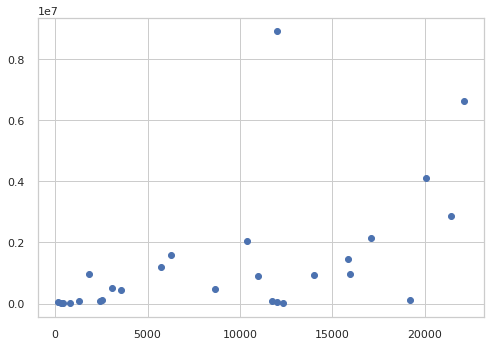

In [79]:
res_plot(newcsv_ipc, "",True)

x and y looks Gaussian (fail to reject H0)
VAZI


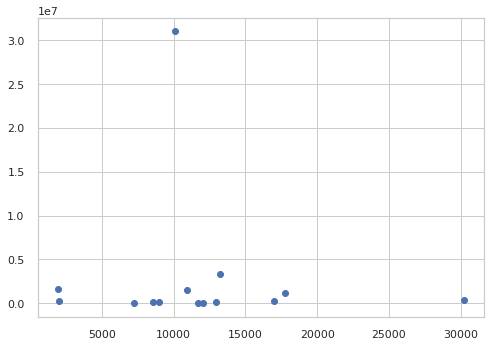

In [88]:
res_plot(newcsv_dms, "",True)

x and y looks Gaussian (fail to reject H0)


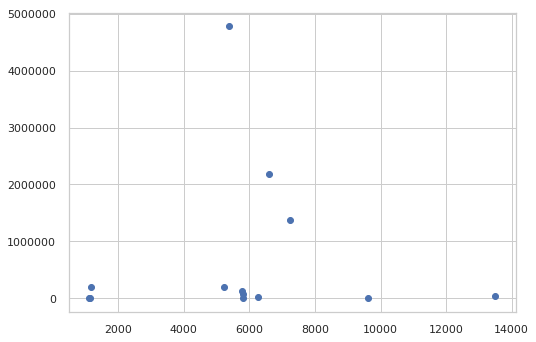

In [89]:
res_plot(newcsv_dh, "",True)

x and y looks Gaussian (fail to reject H0)


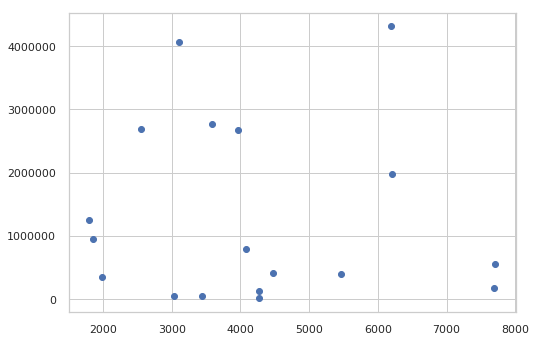

In [90]:
res_plot(newcsv_se0p, "",True)

x and y dont look Gaussian (reject H0)


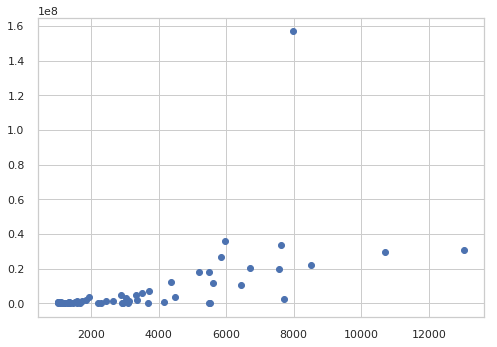

In [91]:
res_plot(newcsv_se0e, "",True)

Original cluster_plot

In [86]:
import statsmodels.api as sm

In [80]:
from numpy.polynomial.polynomial import polyfit
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import bartlett



# from mlxtend.plotting import plot_linear_regression
tp_cols = list(colors.keys()) + list(more_colors.keys())

def cluster_plot(df,tar,tp = False, both = False,inter = False):
    
#     df.reset_index(drop=True)
    dh_df = df.loc[df['target'].str.contains(tar)]
    
    tarname = dh_df.target.values.tolist()[0]
    # Getting the sensory type list
    if 'SE' in tarname:
        tplist = senlist2
    else:
        tplist = senlist1
        
    # Needed to get the range of the plot- such that the axis is always the same across different neurons of the same 
    # target type
    old_vals = [list(n) for n in zip(df['avg_orig_source'].values.tolist(),
                               df['eu_avg_source'].values.tolist())]
    
    s_old_vals = list(set(tuple(i) for i in old_vals))
    
    old_xs = np.array([int(s_old_vals[i][0]) for i in range(0,len(s_old_vals))])
    old_ys = np.array([int(s_old_vals[i][1]) for i in range(0,len(s_old_vals))])

    dh_df.reset_index()
    
#     sens = list(set(dh_df.source.values.tolist()))

    vals = [list(n) for n in zip(dh_df['avg_orig_source'].values.tolist(),
                               dh_df['eu_avg_source'].values.tolist())]
    
   
    if both == True:
        int_vals = [list(n) for n in zip(dh_df['avg_orig_inter'].values.tolist(),
                               dh_df['eu_avg_inter'].values.tolist())]
        int_newvals = list(set(tuple(i) for i in int_vals))

        
    newl = dh_df.source.values.tolist()
    s_newl = list(set([n[0:19] for n in newl]))
    print(s_newl)
    newvals = list(set(tuple(i) for i in vals))
    
    
    xs = np.array([int(newvals[i][0]) for i in range(0,len(newvals))])
    ys = np.array([int(newvals[i][1]) for i in range(0,len(newvals))])
    
    shap1, t1 = shapiro(xs)
    shap2, t2 = shapiro(ys)
    alpha = 0.05
    if t1 > alpha and t2 > alpha:
        lev_, lp = bartlett(xs,ys)
        print('x and y looks Gaussian (fail to reject H0)')
    else:
        lev_, lp = levene(xs,ys)
        print('x and y dont look Gaussian (reject H0)')
    
    if lp > alpha:
        print('VAZI')
    else:
        print('NE VAZI')
    
#      regression part
    slope, intercept, r_value, p_value, std_err = stats.linregress(xs,ys)
    line = slope*xs+intercept
    resline0 = [(ys.tolist()[i] - line.tolist()[i])**2 for i in range(0,len(line.tolist())) ]

    resline = [ys.tolist()[i] - line.tolist()[i] for i in range(0,len(line.tolist())) ]

    resline2 = [line.tolist()[i] - ys.tolist()[i] for i in range(0,len(line.tolist())) ]

    
    plt.plot(xs, line, 'b', label=['y={:.2f}x+{:.2f}'.format(slope,intercept),'r = '+str(round(r_value,5)),
                                   str(p_value<0.05)],linewidth = '0.2')
    plt.figure()
    mod_fit = sm.OLS(xs,ys).fit()
    res = mod_fit.resid
    print(res)
    print(resline2)
    fig = sm.qqplot(res,fit=True,line ='45')
#     plt.savefig('qqplot-all'+tarname+'.png',bbox_inches='tight',dpi=1000)
    plt.figure()
    plt.hist(resline,bins = 10)
    stat, n = shapiro(resline)
    if n > alpha:
        print(n)
        print('The residuals look normal')
    else:
        print('The residuals are NOT normal')
    plt.savefig('hist-resline-'+tarname+'.png',bbox_inches='tight',dpi=1000)
    plt.figure()
#     if 'SE' in tarname:
#         xs = sm.add_constant(xs)
#         wls_model = sm.WLS(ys,xs, weights=list(range(1,8)))
#         results = wls_model.fit()
#         print(results.params)
    if p_value > 0.05:
        print('Not significant')
    else:
        print('Significant')

    count = 0
    for v in newvals:
        ind = df.index[df['avg_orig_source']==v[0]].tolist()[0]
        name = df['source'].iloc[ind]
        nname = name[0:19]
        tp_name = df['type'].iloc[ind]
       
        if both == True:
            plt.scatter(v[0],v[1],color = 'dodgerblue')
        else:
#             plt.scatter(v[0],v[1],color = mycols[count],label = nname)
            if tp == False:
                plt.scatter(v[0],v[1],color = mycols[s_newl.index(nname)],label = nname, s = 18)
            else:
                plt.scatter(v[0],v[1],color = tp_cols[tplist.index(tp_name)],label = tp_name, s = 18)

        count+=1
    
    if both == True:
        name = df['interneuron'].iloc[ind]
        l = name[:-4]
        nname = l[:-1]+l[-1:].replace(' ','')
#         nname = df['target'].iloc[ind]
        if inter == True:
            plt.figure()

        for v in int_newvals:
    #         ind = df.index[df['avg_orig_inter']==v[0]].tolist()[0]
            plt.scatter(v[0],v[1],color = 'orangered')
               
            xs2 = np.array([int(int_newvals[i][0]) for i in range(0,len(int_newvals))])
            ys2 = np.array([int(int_newvals[i][1]) for i in range(0,len(int_newvals))])
        #      regression part
            slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(xs2,ys2)
            line2 = slope2*xs2+intercept2
            plt.plot(xs2, line2, 'r', label=['y={:.2f}x+{:.2f}'.format(slope2,intercept2),'r = '+str(round(r_value2,5)),
                                             str(p_value2<0.05)],linewidth = '0.2')

    
#     left, right = plt.xlim() 
#     bott, top = plt.ylim()
    plt.xlim(-1000, max(old_xs)+2000)
    plt.ylim(-1000, max(old_ys)+2000)
    if 'SE' not in tarname:
        figname = tarname[:3]
        plt.title(tarname[:4]+' '+tar)
    else:
        if '4' in tarname:
            figname = 'SE0ph'
            plt.title('SE0 ph '+tar)
        else:
            figname = 'SE0ens'

            plt.title('SE0 ens '+tar)
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.04,1), loc="upper left")

    plt.xlabel('arbor')
    plt.ylabel('euclidean')
    
    if both == True:
        if inter == False:
            plt.savefig('line-both-disp-cluster'+figname+tar+'.png',bbox_inches='tight',dpi=1000)
        else:
            plt.savefig('inter-disp-cluster'+figname+tar+'.png',bbox_inches='tight',dpi=1000)

    else:
        if tp ==False:
            plt.savefig('line-corr-sens-disp-cluster'+figname+tar+'.png',bbox_inches='tight',dpi=1000)
        else:
            plt.savefig('line-corr-type-sens-disp-cluster'+figname+tar+'.png',bbox_inches='tight',dpi=1000)


    #         if 'right' in nname or 'R' in nname:
#             boja = 'orangered'
#         else:
#             boja = 'mediumblue'
# #         plt.scatter(v[0],v[1],color = mycols[newl.index(nname)])
#         if 'R-Sens-B1-AVa-27' in name:
#             print(ind)
#             plt.scatter(v[0],v[1],color = 'limegreen')
#         else:
#             plt.scatter(v[0],v[1],color = boja)


    return plt

Plotting all targets with the values colored by sensory type

['AN-L-Sens-B1-AVa-19', 'AN-R-Sens-B1-AVa-19', 'AN-L-Sens-B1-ACa-10', 'AN-L-Sens-B1-ACa-01', 'AN-L-Sens-B1-ACa-02', 'AN-R-Sens-B1-ACa-01', 'AN-R-Sens-B1-ACa-02']
x and y dont look Gaussian (reject H0)
NE VAZI
[-1880.08710534   324.76579035 -1352.27188059  -361.96196417
  -450.85783044  1512.71866693 -3342.51552534  4403.0694862
   987.15539261   227.58843461  -839.43877603 -1496.04326596
  -370.75866623  -150.53842679  -310.91652621  2319.88564926
  1567.99513476  1629.56697538   744.41749059  1616.48440515
  -209.15454119 -1695.27763201 -2592.3171969   1066.79960383
  -261.75611196  -162.54991224  2701.08361281]
[-1430.7100477444474, 105.53781309948681, -976.6515586132875, -283.55139005494175, -347.63248841347877, 956.623257612111, -2574.6072829689583, 2985.4119033379193, 657.1284787346717, 147.4365982235488, -680.1341383317267, -1212.2986081445433, -279.32677770425244, -114.23862086741605, -225.952064288325, 1467.395681146234, 966.7420249650513, 1089.3778894781544, 336.1102030614784,

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

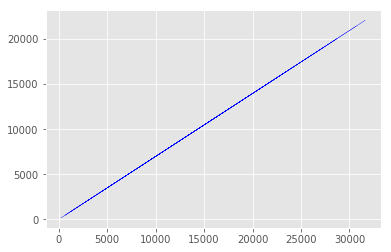

<Figure size 432x288 with 0 Axes>

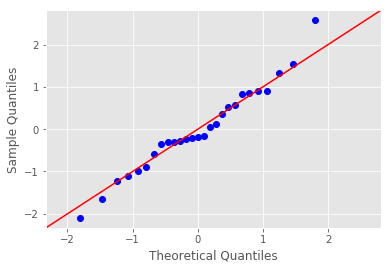

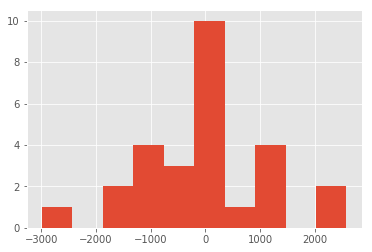

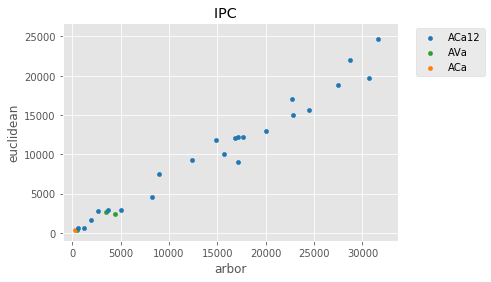

In [97]:
cluster_plot(newcsv_ipc, "",True)

['AN-L-Sens-B1-ACa-01', 'AN-L-Sens-B1-ACa-10', 'AN-R-Sens-B1-ACa-01', 'AN-L-Sens-B1-ACa-02', 'AN-R-Sens-B1-ACa-02', 'AN-R-Sens-B1-ACa-09', 'AN-L-Sens-B1-ACa-11', 'AN-R-Sens-B1-ACa-08']
x and y looks Gaussian (fail to reject H0)
VAZI
[  730.12055496  -393.08263427  8574.91676289 -1483.00417757
  -117.61829639 -2314.25273837  -107.38497692  -550.78947888
   304.81589425  1913.0406463    502.02480214   -86.63998235
 -1470.07824443  -354.51325018]
[56389.04147920345, 256652.91144133516, 31027909.296980847, 1627176.3329171273, 107107.13680230659, 3306896.1749471375, 107509.71016702086, 346192.11158033676, 1772.1587413628129, 1125401.9711470336, 8295.83980507835, 99013.90007245434, 1561331.0265506296, 259209.54406490116]
The residuals are NOT normal
Significant


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

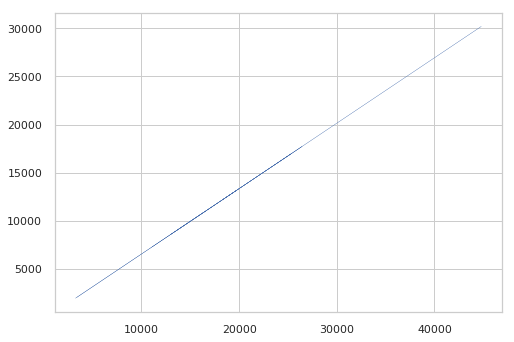

<Figure size 576x396 with 0 Axes>

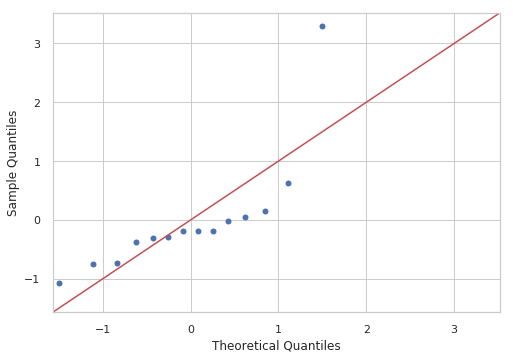

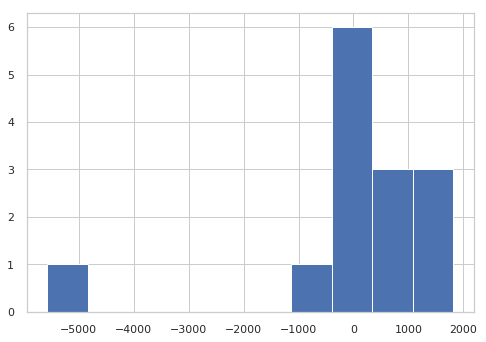

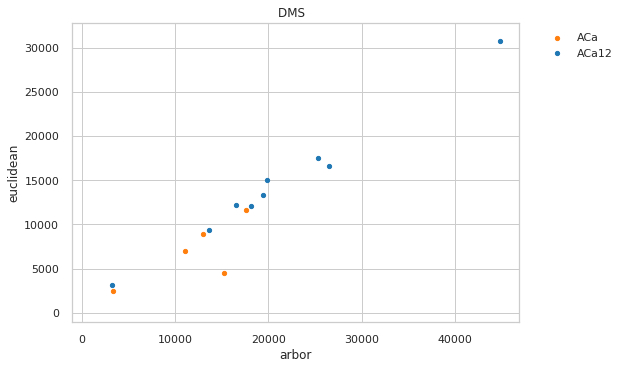

In [119]:
cluster_plot(newcsv_dms, "",True)

['AN-L-Sens-B1-ACa-12', 'AN-L-Sens-B1-ACa-03', 'AN-R-Sens-B1-ACa-13', 'AN-R-Sens-B1-ACa-03', 'AN-R-Sens-B1-ACa-14', 'AN-L-Sens-B1-ACa-04', 'AN-L-Sens-B1-ACa-15']
x and y looks Gaussian (fail to reject H0)
NE VAZI
[  199.88721431   489.01242765 -3957.79069522  2712.80453658
  -650.15510296  -227.79218079   568.61186328   348.7789945
  2249.90464175  -466.87174367  -650.44085297    11.59896439
  -872.80366596]
[191025.75014493443, 78808.89735970194, 4780037.590418981, 2177632.542247819, 1353.2710853903425, 23559.879276700118, 41495.42021470519, 3690.793144805055, 1371328.035647548, 4186.010908663342, 127297.70554078049, 147.22978427462093, 196685.05877299016]
The residuals look normal
Significant


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

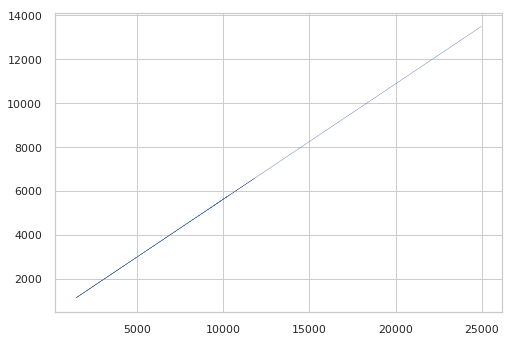

<Figure size 576x396 with 0 Axes>

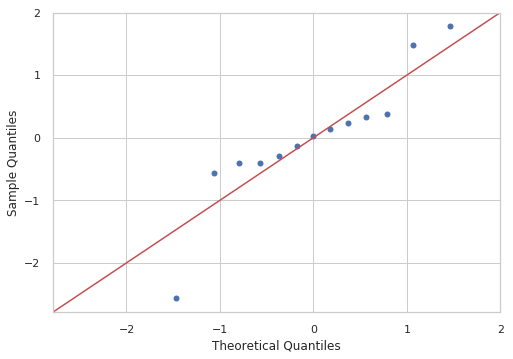

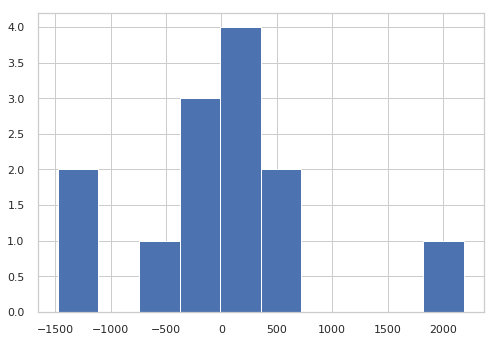

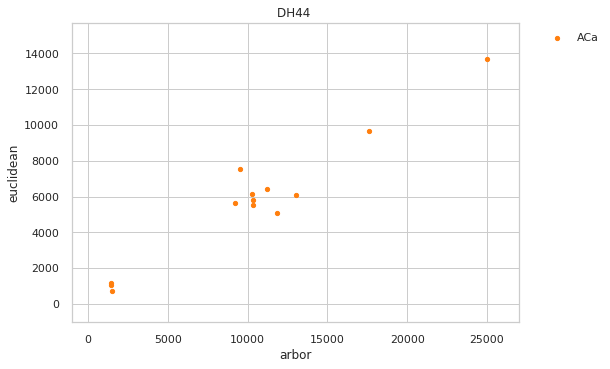

In [120]:
cluster_plot(newcsv_dh, "",True)

['MN-L-Sens-B3-AVp-02', 'AN-R-Sens-B2-AVp-01', 'AN-L-Sens-B1-AVa-34', 'AN-R-Sens-B1-AVa-38', 'AN-R-Sens-B1-AVa-22', 'AN-R-Sens-B1-AVa-29', 'MN-R-Sens-B3-AVp-03', 'AN-R-Sens-B1-AVa-24', 'MN-R-Sens-B3-AVp-01', 'AN-L-Sens-B1-AVa-23', 'MN-L-Sens-B3-AVp-03', 'MN-L-Sens-B3-AVp-01', 'AN-L-Sens-B2-AVp-03', 'AN-R-Sens-B1-AVa-27', 'MN-R-Sens-B3-AVp-02', 'AN-L-Sens-B2-AVp-01', 'AN-R-Sens-B2-AVp-02', 'MN-L-Sens-B2-AVp-01']
x and y looks Gaussian (fail to reject H0)
NE VAZI
[-1837.92336678  -593.67059172 -8391.25185247  -956.35491789
  9568.12614959 -1980.29755465  3816.52827252 -1416.5450224
 -6484.09615087  4554.97114236  3120.49098774 -2821.4607608
 -1280.42982976 -8111.50600655  -789.51893252  6776.77573053
  2394.37926697   325.69159277]
[418785.9874876108, 1251300.064360205, 4061830.176850892, 951276.7474754239, 4312026.890545898, 348240.94562412443, 400772.1920867913, 1977784.6734500877, 2764169.9254359803, 2676502.725688765, 554798.332747661, 46883.037592179884, 134246.08140689225, 2693297.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

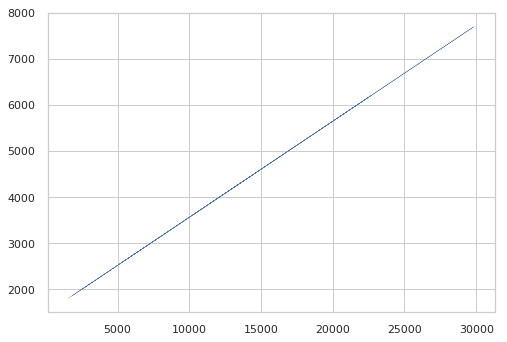

<Figure size 576x396 with 0 Axes>

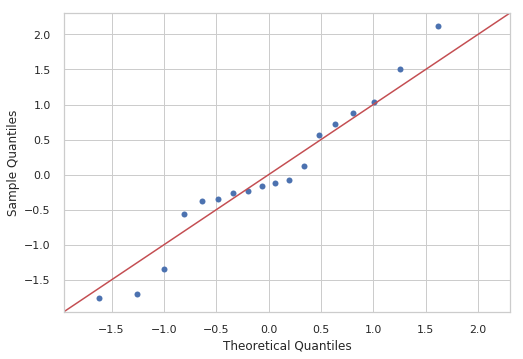

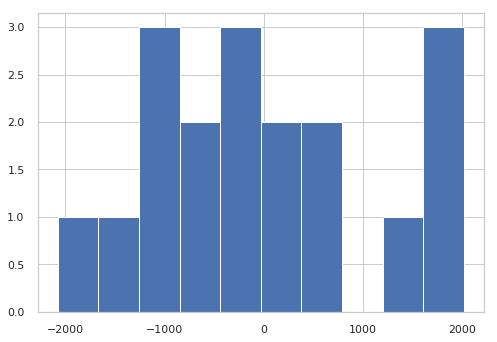

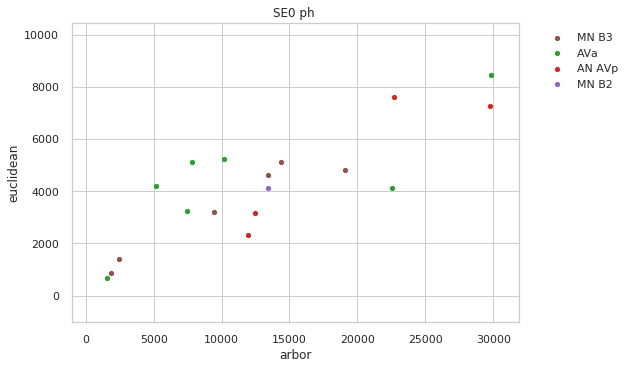

In [121]:
cluster_plot(newcsv_se0p, "",True)

['AN-L-Sens-B1-AVa-34', 'AN-R-Sens-B1-AVa-26', 'AN-L-Sens-B1-ACa-03', 'AN-L-Sens-B1-AVa-36', 'AN-L-Sens-B1-ACa-09', 'AN-L-Sens-B1-AVa-17', 'AN-L-Sens-B1-AVa-20', 'AN-L-Sens-B1-AVa-24', 'AN-L-Sens-B1-AVa-22', 'AN-R-Sens-B1-ACa-08', 'AN-L-Sens-B1-AVa-18', 'AN-L-Sens-B1-ACa-01', 'AN-R-Sens-B1-ACa-17', 'AN-L-Sens-B1-AVa-28', 'AN-L-Sens-B1-AVa-35', 'AN-L-Sens-B1-AVa-25', 'AN-L-Sens-B1-ACa-11', 'MN-R-Sens-B2-AVp-01', 'AN-L-Sens-B1-ACa-04', 'AN-R-Sens-B1-AVa-33', 'AN-R-Sens-B1-AVa-22', 'AN-R-Sens-B1-AVa-15', 'AN-R-Sens-B1-AVa-21', 'AN-R-Sens-B1-AVa-16', 'AN-R-Sens-B1-AVa-25', 'AN-L-Sens-B1-AVa-33', 'AN-L-Sens-B1-ACa-08', 'AN-L-Sens-B1-AVa-19', 'AN-R-Sens-B1-AVa-24', 'AN-L-Sens-B1-AVa-21', 'AN-R-Sens-B1-ACa-05', 'MN-L-Sens-B2-AVp-01', 'AN-R-Sens-B1-AVa-28', 'AN-R-Sens-B1-AVa-23', 'AN-R-Sens-B1-AVa-29', 'AN-L-Sens-B1-AVa-16', 'AN-R-Sens-B1-AVa-18', 'AN-R-Sens-B1-AVa-27', 'AN-R-Sens-B1-ACa-10']
x and y dont look Gaussian (reject H0)
NE VAZI
[  2903.77328371   5000.14575975  -3113.47273892   -963

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

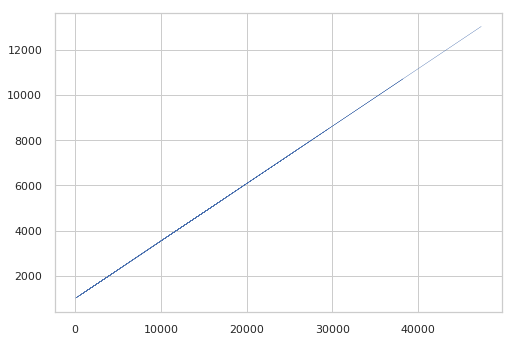

<Figure size 576x396 with 0 Axes>

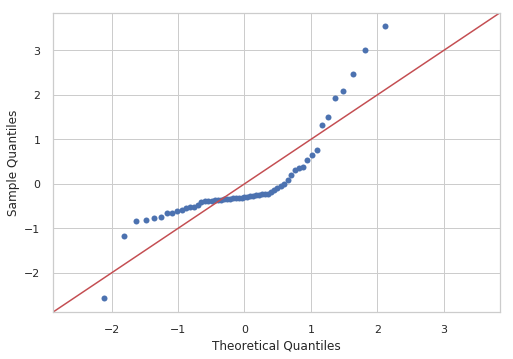

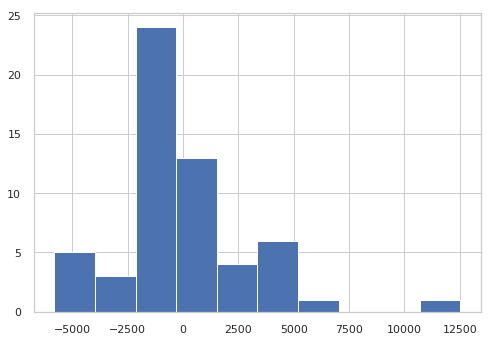

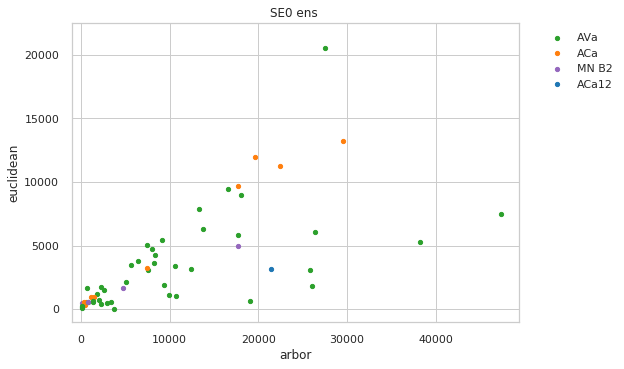

In [122]:
cluster_plot(newcsv_se0e, "",True)

['MN-R-Sens-B3-AVp-02', 'AN-R-Sens-B2-AVp-02', 'MN-R-Sens-B3-AVp-01', 'AN-R-Sens-B1-AVa-22', 'AN-R-Sens-B1-AVa-27', 'AN-R-Sens-B1-AVa-38', 'AN-R-Sens-B2-AVp-01', 'AN-R-Sens-B1-AVa-24', 'MN-R-Sens-B3-AVp-03', 'AN-R-Sens-B1-AVa-29']
x and y looks Gaussian (fail to reject H0)
NE VAZI
[-2163.16648116 -8716.62201494  9307.10584549  3510.02475164
 -6817.91501142  2583.45870475 -8377.79880645  -994.3204561
  6315.27353797  2192.24575331]
[-276.5894886205497, -1169.1350074017728, 1850.7549550387594, 660.5772127947785, -985.4724187775646, -1501.1378458438267, -601.3654513477627, 945.9584167581224, -326.55633140833015, 1402.9659588081468]
0.559705376625061
The residuals look normal
Significant
['AN-L-Sens-B2-AVp-01', 'MN-L-Sens-B3-AVp-03', 'MN-L-Sens-B3-AVp-01', 'MN-L-Sens-B2-AVp-01', 'AN-L-Sens-B2-AVp-03', 'MN-L-Sens-B3-AVp-02', 'AN-L-Sens-B1-AVa-34', 'AN-L-Sens-B1-AVa-23']
x and y looks Gaussian (fail to reject H0)
NE VAZI
[ -487.25859452  -819.07413433 -1764.68140872  -235.46492516
  4915.779

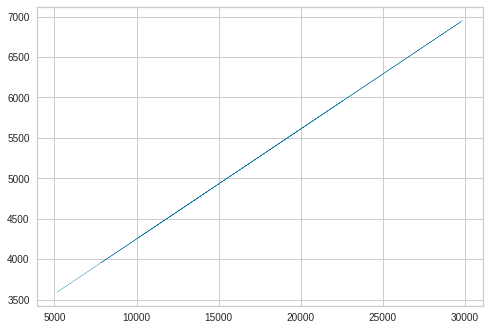

<Figure size 576x396 with 0 Axes>

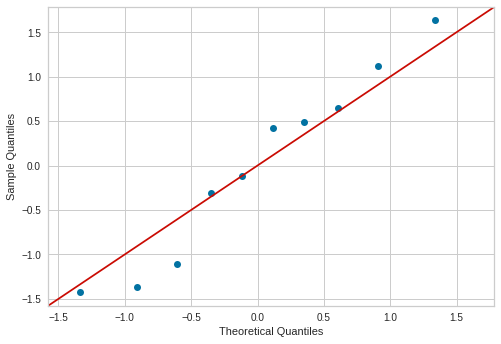

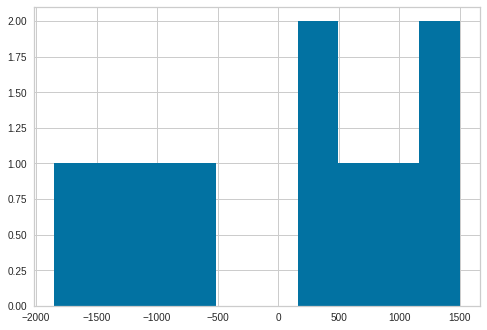

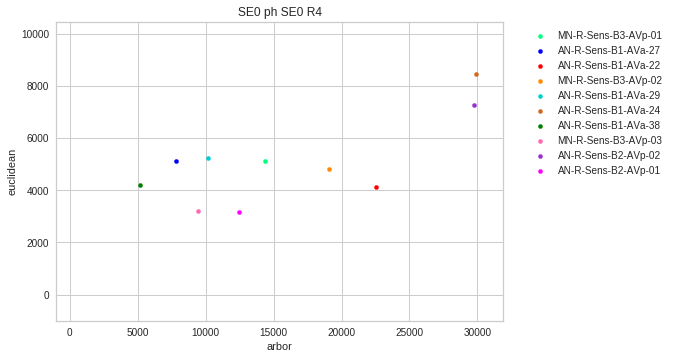

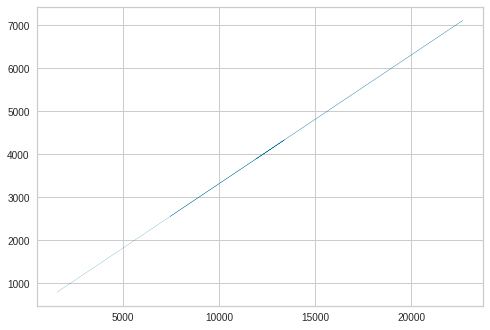

<Figure size 576x396 with 0 Axes>

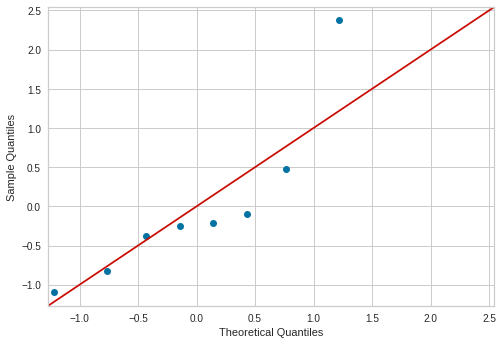

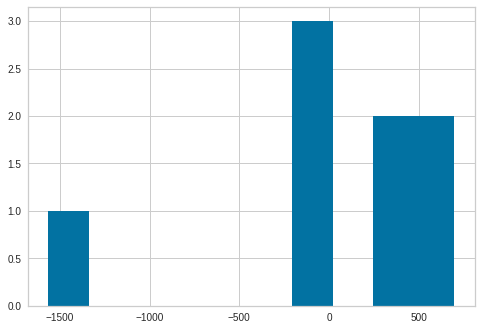

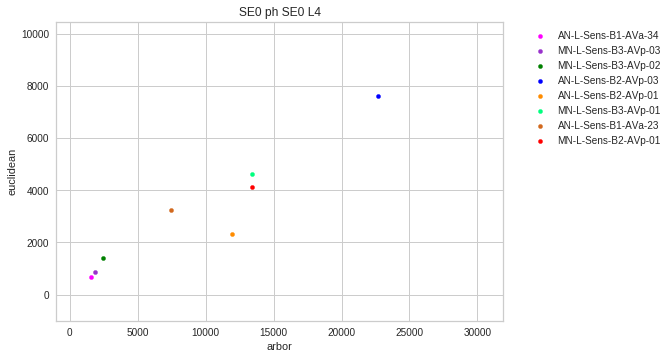

In [90]:
for neur in se0ps[0]:
    plt.figure()
    cluster_plot(newcsv_se0p,neur)

In [ ]:
for neur in se0enss[0]:
    plt.figure()
    cluster_plot(newcsv_se0e,neur)

Plotting interneuron vs. sensory for all targets

['AN-R-Sens-B1-ACa-09', 'AN-L-Sens-B1-ACa-10', 'AN-L-Sens-B1-ACa-01', 'AN-L-Sens-B1-ACa-02', 'AN-R-Sens-B1-ACa-01', 'AN-R-Sens-B1-ACa-02', 'AN-R-Sens-B1-ACa-08', 'AN-L-Sens-B1-ACa-11']
x and y looks Gaussian (fail to reject H0)
VAZI
[  730.12055496  -393.08263427  8574.91676289 -1483.00417757
  -117.61829639 -2314.25273837  -107.38497692  -550.78947888
   304.81589425  1913.0406463    502.02480214   -86.63998235
 -1470.07824443  -354.51325018]
[237.46376877158218, -506.6092295264025, 5570.270127828708, -1275.6082207782792, -327.2722670840085, -1818.4873315333098, -327.88673374661084, -588.3809238752874, -42.09701582491107, 1060.8496458721347, 91.08150089386072, -314.6647423408831, -1249.5323231315906, -509.12625552499367]
The residuals are NOT normal
Significant


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

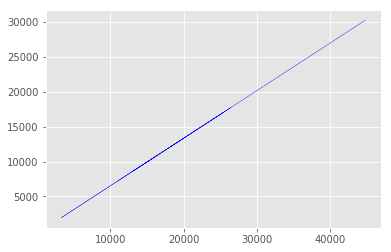

<Figure size 432x288 with 0 Axes>

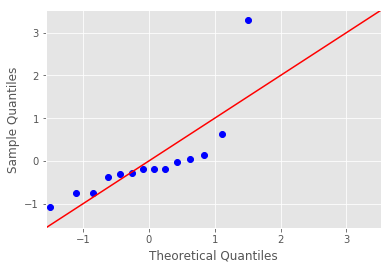

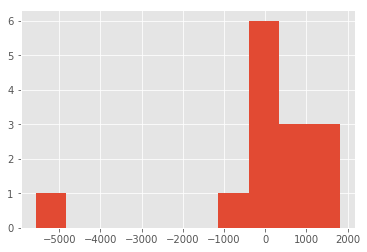

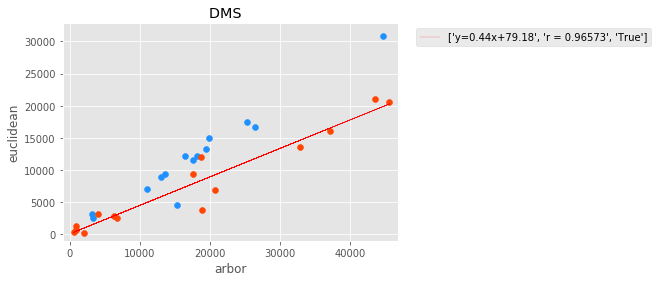

In [114]:
cluster_plot(newcsv_dms,"",False,True)

In [83]:
from numpy.polynomial.polynomial import polyfit
from scipy import stats
tar_colors = list(colors.keys())+list(more_colors.keys())

def cluster_tar_plot(df,tar,inter = False):
#     df.reset_index(drop=True)
    dh_df = df.loc[df['target'].str.contains(tar)]
#     dh_df = df.copy()
    dh_df.reset_index()
    sens = list(set(dh_df.source.values.tolist()))
    tarlist = list(set(dh_df.target.values.tolist()))
    
     # Needed to get the range of the plot- such that the axis is always the same across different neurons of the same 
    # target type
    old_vals = [list(n) for n in zip(df['avg_orig_source'].values.tolist(),
                               df['eu_avg_source'].values.tolist())]
    
    s_old_vals = list(set(tuple(i) for i in old_vals))
    
    old_xs = np.array([int(s_old_vals[i][0]) for i in range(0,len(s_old_vals))])
    old_ys = np.array([int(s_old_vals[i][1]) for i in range(0,len(s_old_vals))])
    
    if inter == True:
        int_vals = [list(n) for n in zip(dh_df['avg_orig_inter'].values.tolist(),
                               dh_df['eu_avg_inter'].values.tolist())]
        int_newvals = list(set(tuple(i) for i in int_vals))

        xs2 = np.array([int(int_newvals[i][0]) for i in range(0,len(int_newvals))])
        ys2 = np.array([int(int_newvals[i][1]) for i in range(0,len(int_newvals))])
    #      regression part
        slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(xs2,ys2)
        line2 = slope2*xs2+intercept2
        plt.plot(xs2, line2, 'r', label=['y={:.2f}x+{:.2f}'.format(slope2,intercept2),'r = '+str(round(r_value2,5)),
                                             str(p_value2<0.05)],linewidth = '0.2')
        for v in int_newvals:
            ind = df.index[df['avg_orig_inter']==v[0]].tolist()[0]
            name = df['target'].iloc[ind]
    #         ind = df.index[df['avg_orig_inter']==v[0]].tolist()[0]
            plt.scatter(v[0],v[1],color = tar_colors[tarlist.index(name)],label = name, s = 20 )


    else:
        vals = [list(n) for n in zip(dh_df['avg_orig_source'].values.tolist(),
                               dh_df['eu_avg_source'].values.tolist())]
    
        newl = dh_df.source.values.tolist()
        s_newl = list(set([n[0:19] for n in newl]))
        print(s_newl)
        newvals = list(set(tuple(i) for i in vals))


        xs = np.array([int(newvals[i][0]) for i in range(0,len(newvals))])
        ys = np.array([int(newvals[i][1]) for i in range(0,len(newvals))])
    #      regression part
        slope, intercept, r_value, p_value, std_err = stats.linregress(xs,ys)
        line = slope*xs+intercept
        plt.plot(xs, line, 'b', label=['y={:.2f}x+{:.2f}'.format(slope,intercept),'r = '+str(round(r_value,5)),
                                       str(p_value < 0.05)],linewidth = '0.2')

        if p_value > 0.05:
            print('Not significant')
        else:
            print('Significant')

        for v in newvals:
            ind = df.index[df['avg_orig_source']==v[0]].tolist()[0]
            name = df['target'].iloc[ind]

            plt.scatter(v[0],v[1],color = tar_colors[tarlist.index(name)],label = name)
    #             plt.scatter(v[0],v[1],color = mycols[count],label = nname)



    
    tarname = dh_df.target.values.tolist()[0]
    plt.xlim(-1000, max(old_xs)+2000)
    plt.ylim(-1000, max(old_ys)+2000)
    if 'SE' not in tarname:
        figname = tarname[:3]
        plt.title(tarname[:4])
    else:
        if '4' in tarname:
            figname = 'SE0ph'
            plt.title('SE0 ph')
        else:

            figname = 'SE0ens'
            plt.title('SE0 ens')
            
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.04,1), loc="upper left")

    plt.xlabel('arbor')
    plt.ylabel('euclidean')
    
    if inter == False:
        plt.savefig('tar-sen-line-disp-cluster'+figname+tar+'.png',bbox_inches='tight',dpi=1000)
    else:
        plt.savefig('tar-inter-disp-cluster'+figname+tar+'.png',bbox_inches='tight',dpi=1000)
 
    return plt

In [84]:
from matplotlib import colors as mcolors

colors = dict(mcolors.TABLEAU_COLORS)
more_colors = dict(mcolors.BASE_COLORS)

['AN-L-Sens-B1-AVa-35', 'AN-L-Sens-B1-ACa-08', 'AN-L-Sens-B1-AVa-18', 'AN-L-Sens-B1-AVa-34', 'AN-R-Sens-B1-AVa-27', 'AN-L-Sens-B1-AVa-22', 'AN-L-Sens-B1-ACa-04', 'AN-L-Sens-B1-AVa-24', 'AN-L-Sens-B1-AVa-21', 'AN-L-Sens-B1-AVa-17', 'AN-L-Sens-B1-ACa-11', 'AN-L-Sens-B1-AVa-36', 'AN-L-Sens-B1-AVa-16', 'AN-L-Sens-B1-AVa-28', 'AN-L-Sens-B1-AVa-19', 'MN-L-Sens-B2-AVp-01', 'AN-L-Sens-B1-ACa-03', 'AN-L-Sens-B1-ACa-09', 'AN-L-Sens-B1-AVa-20', 'AN-L-Sens-B1-AVa-25', 'AN-L-Sens-B1-AVa-33']
Significant


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

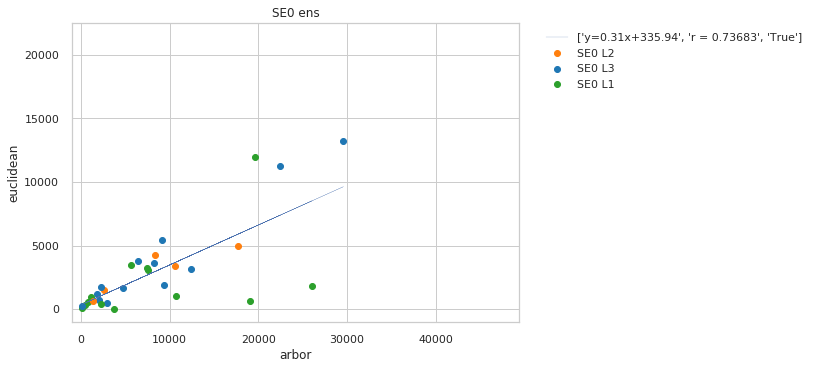

In [85]:
cluster_tar_plot(newcsv_se0e,"L")

In [ ]:
cluster_tar_plot(newcsv_se0e,"L",True)

In [ ]:
cluster_tar_plot(newcsv_se0e,"R",True)

In [ ]:
cluster_tar_plot(newcsv_se0p,"")